# Exercise 1

In [4]:
#preloading all libraries 

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
from seaborn import pairplot

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.compose import make_column_transformer
from sklearn.model_selection import train_test_split, cross_val_score

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

from sklearn import metrics
import time

In [5]:
#define helper functions
def split_data(X,y):
    X_train, X_remaining, y_train, y_remaining = train_test_split(X, y,
                                                        stratify=y, 
                                                        test_size=0.25,
                                                        random_state= 0)

    X_test, X_holdout, y_test, y_holdout = train_test_split(X_remaining, y_remaining,
                                                        stratify=y_remaining, 
                                                        test_size=0.3,
                                                        random_state= 0)

    return X_train,y_train,X_test,y_test,X_holdout,y_holdout

def eval_metrics(test,pred,type="binary"):
    print("confusion matrix:",metrics.confusion_matrix(test,pred))
    print("accuracy:",metrics.accuracy_score(test,pred))

    if type == "binary":
        print("precision:",metrics.precision_score(test,pred))
        print("recall:",metrics.recall_score(test,pred))
        print("F1:",metrics.f1_score(test,pred))

    elif type == "multi":
        print("precision:",metrics.precision_score(test,pred,average="macro"))
        print("recall:",metrics.recall_score(test,pred,average="macro"))
        print("F1:",metrics.f1_score(test,pred,average="macro"))



def cv_holdout(mod,holdout_X, holdout_y,k=5):
    cv_scores = cross_val_score(mod,holdout_X,holdout_y,cv=k)
    print("Cross validated scores:",cv_scores)

## Voting data

(kaggle data small)

In [ ]:
voting_train = pd.read_csv("CongressionalVotingID.shuf.lrn.csv")
voting_train.head()

ID       class handicapped-infants water-project-cost-sharing  \
0   15  republican                   n                          y   
1  326    democrat                   n                          y   
2   93    democrat                   y                          y   
3  350  republican                   n                          y   
4  283  republican                   y                          n   

  adoption-of-the-budget-resolution physician-fee-freeze el-salvador-aid  \
0                                 n                    y               y   
1                                 n                    n               y   
2                                 y                    n               n   
3                                 y                    y               y   
4                                 n                    y               y   

  religious-groups-in-schools anti-satellite-test-ban  \
0                           y                       n   
1                           y                       n   
2                           n                       y   
3                           y                       y   
4                           y                       n   

  aid-to-nicaraguan-contras mx-missile immigration  \
0                         n          n           n   
1                         n    unknown           n   
2                         y          n           y   
3                         y          y           n   
4                         n          n           y   

  synfuels-crporation-cutback education-spending superfund-right-to-sue  \
0                           n                  y                unknown   
1                           n                  y                      y   
2                           y                  n                      n   
3                           n                  y                      y   
4                           n            unknown                      y   

     crime duty-free-exports export-administration-act-south-africa  
0  unknown                 n                                unknown  
1        y                 n                                      y  
2  unknown                 y                                      y  
3        y                 n                                      y  
4        y                 n                                      n

In [ ]:
voting_test = pd.read_csv("CongressionalVotingID.shuf.tes.csv")
voting_test.head()

ID handicapped-infants water-project-cost-sharing  \
0  275                   y                          n   
1  266                   y                          n   
2  247                   n                          n   
3  328                   n                          y   
4  232                   n                          y   

  adoption-of-the-budget-resolution physician-fee-freeze el-salvador-aid  \
0                                 n                    y               y   
1                                 y                    n               n   
2                                 y                    n               y   
3                                 n                    y               y   
4                                 n                    y               y   

  religious-groups-in-schools anti-satellite-test-ban  \
0                           n                       y   
1                           n                       y   
2                           n                       y   
3                           y                       n   
4                           y                       n   

  aid-to-nicaraguan-contras mx-missile immigration  \
0                         n          n           y   
1                         y          y           y   
2                         y          y           n   
3                         n          n           n   
4                         n          y           y   

  synfuels-crporation-cutback education-spending superfund-right-to-sue crime  \
0                           n                  n                      n     y   
1                           n                  n                      n     n   
2                           n                  n                      n     y   
3                           n                  y                      y     y   
4                           n                  y                      y     y   

  duty-free-exports export-administration-act-south-africa  
0                 y                                      y  
1                 n                                      y  
2           unknown                                      y  
3                 n                                      y  
4                 n                                      y

In [ ]:
voting_train.shape

(218, 18)

In [ ]:
voting_train.columns

Index(['ID', 'class', 'handicapped-infants', 'water-project-cost-sharing',
       'adoption-of-the-budget-resolution', 'physician-fee-freeze',
       'el-salvador-aid', 'religious-groups-in-schools',
       'anti-satellite-test-ban', 'aid-to-nicaraguan-contras', 'mx-missile',
       'immigration', 'synfuels-crporation-cutback', 'education-spending',
       'superfund-right-to-sue', 'crime', 'duty-free-exports',
       'export-administration-act-south-africa'],
      dtype='object')

In [ ]:
voting_train.groupby("class").size()

class
0    146
1     71
dtype: int64

In [ ]:
voting_train = voting_train.set_index("ID")

In [ ]:
voting_train.columns

Index(['class', 'handicapped-infants', 'water-project-cost-sharing',
       'adoption-of-the-budget-resolution', 'physician-fee-freeze',
       'el-salvador-aid', 'religious-groups-in-schools',
       'anti-satellite-test-ban', 'aid-to-nicaraguan-contras', 'mx-missile',
       'immigration', 'synfuels-crporation-cutback', 'education-spending',
       'superfund-right-to-sue', 'crime', 'duty-free-exports',
       'export-administration-act-south-africa'],
      dtype='object')

<AxesSubplot:>

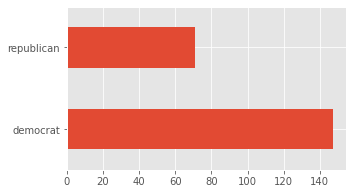

In [ ]:
plt.figure(figsize=(5,3))
voting_train["class"].value_counts().plot(kind="barh")

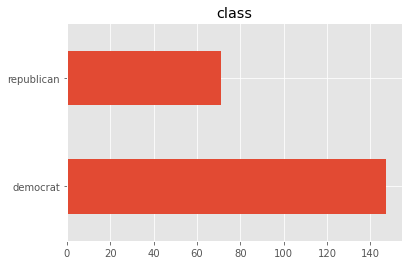

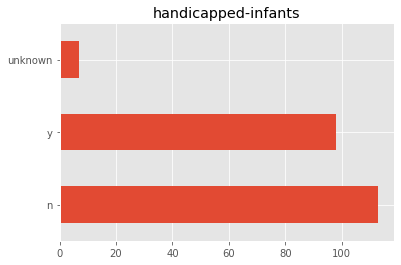

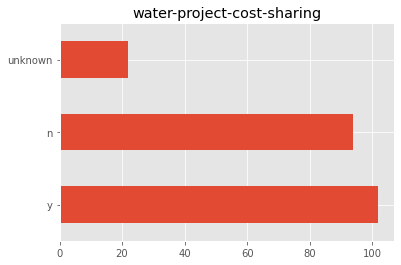

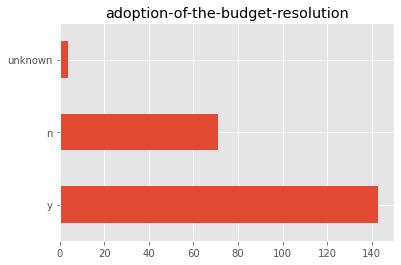

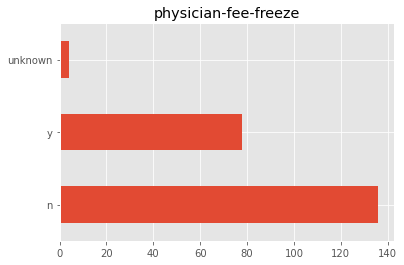

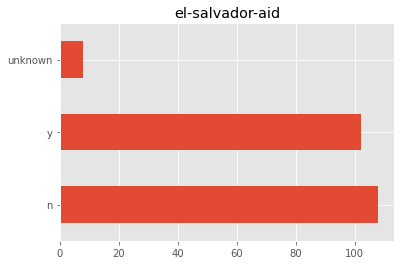

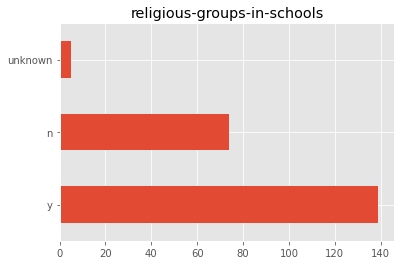

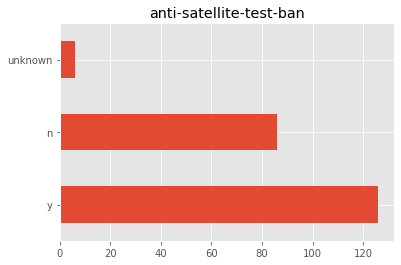

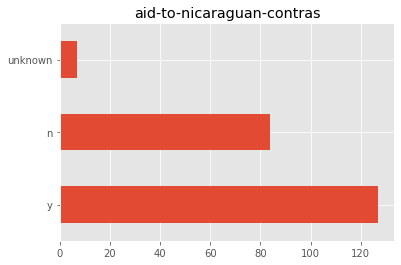

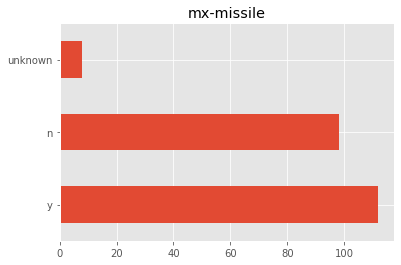

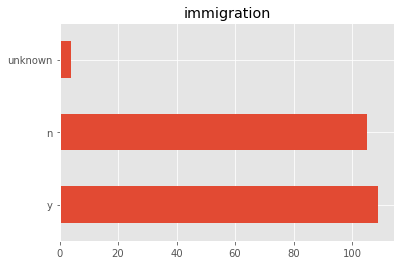

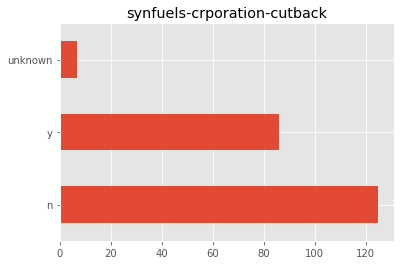

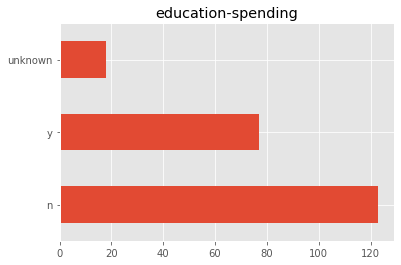

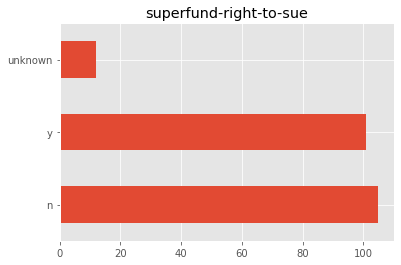

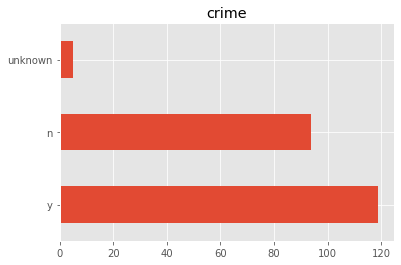

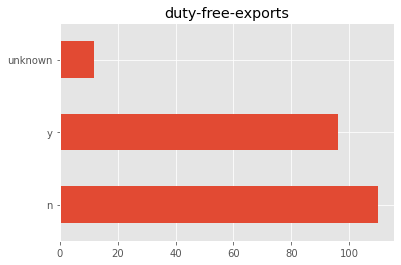

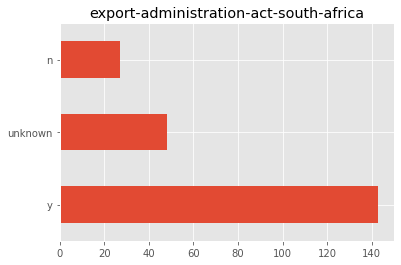

In [ ]:
for col in voting_train.columns:
    voting_train[col].value_counts().plot(kind="barh",title=col)
    plt.show()

In [ ]:
# overall sum of missing values
(voting_train == "unknown").sum(axis=1).sum()

177

What if we would remove every row where there is any known:

In [ ]:
missing_by_id = (voting_train == "unknown").sum(axis=1)
(missing_by_id > 0).sum()/len(voting_train)

0.44495412844036697

Then almost half would be removed.

There fore let's just remove rows where more than half of values are missing for a person.

In [ ]:
# check if there is a ID where more than 50% is missing
missing_by_id[missing_by_id > 7]

ID
184    15
dtype: int64

In [ ]:
index_to_drop = missing_by_id[missing_by_id > 7].index

In [ ]:
# remove the one that has only missing infortmation
voting_train = voting_train.drop(index=index_to_drop)

<AxesSubplot:>

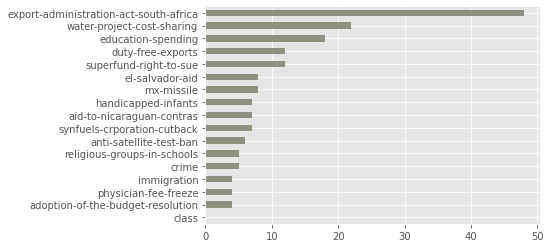

In [ ]:
# missings by  column
(voting_train == "unknown").sum().sort_values().plot(kind="barh",color="#909080")

In [ ]:
#voting_train = voting_train.set_index("ID")
le = LabelEncoder()
le.fit(voting_train["handicapped-infants"])
list(le.classes_)

for col in voting_train.columns[1:]:
    voting_train[col] = le.transform(voting_train[col])


feature encoding: 
"n" = 0, "unknown" = 1, "yes" = 2

In [ ]:
le_class = LabelEncoder()
le_class.fit(voting_train["class"])
list(le_class.classes_)

voting_train["class"] = le_class.transform(voting_train["class"])


class encding: 1 = "republican, and 0 = "democrat"

In [ ]:
voting_train.head()

class  handicapped-infants  water-project-cost-sharing  \
ID                                                            
15       1                    0                           2   
326      0                    0                           2   
93       0                    2                           2   
350      1                    0                           2   
283      1                    2                           0   

     adoption-of-the-budget-resolution  physician-fee-freeze  el-salvador-aid  \
ID                                                                              
15                                   0                     2                2   
326                                  0                     0                2   
93                                   2                     0                0   
350                                  2                     2                2   
283                                  0                     2                2   

     religious-groups-in-schools  anti-satellite-test-ban  \
ID                                                          
15                             2                        0   
326                            2                        0   
93                             0                        2   
350                            2                        2   
283                            2                        0   

     aid-to-nicaraguan-contras  mx-missile  immigration  \
ID                                                        
15                           0           0            0   
326                          0           1            0   
93                           2           0            2   
350                          2           2            0   
283                          0           0            2   

     synfuels-crporation-cutback  education-spending  superfund-right-to-sue  \
ID                                                                             
15                             0                   2                       1   
326                            0                   2                       2   
93                             2                   0                       0   
350                            0                   2                       2   
283                            0                   1                       2   

     crime  duty-free-exports  export-administration-act-south-africa  
ID                                                                     
15       1                  0                                       1  
326      2                  0                                       2  
93       1                  2                                       2  
350      2                  0                                       2  
283      2                  0                                       0

In [ ]:

X= voting_train.iloc[:,1:]
y=voting_train["class"]

X_train,y_train,X_test,y_test,X_holdout,y_holdout = split_data(X,y)

In [ ]:
y_train.value_counts()

0    109
1     53
Name: class, dtype: int64

In [ ]:
y_test.value_counts()

0    26
1    12
Name: class, dtype: int64

In [ ]:
y_holdout.value_counts()

0    11
1     6
Name: class, dtype: int64

### Decision Tree

In [ ]:
start_time = time.time()
clf = DecisionTreeClassifier(random_state=0,criterion="gini") 
clf=clf.fit(X_train,y_train) 
prediction = clf.predict(X_test) 
print("--- runtime ---" , (time.time() - start_time))


--- runtime --- 0.014998197555541992


In [ ]:
cv_holdout(clf,X_holdout,y_holdout)

eval_metrics(y_test,prediction)

Cross validated scores: [1.   0.75 1.   1.   1.  ]
confusion matrix: [[26  0]
 [ 1 11]]
accuracy: 0.9736842105263158
precision: 1.0
recall: 0.9166666666666666
F1: 0.9565217391304348


[Text(662.625, 504.7714285714286, 'X[3] <= 1.5\ngini = 0.44\nsamples = 162\nvalue = [109, 53]'),
 Text(348.75, 427.11428571428576, 'X[2] <= 1.5\ngini = 0.038\nsamples = 103\nvalue = [101, 2]'),
 Text(279.0, 349.4571428571429, 'X[3] <= 0.5\ngini = 0.32\nsamples = 10\nvalue = [8, 2]'),
 Text(209.25, 271.8, 'X[5] <= 1.0\ngini = 0.198\nsamples = 9\nvalue = [8, 1]'),
 Text(139.5, 194.14285714285717, 'X[14] <= 1.0\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(69.75, 116.48571428571432, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(209.25, 116.48571428571432, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(279.0, 194.14285714285717, 'gini = 0.0\nsamples = 7\nvalue = [7, 0]'),
 Text(348.75, 271.8, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(418.5, 349.4571428571429, 'gini = 0.0\nsamples = 93\nvalue = [93, 0]'),
 Text(976.5, 427.11428571428576, 'X[10] <= 1.5\ngini = 0.234\nsamples = 59\nvalue = [8, 51]'),
 Text(627.75, 349.4571428571429, 'X[11] <= 0.5\ngini = 0.085\nsamples = 45

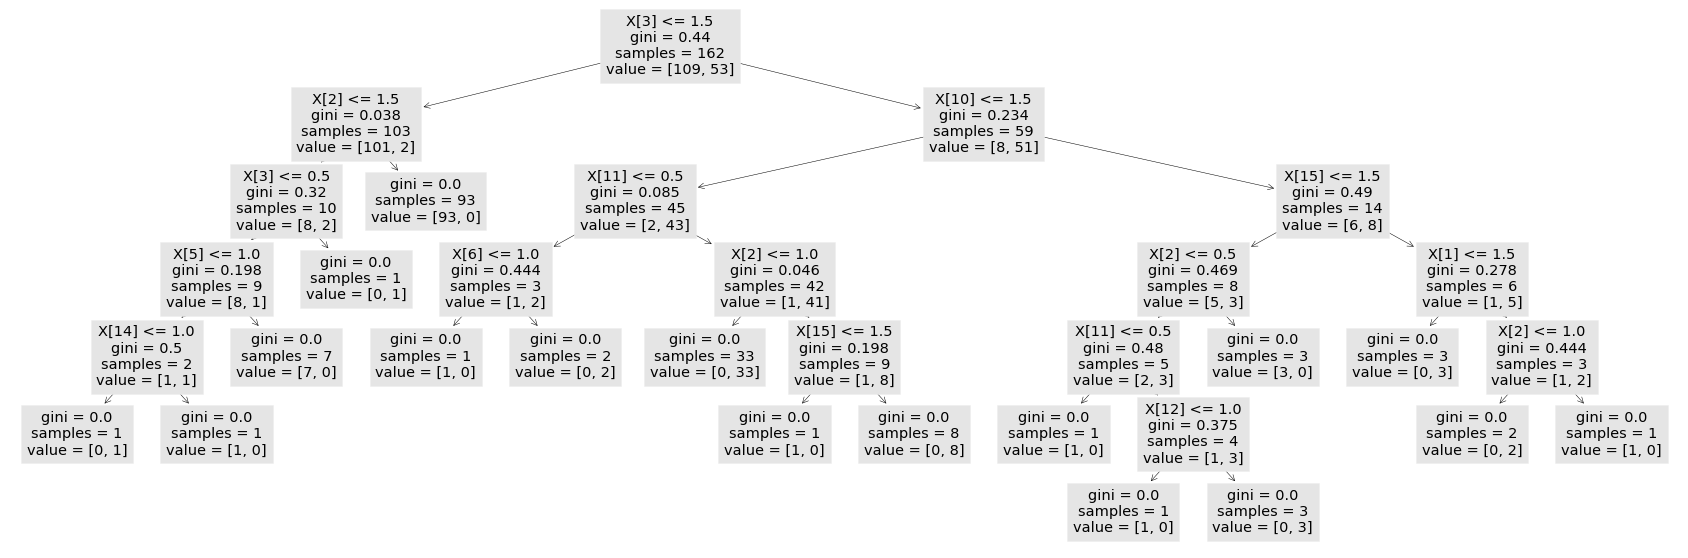

In [ ]:
plt.figure(figsize=(30,10))
plot_tree(clf)

In [ ]:
# FOR kaggle submission

voting_test = voting_test.set_index("ID")

le = LabelEncoder()
le.fit(voting_test["handicapped-infants"])
list(le.classes_)

for col in voting_test.columns:
    voting_test[col] = le.transform(voting_test[col])

# model on all data
clf = DecisionTreeClassifier(random_state=0,criterion="entropy",min_samples_split=5) 
clf=clf.fit(X,y) # train 
prediction = clf.predict(voting_test) 


# predict
prediction = le_class.inverse_transform(prediction)

result = pd.DataFrame(prediction,index= voting_test.index)

result.columns = ["class"]

result.to_csv("voting_test_result_DT.csv")

In [ ]:
# different settings
start_time = time.time()
clf = DecisionTreeClassifier(random_state=0,criterion="entropy",max_features=5) # defining decision tree classifier
clf=clf.fit(X_train,y_train) 
prediction = clf.predict(X_test) 
print("--- runtime ---" , (time.time() - start_time))

cv_holdout(clf,X_holdout,y_holdout)
eval_metrics(y_test,prediction)

--- runtime --- 0.006011247634887695
Cross validated scores: [1.   0.75 1.   1.   1.  ]
confusion matrix: [[25  1]
 [ 0 12]]
accuracy: 0.9736842105263158
precision: 0.9230769230769231
recall: 1.0
F1: 0.9600000000000001


In [ ]:
# different settings
clf = DecisionTreeClassifier(random_state=0,criterion="entropy",min_samples_split=5) 
clf=clf.fit(X_train,y_train) # train 
prediction = clf.predict(X_test) 

cv_holdout(clf,X_holdout,y_holdout)
eval_metrics(y_test,prediction)

Cross validated scores: [1.   0.75 1.   1.   1.  ]
confusion matrix: [[26  0]
 [ 0 12]]
accuracy: 1.0
precision: 1.0
recall: 1.0
F1: 1.0


### Random forest

In [ ]:
start_time = time.time()
clf = RandomForestClassifier(n_estimators=100,random_state=0)
clf.fit(X_train,y_train)
rf_prediction = clf.predict(X_test)
print("--- runtime ---" , (time.time() - start_time))

cv_holdout(clf,X_holdout,y_holdout)
eval_metrics(y_test,rf_prediction)


--- runtime --- 0.302992582321167
Cross validated scores: [1.         0.75       0.66666667 1.         1.        ]
confusion matrix: [[25  1]
 [ 0 12]]
accuracy: 0.9736842105263158
precision: 0.9230769230769231
recall: 1.0
F1: 0.9600000000000001


In [ ]:
start_time = time.time()
clf = RandomForestClassifier(n_estimators=100,random_state=0,criterion="entropy")
clf.fit(X_train,y_train)
rf_prediction = clf.predict(X_test)
print("--- runtime ---" , (time.time() - start_time))

cv_holdout(clf,X_holdout,y_holdout)
eval_metrics(y_test,rf_prediction)

--- runtime --- 0.35199642181396484
Cross validated scores: [1.         0.75       0.66666667 1.         1.        ]
confusion matrix: [[25  1]
 [ 0 12]]
accuracy: 0.9736842105263158
precision: 0.9230769230769231
recall: 1.0
F1: 0.9600000000000001


In [ ]:
start_time = time.time()
clf = RandomForestClassifier(n_estimators=50,random_state=1,criterion="gini",min_samples_split=5)
clf.fit(X_train,y_train)
rf_prediction = clf.predict(X_test)
print("--- runtime ---" , (time.time() - start_time))

cv_holdout(clf,X_holdout,y_holdout)
eval_metrics(y_test,rf_prediction)

--- runtime --- 0.17300105094909668
Cross validated scores: [1.         0.75       0.66666667 1.         1.        ]
confusion matrix: [[26  0]
 [ 0 12]]
accuracy: 1.0
precision: 1.0
recall: 1.0
F1: 1.0


### KNN

In [ ]:
start_time = time.time()
knn = KNeighborsClassifier(n_neighbors=5,metric="hamming")
knn.fit(X_train,y_train)
knn_prediction2= knn.predict(X_test) 
print("--- runtime ---" , (time.time() - start_time))

cv_holdout(knn,X_holdout,y_holdout)
eval_metrics(y_test,knn_prediction2)

--- runtime --- 0.008960247039794922
Cross validated scores: [1.         0.75       0.66666667 1.         1.        ]
confusion matrix: [[25  1]
 [ 0 12]]
accuracy: 0.9736842105263158
precision: 0.9230769230769231
recall: 1.0
F1: 0.9600000000000001


In [ ]:
start_time = time.time()

knn = KNeighborsClassifier(n_neighbors=8,metric="hamming")
knn.fit(X_train,y_train)
knn_prediction3= knn.predict(X_test) 
print("--- runtime ---" , (time.time() - start_time))

cv_holdout(knn,X_holdout,y_holdout)
eval_metrics(y_test,knn_prediction3)

--- runtime --- 0.008998394012451172
Cross validated scores: [0.5        0.75       0.66666667 1.         1.        ]
confusion matrix: [[25  1]
 [ 0 12]]
accuracy: 0.9736842105263158
precision: 0.9230769230769231
recall: 1.0
F1: 0.9600000000000001


In [ ]:
# FOR kaggle submission

# model on all data
clf = RandomForestClassifier(n_estimators=100,random_state=0,criterion="gini",min_samples_split=5)
clf.fit(X,y)
rf_prediction = clf.predict(voting_test)

# predict
prediction = le_class.inverse_transform(rf_prediction)
result = pd.DataFrame(prediction,index= voting_test.index)

result.columns = ["class"]
print(result)
result.to_csv("voting_test_result_RF.csv")

In [ ]:
# FOR kaggle submission

# model on all data
knn = KNeighborsClassifier(n_neighbors=5,metric="hamming")
knn.fit(X,y)
knn_prediction2= knn.predict(voting_test) 

# predict
prediction = le_class.inverse_transform(knn_prediction2)
result = pd.DataFrame(prediction,index= voting_test.index)

result.columns = ["class"]
print(result)
result.to_csv("voting_test_result_KNN.csv")

          class
ID             
275  republican
266    democrat
247    democrat
328  republican
232  republican
..          ...
291    democrat
76   republican
123  republican
416    democrat
309  republican

[217 rows x 1 columns]


## Location data

(kaggle data large)

In [ ]:
locationTrain = pd.read_csv("Location446-30cls-5k.lrn.csv")
locationTrain.head()

ID  class  1  2  3  4  5  6  7  8  ...  437  438  439  440  441  442  443  \
0   0     11  0  0  0  1  1  0  0  0  ...    0    0    0    0    1    0    0   
1   1      3  0  0  0  0  0  0  0  0  ...    0    0    0    0    0    0    0   
2   2      9  0  0  0  0  0  0  0  0  ...    0    0    0    0    0    0    0   
3   3      8  0  0  0  1  0  0  0  0  ...    0    0    0    0    1    0    0   
4   4      3  0  1  0  0  0  0  0  0  ...    0    0    0    0    0    0    1   

   444  445  446  
0    0    0    0  
1    0    0    0  
2    0    0    0  
3    0    0    0  
4    0    0    0  

[5 rows x 448 columns]

In [ ]:
locationTrain.shape

(4000, 448)

In [ ]:
locationTest = pd.read_csv("Location446-30cls-5k.tes.csv")
locationTest.head()

ID  1  2  3  4  5  6  7  8  9  ...  437  438  439  440  441  442  443  \
0  4000  0  0  0  0  0  0  0  0  0  ...    0    0    0    1    0    0    0   
1  4001  0  0  0  0  0  0  0  0  1  ...    0    0    0    0    0    0    1   
2  4002  0  0  0  1  0  0  0  0  0  ...    0    0    0    0    0    0    0   
3  4003  0  0  0  1  0  0  0  0  0  ...    0    0    1    0    0    0    0   
4  4004  0  0  0  0  0  0  0  0  0  ...    0    0    0    0    0    1    0   

   444  445  446  
0    0    1    0  
1    0    0    0  
2    0    0    0  
3    0    0    0  
4    0    0    0  

[5 rows x 447 columns]

In [ ]:
len(locationTrain["class"].unique())

30

In [ ]:
locationTrain = locationTrain.set_index("ID")
locationTest = locationTest.set_index("ID")

In [ ]:
#loc_train = loc_train.set_index("ID")

for c in locationTrain.columns:
    print( "---- %s ---" % c)
    print( locationTrain[c].value_counts(), "\n\n")

---- class ---
8     250
20    211
21    181
10    173
15    171
6     150
11    149
19    146
17    144
12    142
2     141
4     135
30    135
24    133
1     132
23    128
28    127
27    126
3     124
26    119
9     114
29    113
18    103
13    103
25    100
14     99
22     98
7      90
16     83
5      80
Name: class, dtype: int64 


---- 1 ---
0    3775
1     225
Name: 1, dtype: int64 


---- 2 ---
0    3283
1     717
Name: 2, dtype: int64 


---- 3 ---
0    3808
1     192
Name: 3, dtype: int64 


---- 4 ---
1    2124
0    1876
Name: 4, dtype: int64 


---- 5 ---
0    3616
1     384
Name: 5, dtype: int64 


---- 6 ---
0    3572
1     428
Name: 6, dtype: int64 


---- 7 ---
0    3880
1     120
Name: 7, dtype: int64 


---- 8 ---
0    3773
1     227
Name: 8, dtype: int64 


---- 9 ---
0    3349
1     651
Name: 9, dtype: int64 


---- 10 ---
0    3746
1     254
Name: 10, dtype: int64 


---- 11 ---
0    3509
1     491
Name: 11, dtype: int64 


---- 12 ---
0    3474
1     526
Name

In [ ]:
#check for missing data
locationTrain.isna().sum().sum()

0

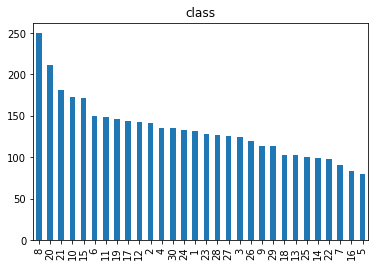

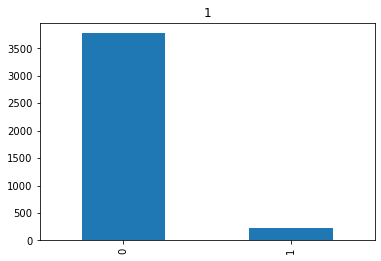

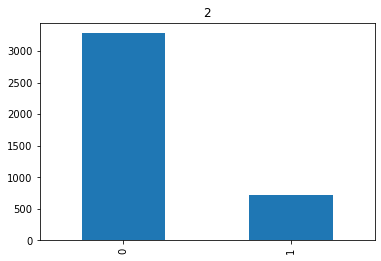

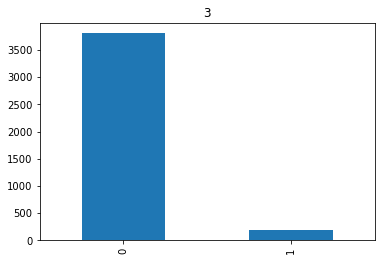

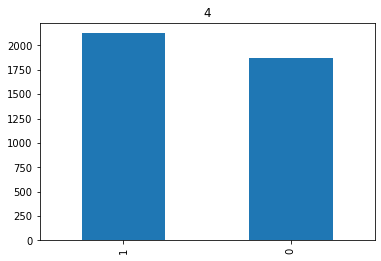

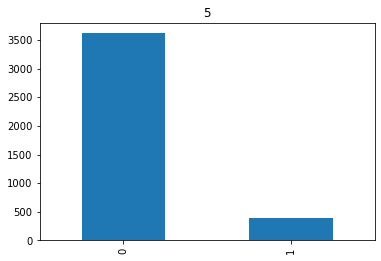

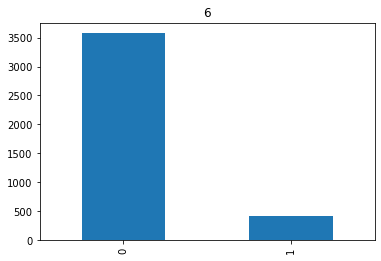

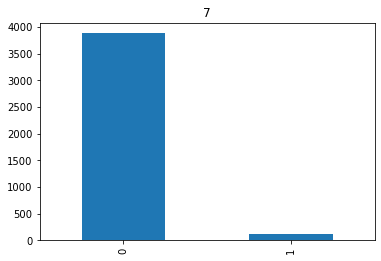

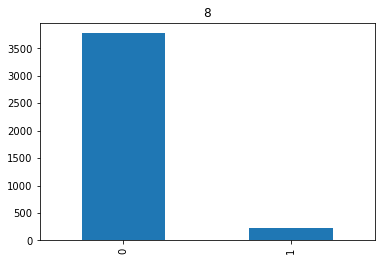

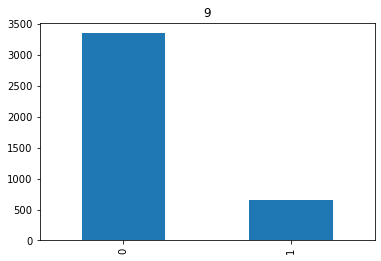

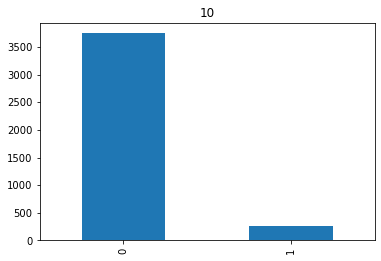

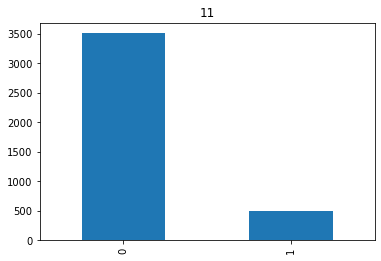

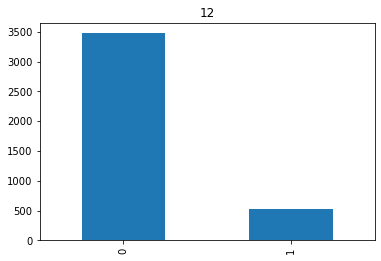

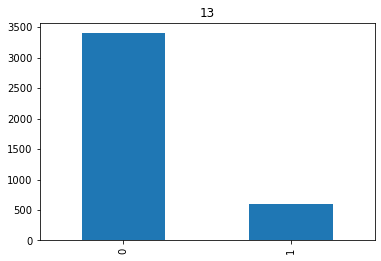

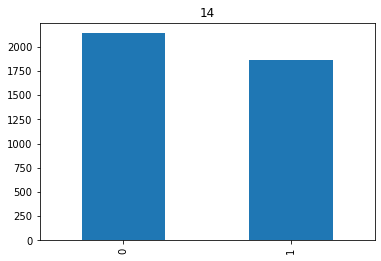

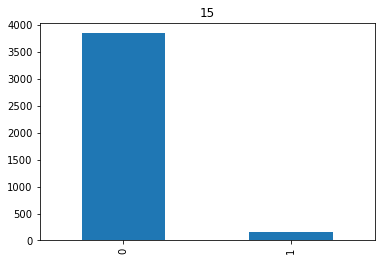

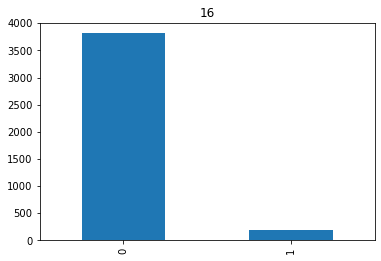

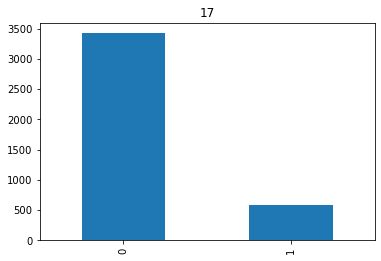

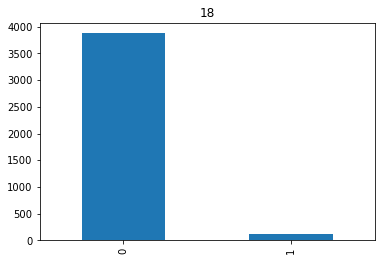

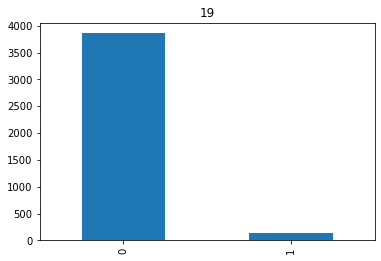

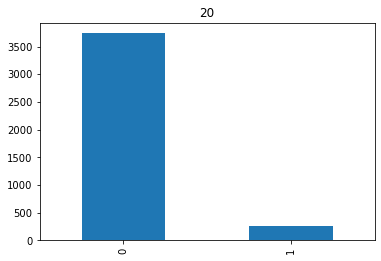

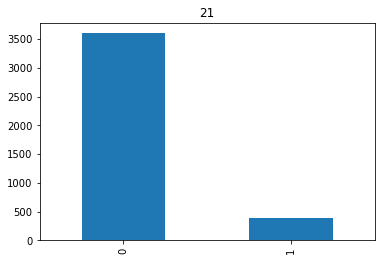

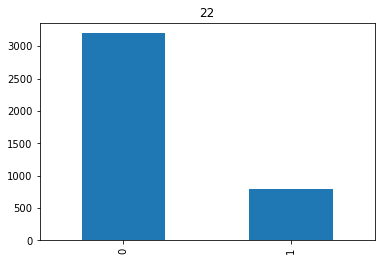

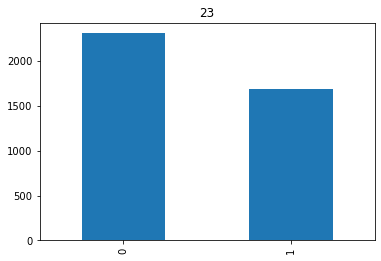

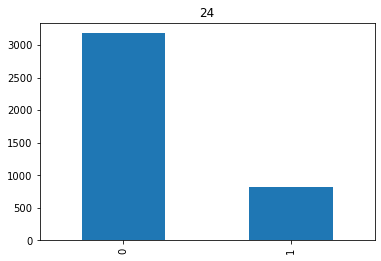

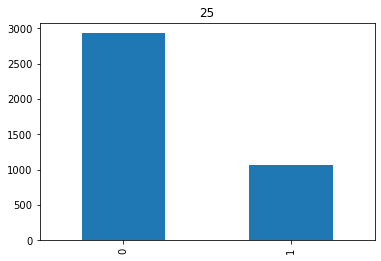

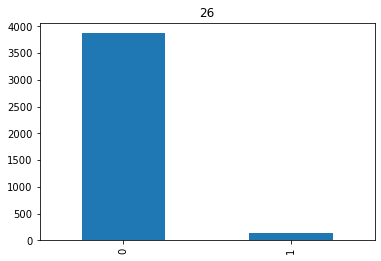

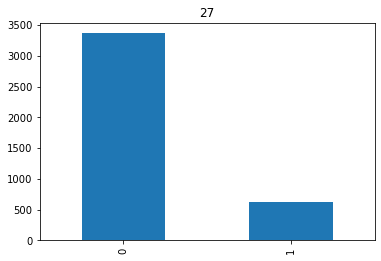

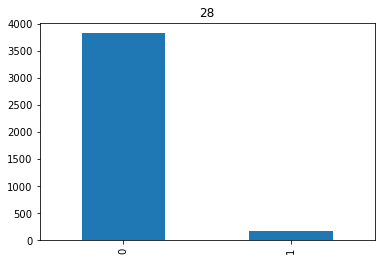

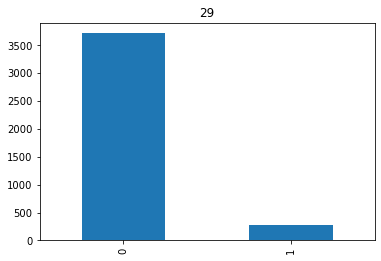

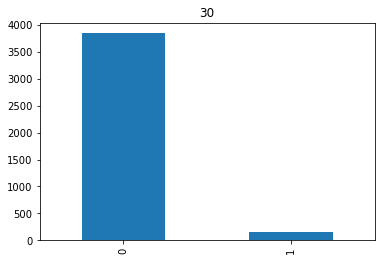

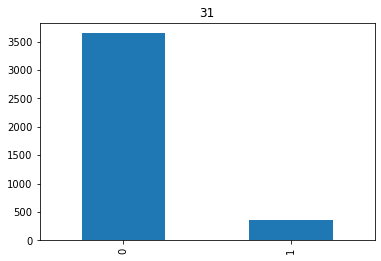

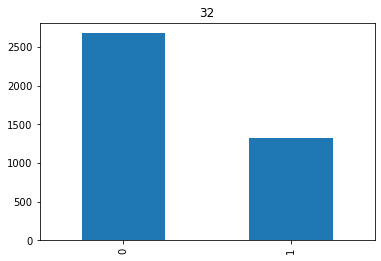

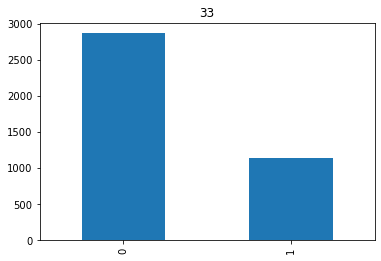

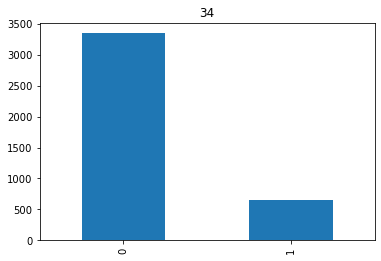

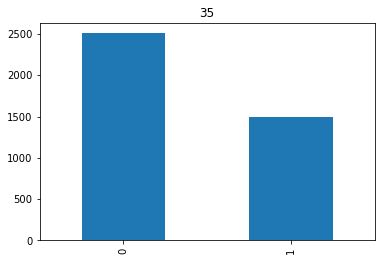

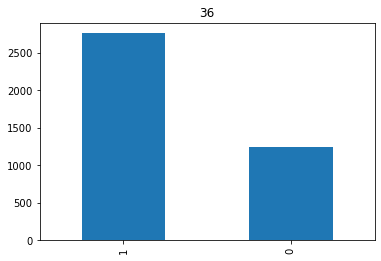

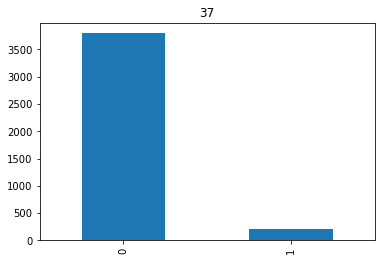

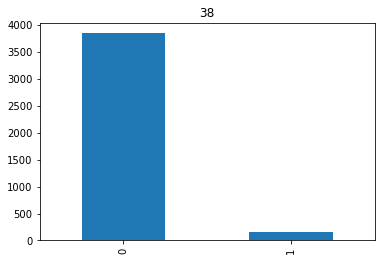

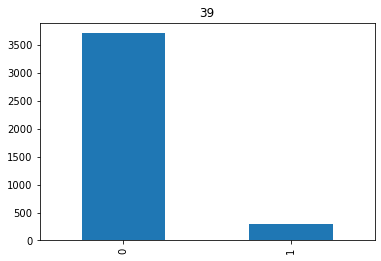

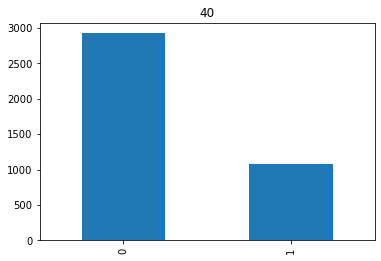

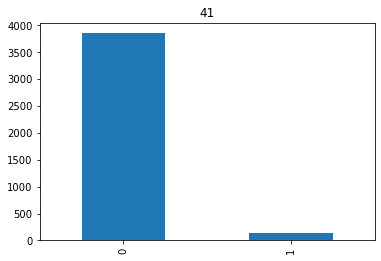

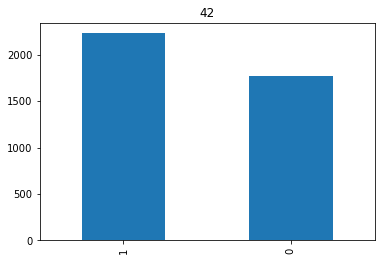

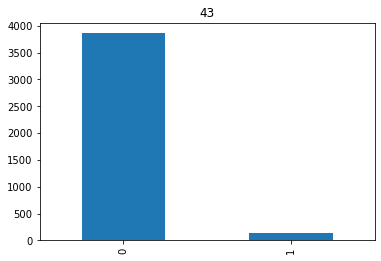

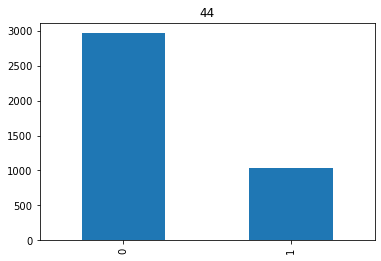

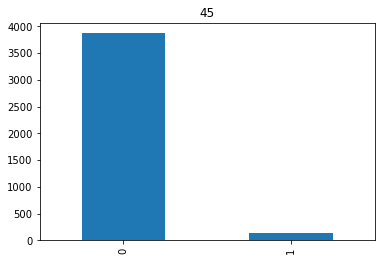

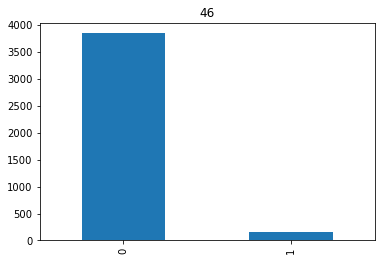

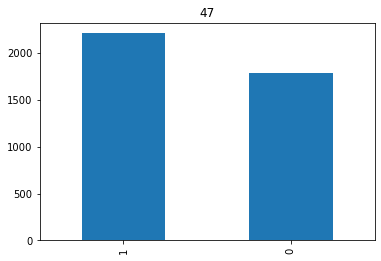

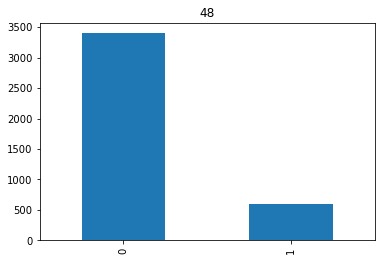

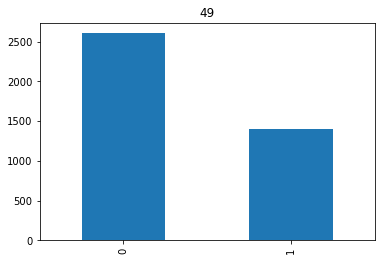

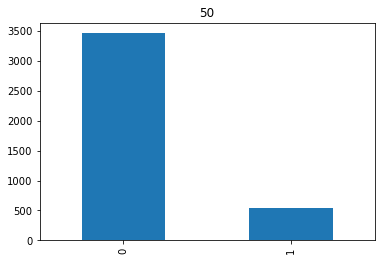

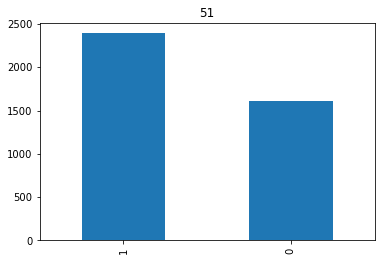

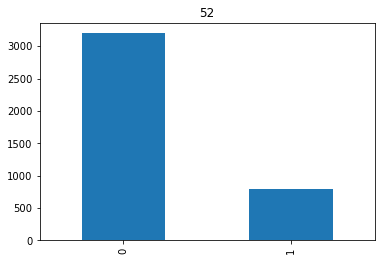

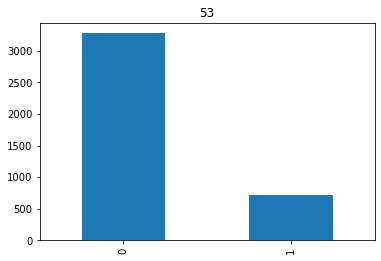

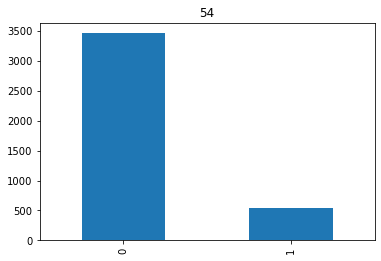

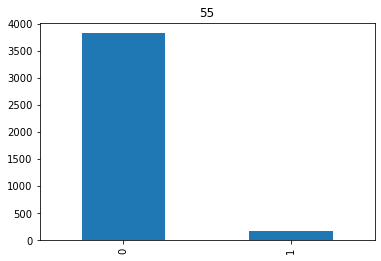

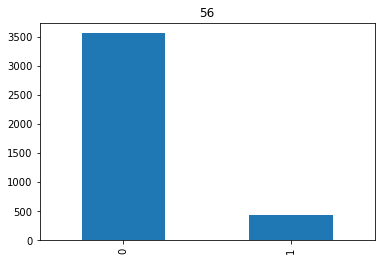

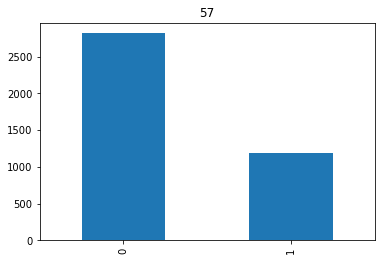

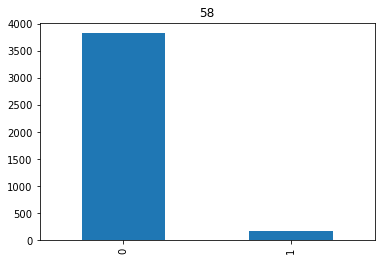

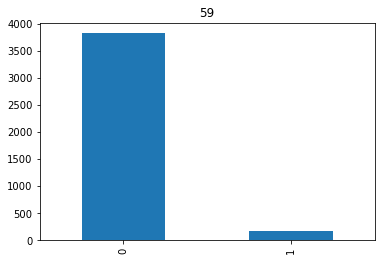

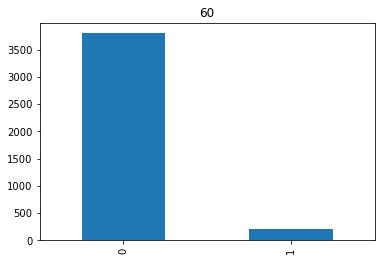

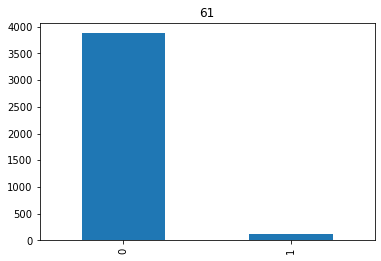

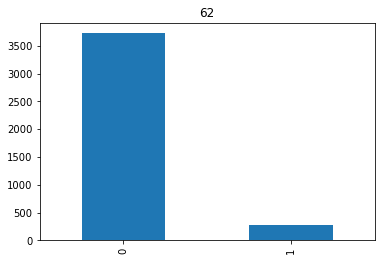

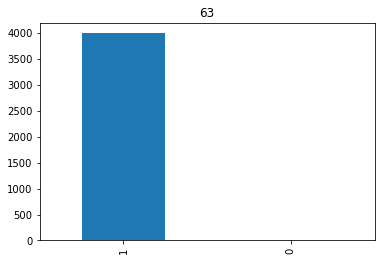

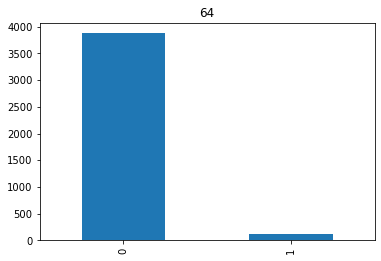

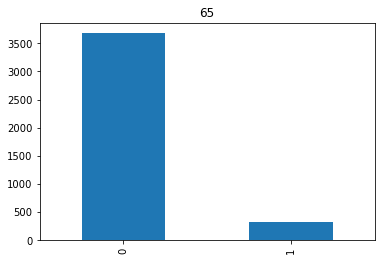

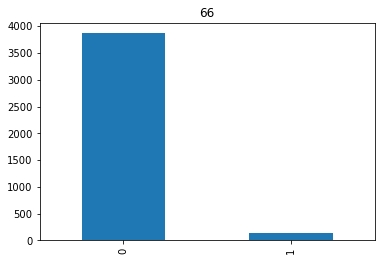

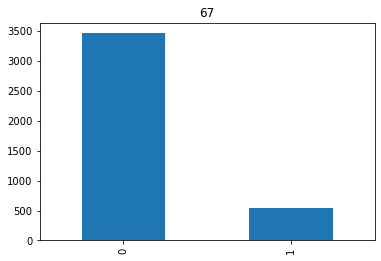

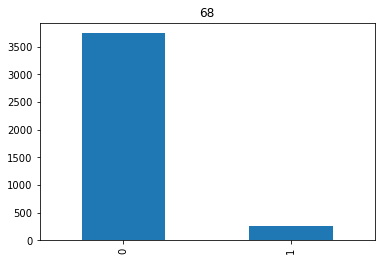

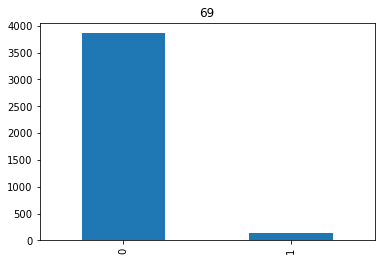

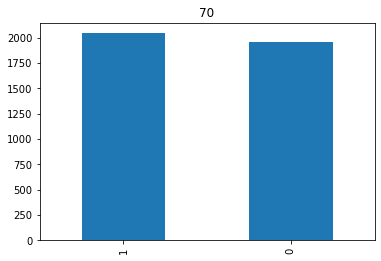

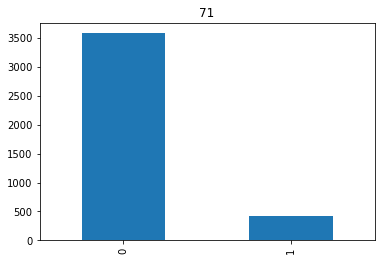

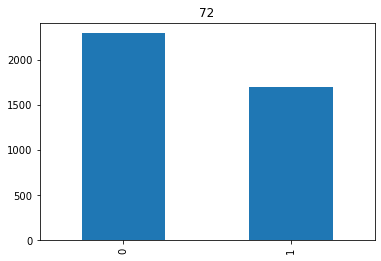

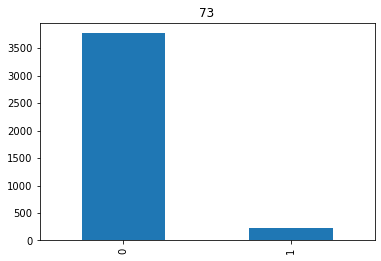

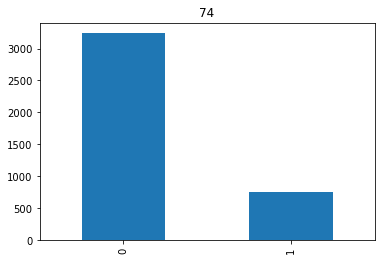

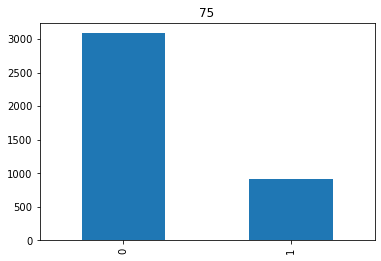

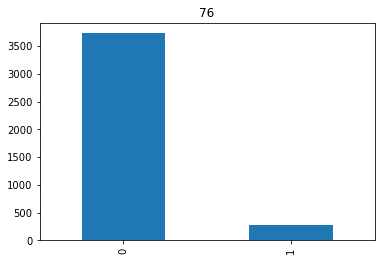

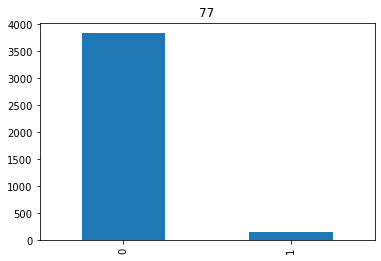

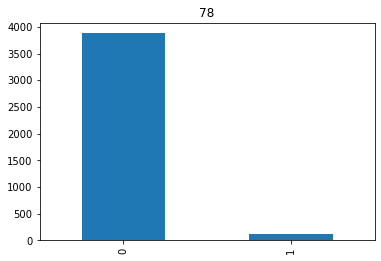

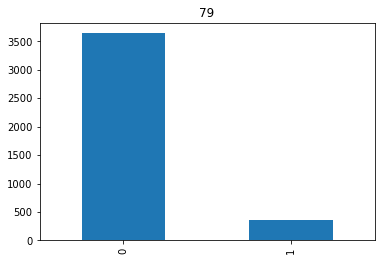

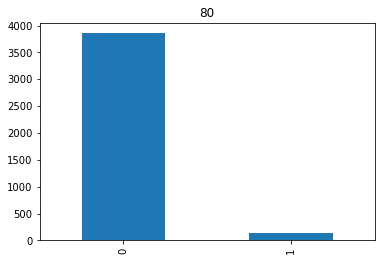

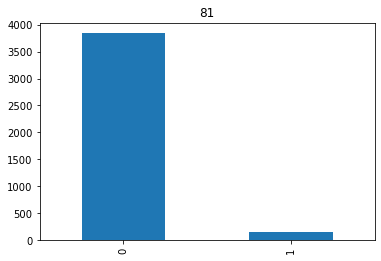

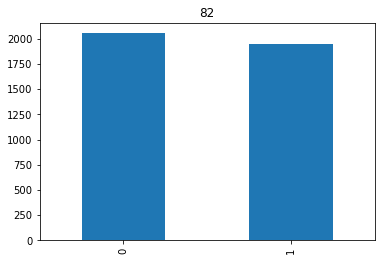

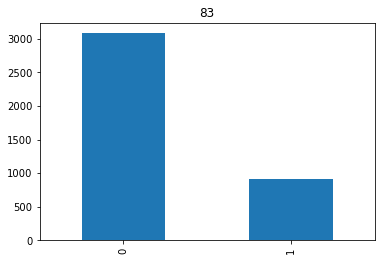

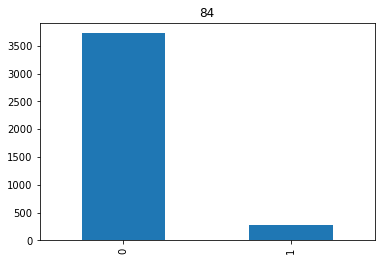

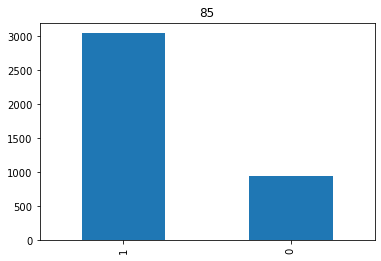

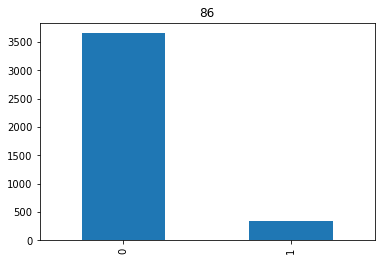

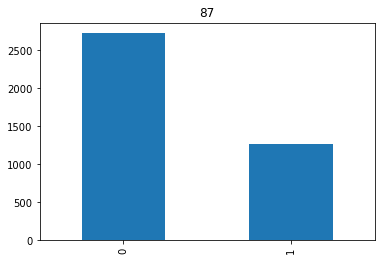

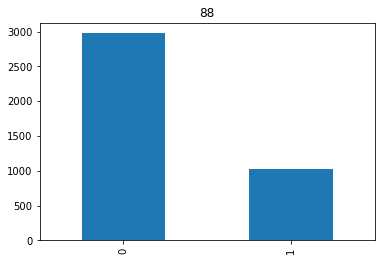

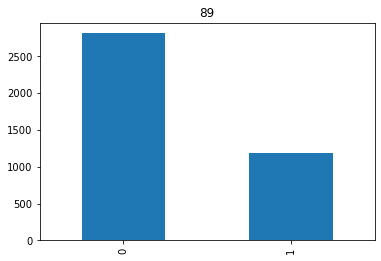

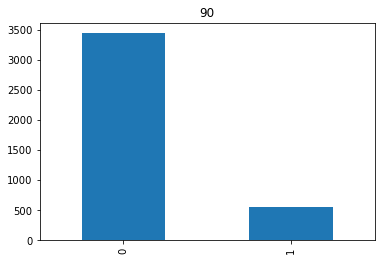

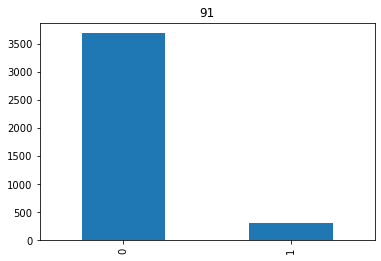

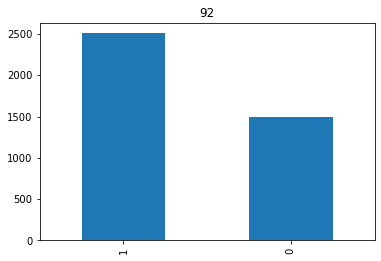

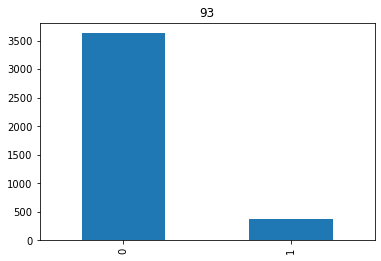

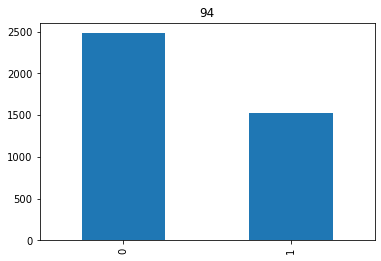

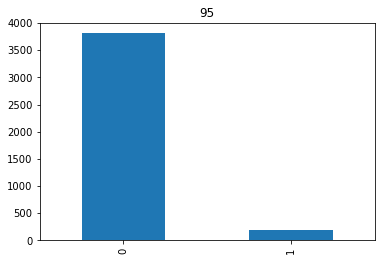

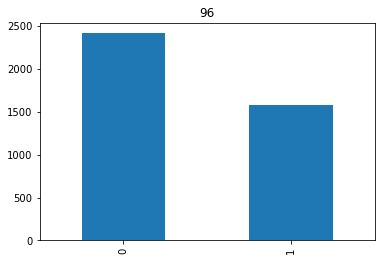

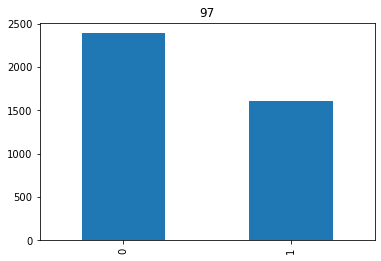

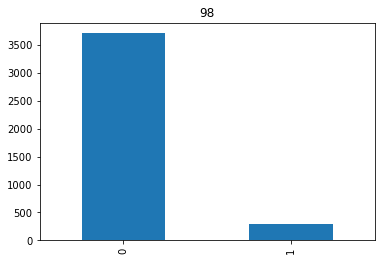

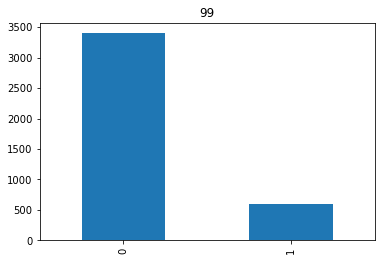

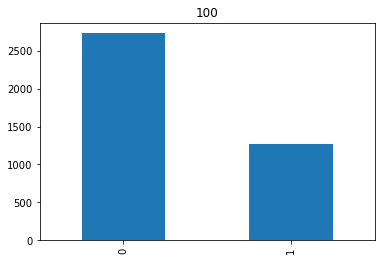

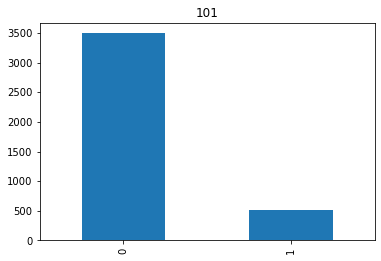

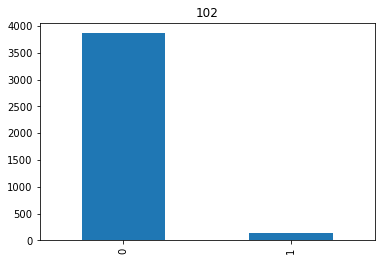

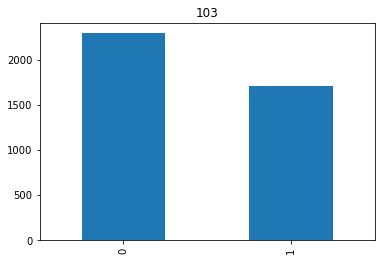

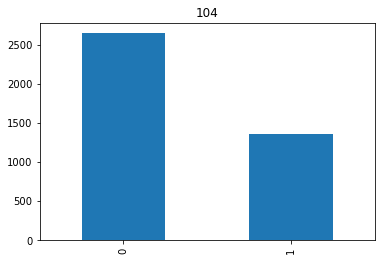

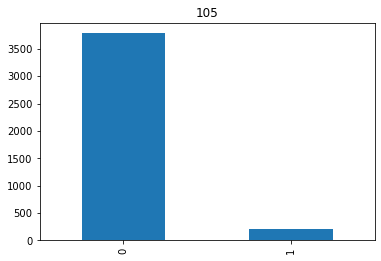

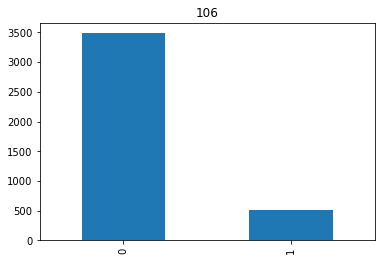

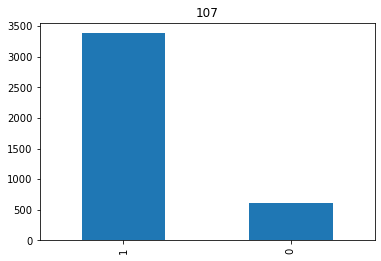

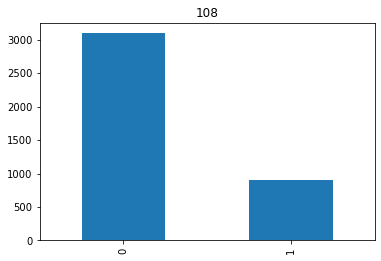

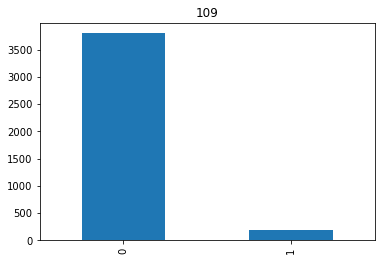

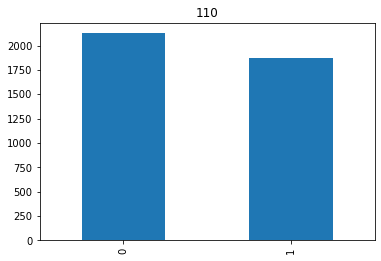

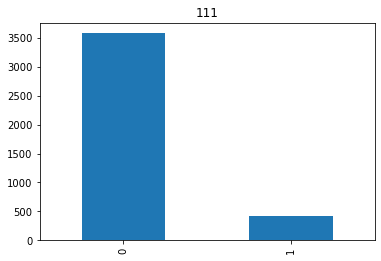

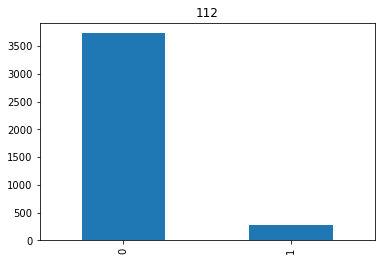

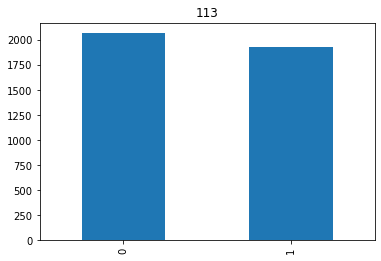

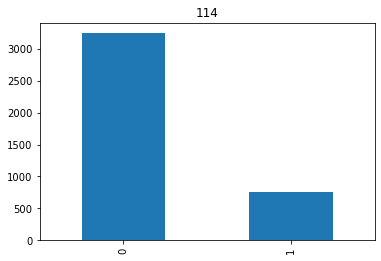

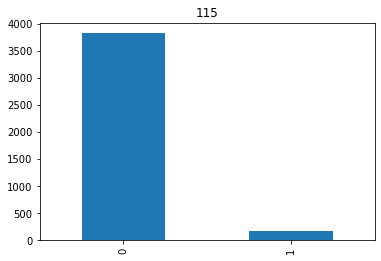

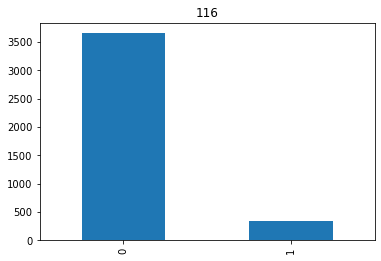

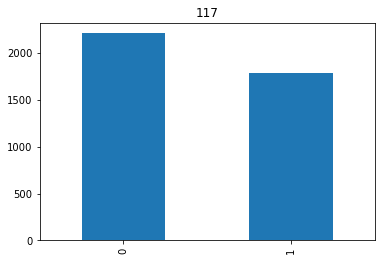

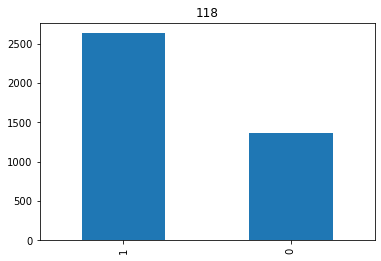

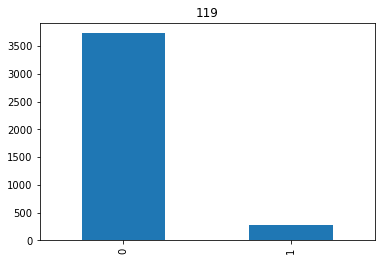

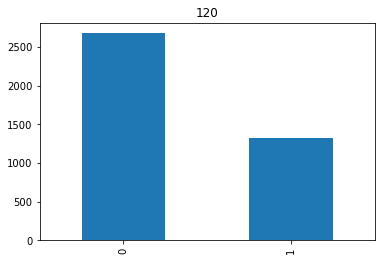

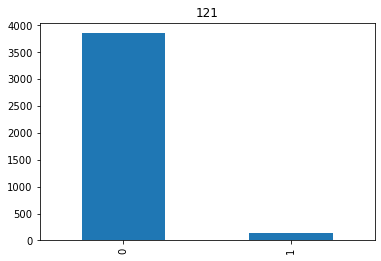

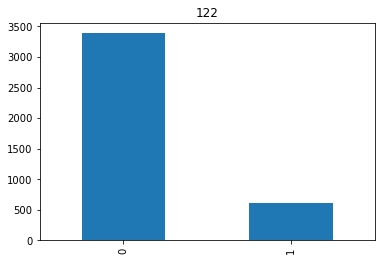

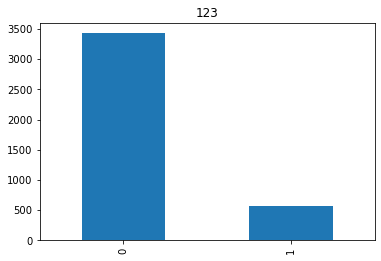

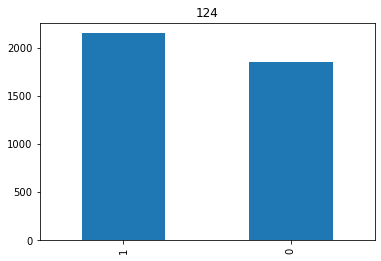

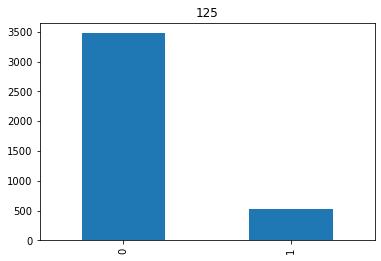

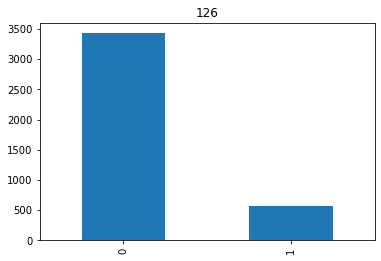

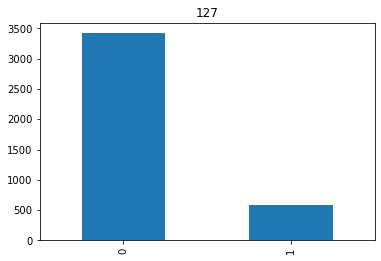

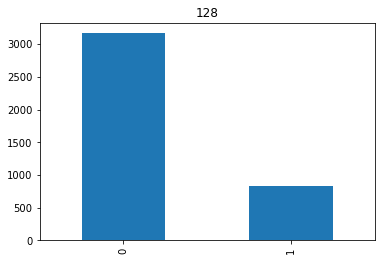

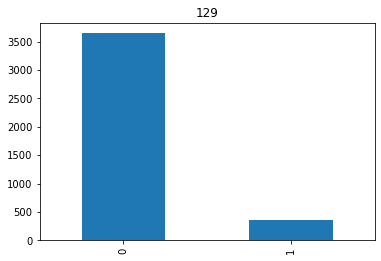

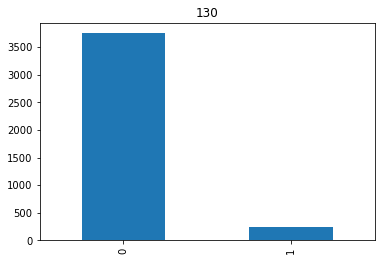

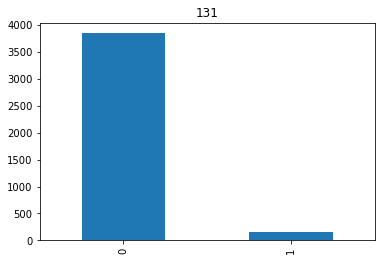

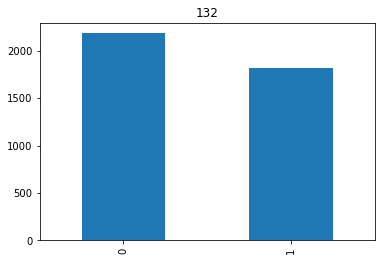

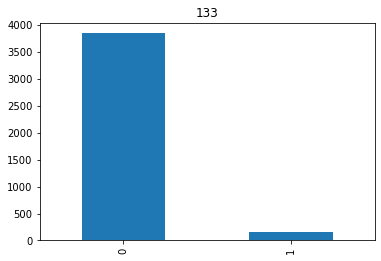

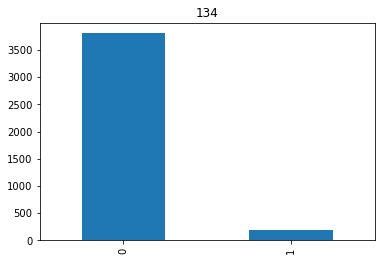

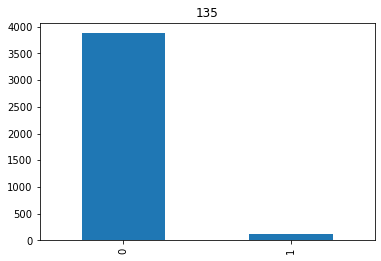

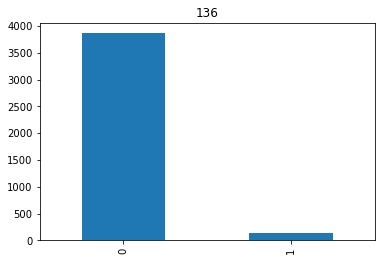

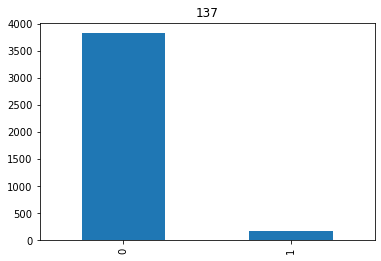

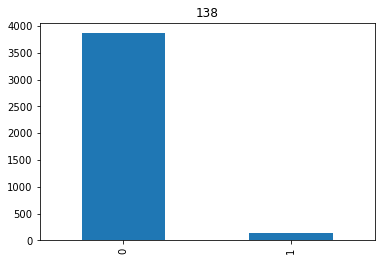

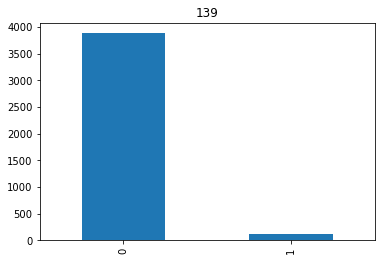

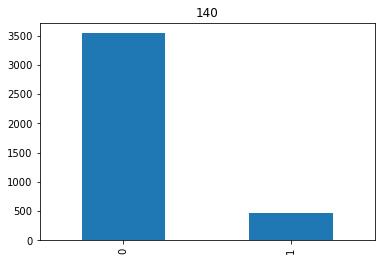

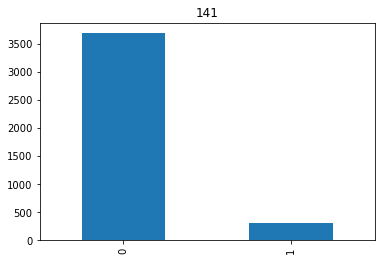

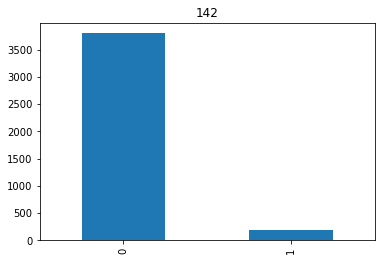

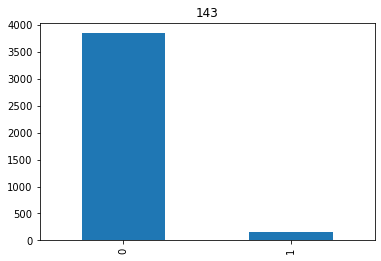

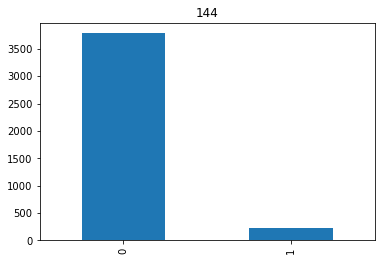

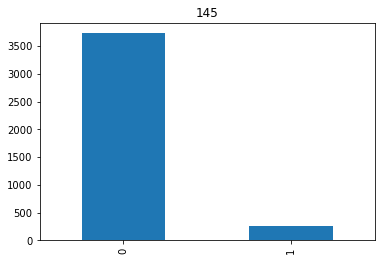

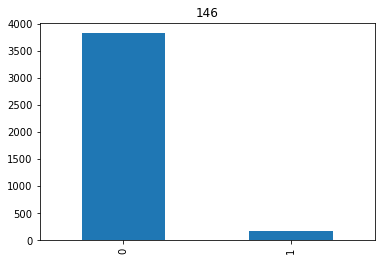

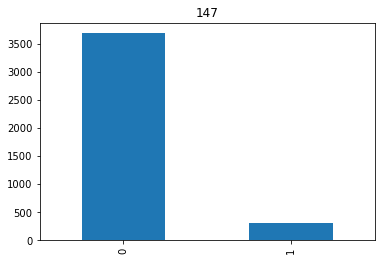

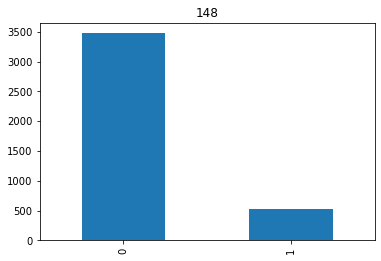

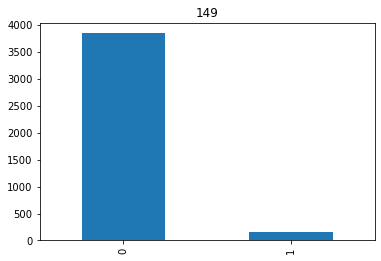

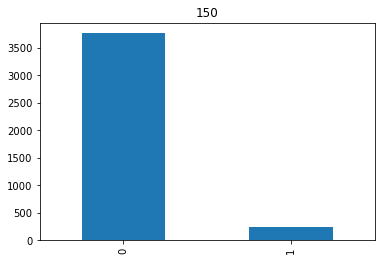

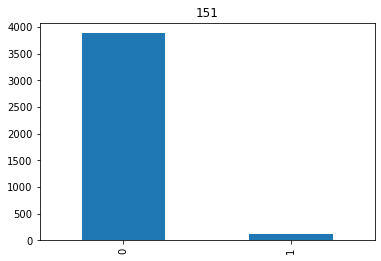

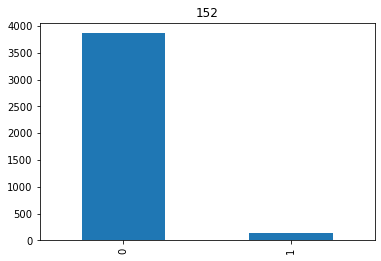

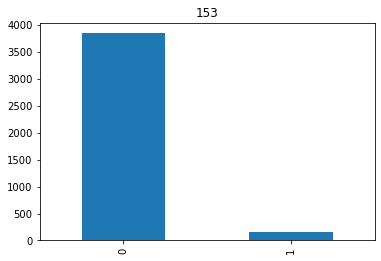

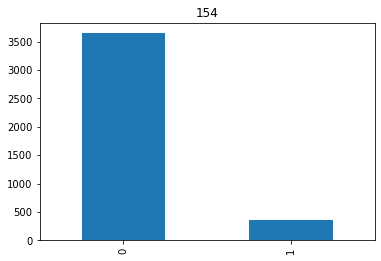

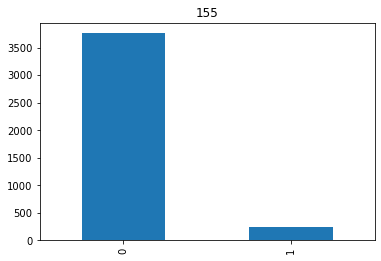

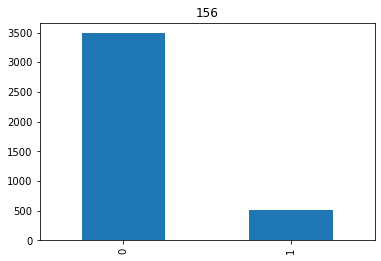

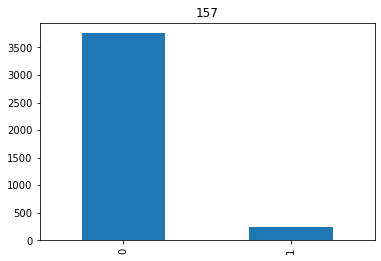

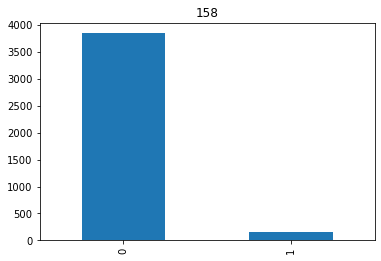

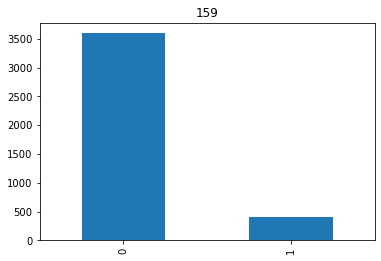

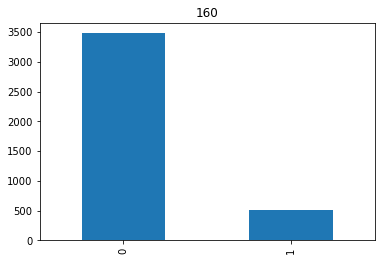

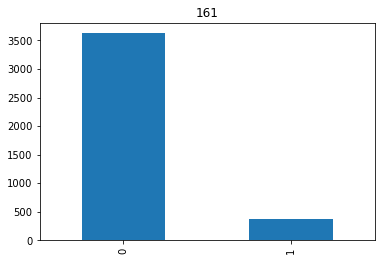

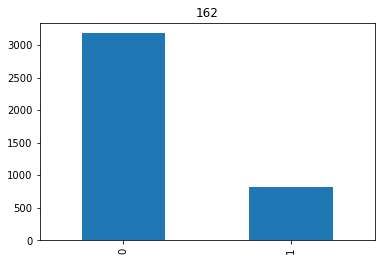

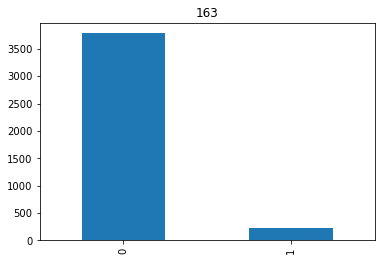

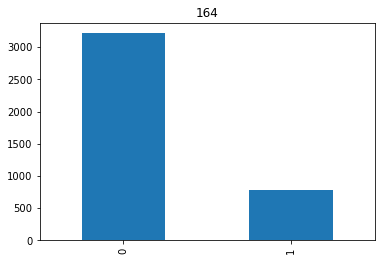

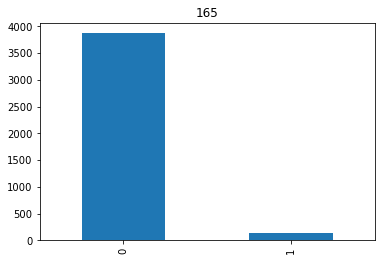

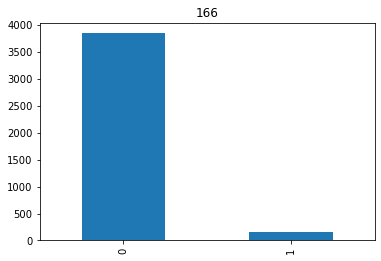

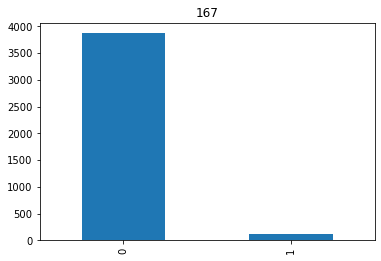

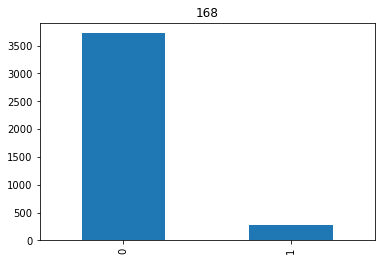

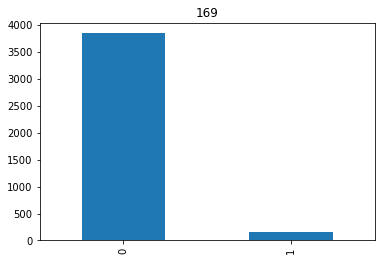

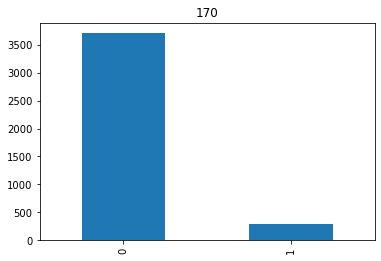

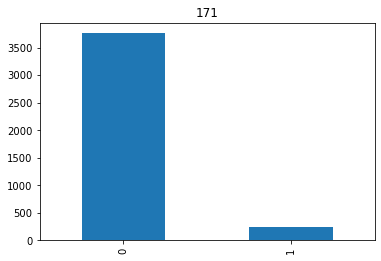

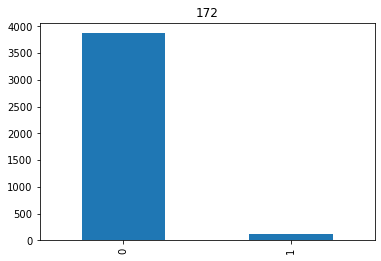

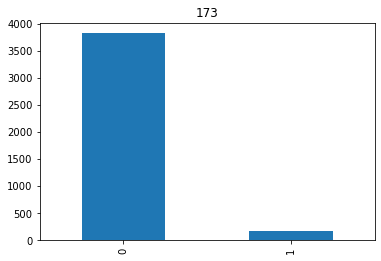

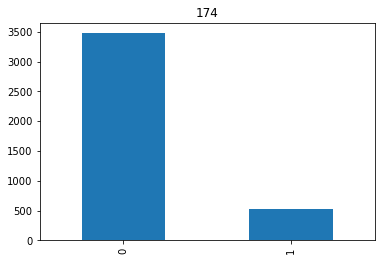

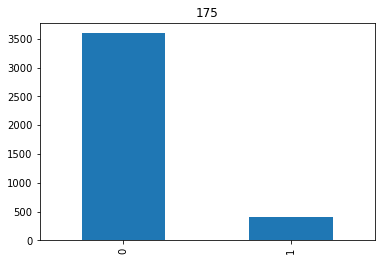

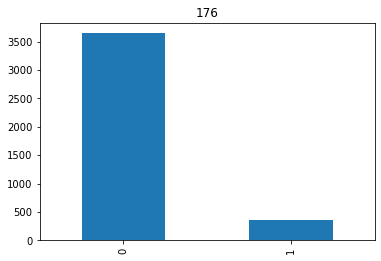

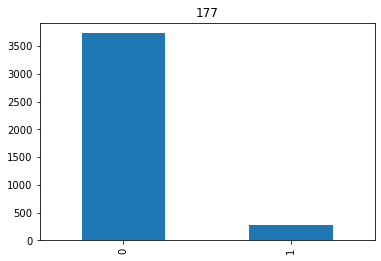

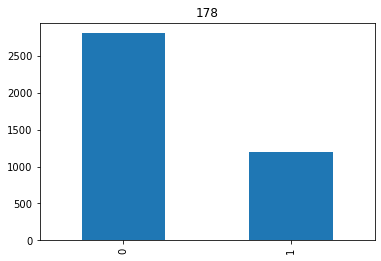

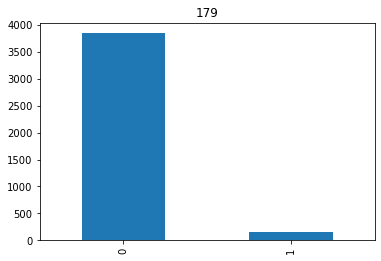

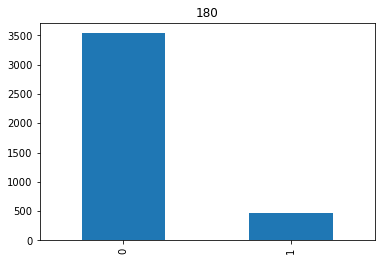

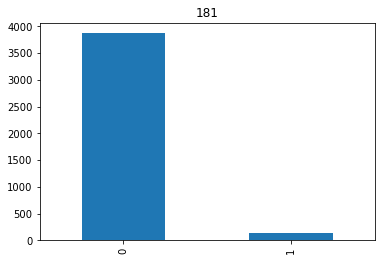

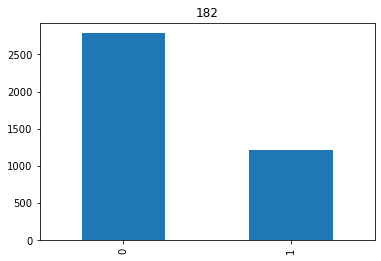

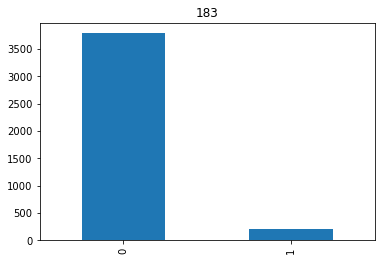

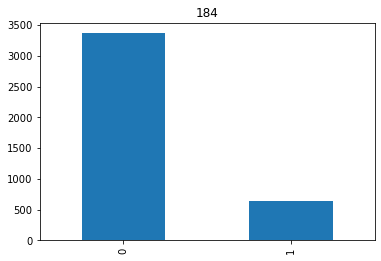

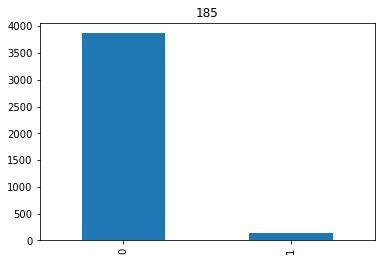

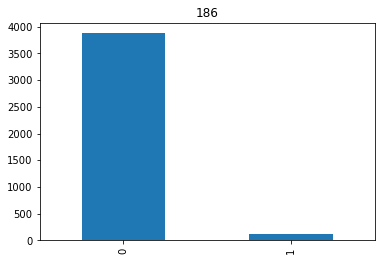

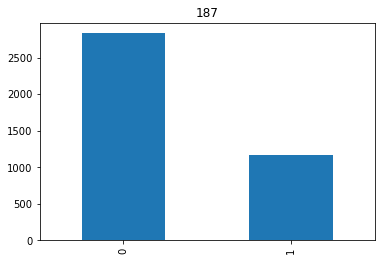

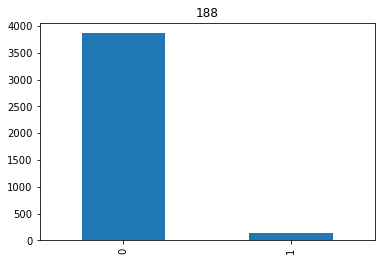

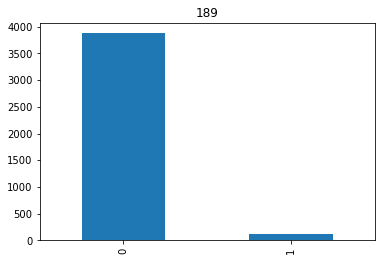

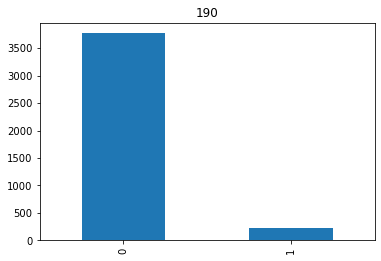

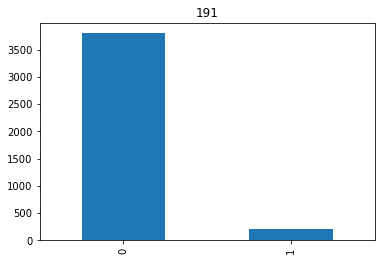

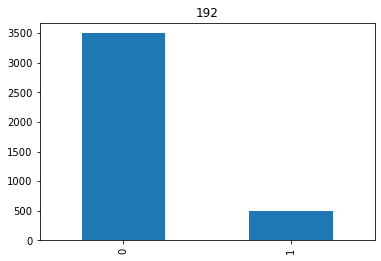

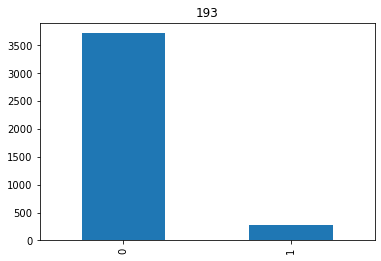

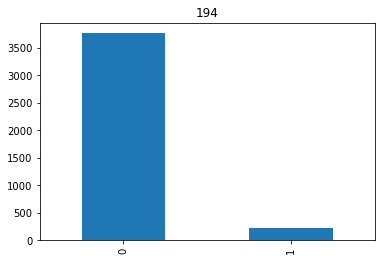

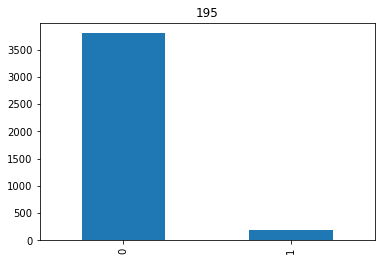

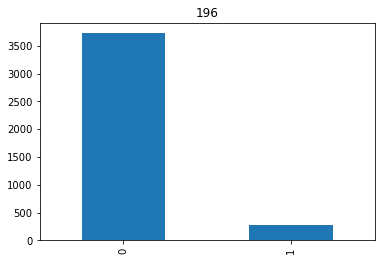

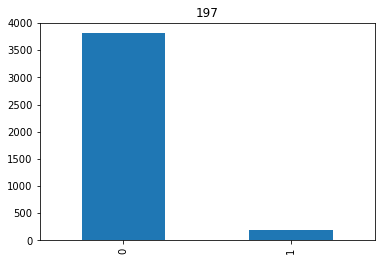

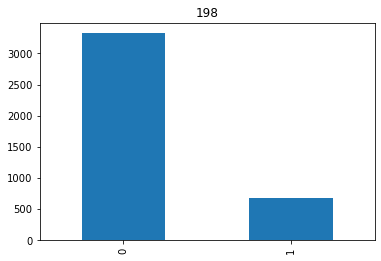

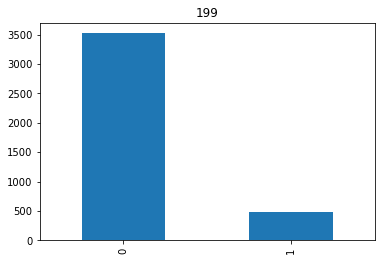

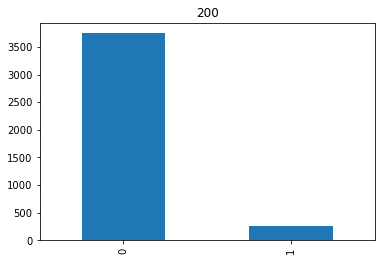

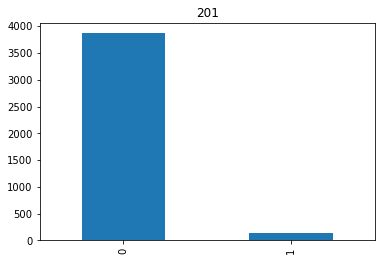

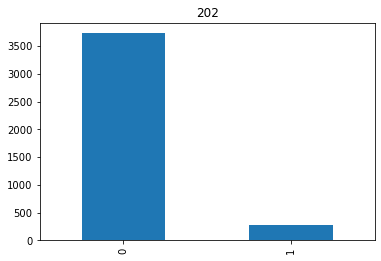

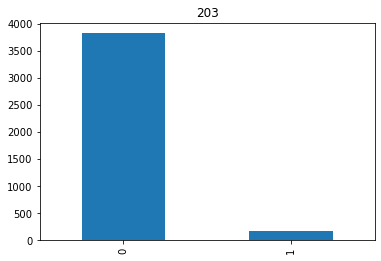

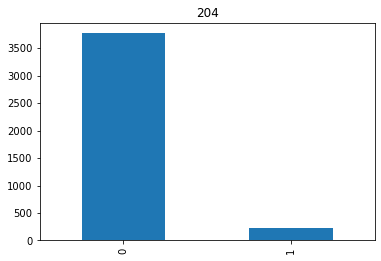

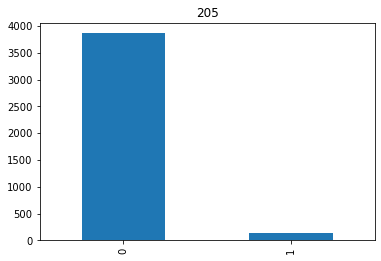

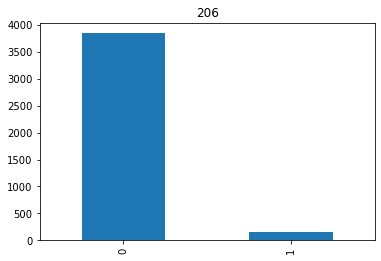

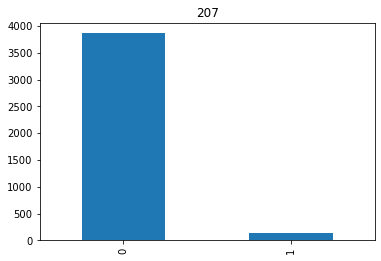

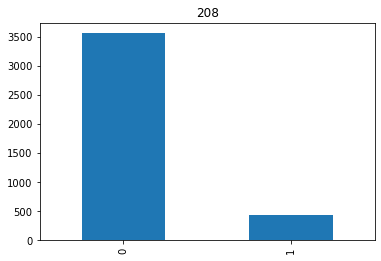

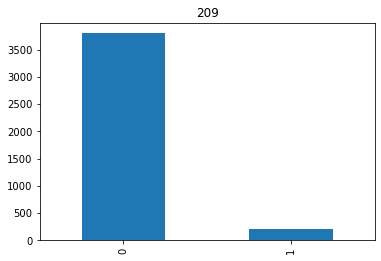

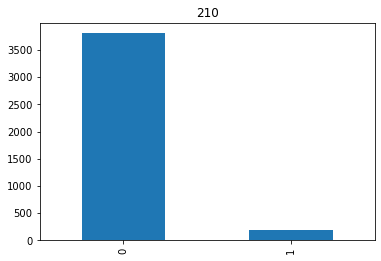

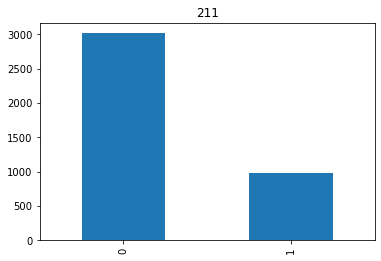

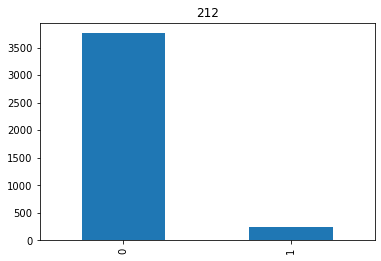

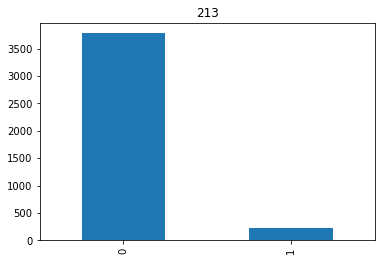

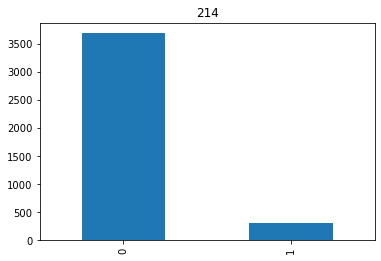

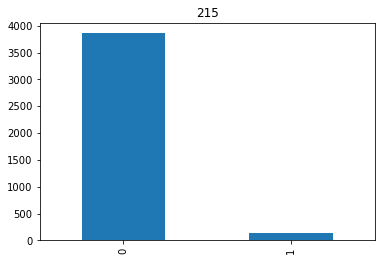

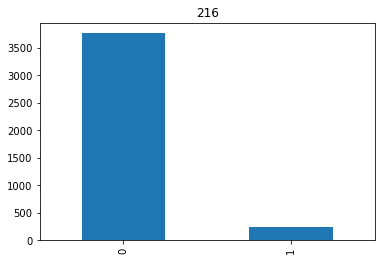

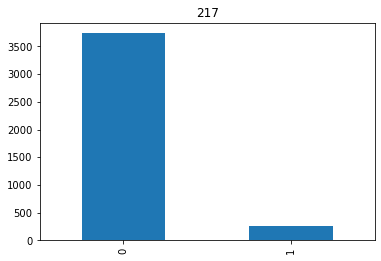

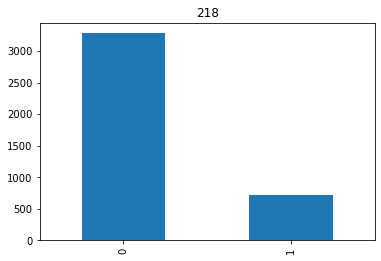

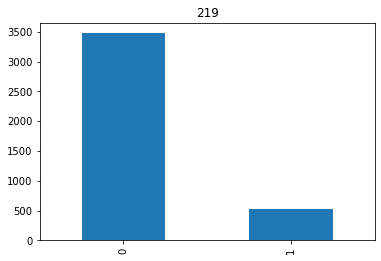

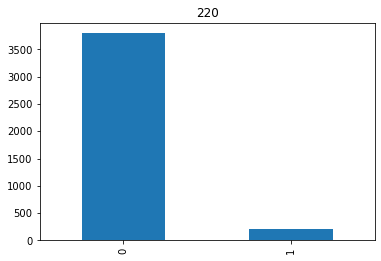

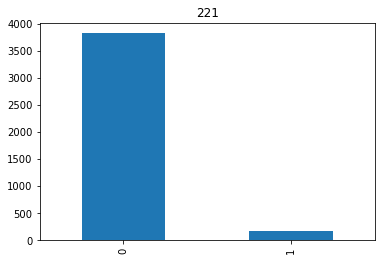

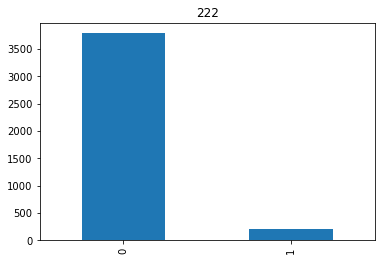

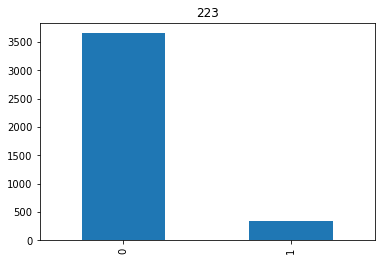

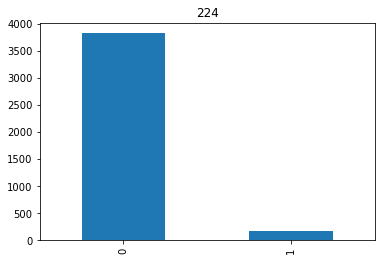

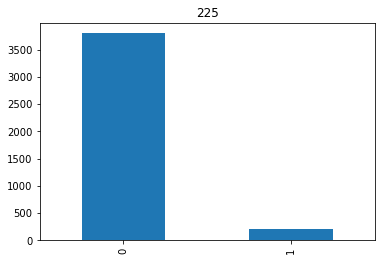

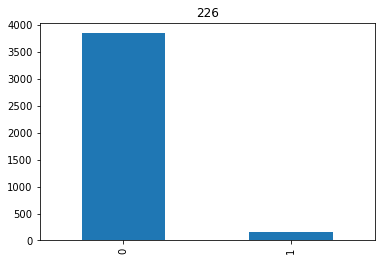

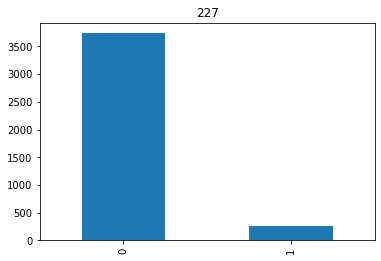

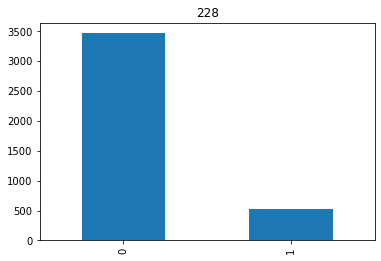

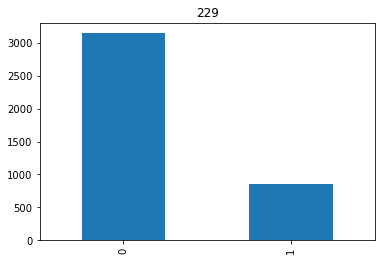

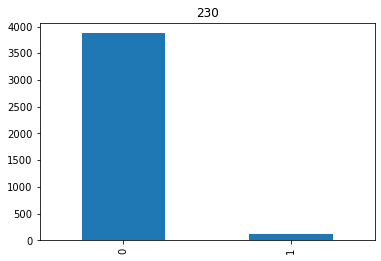

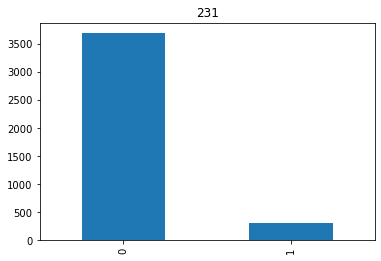

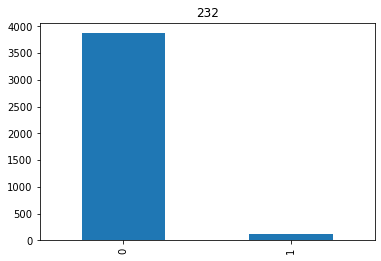

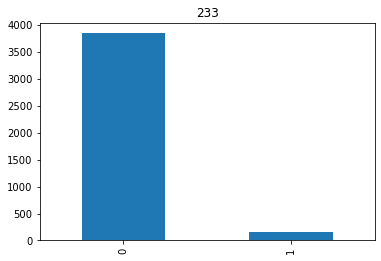

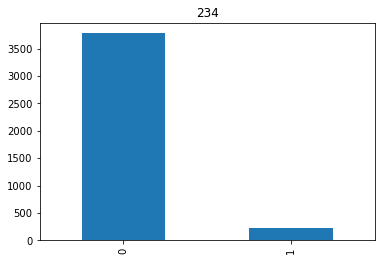

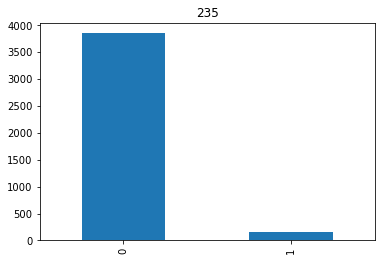

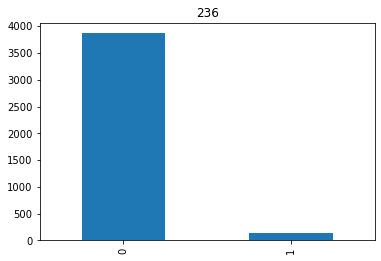

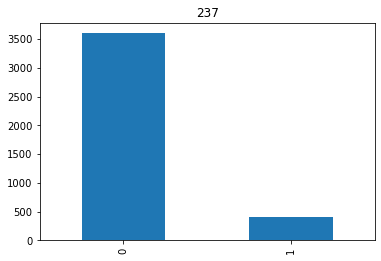

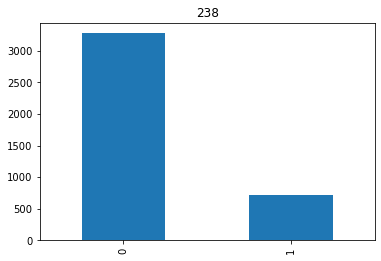

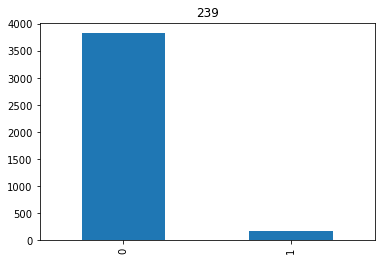

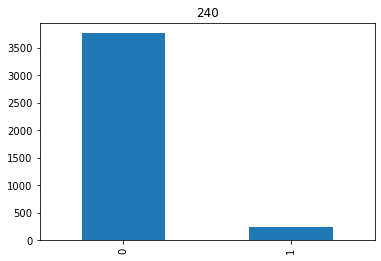

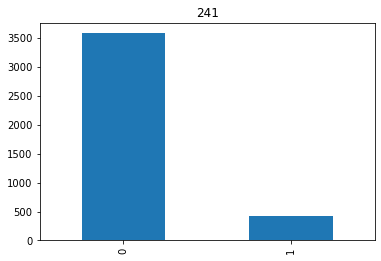

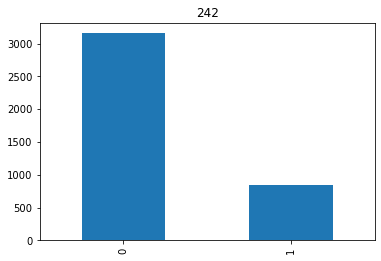

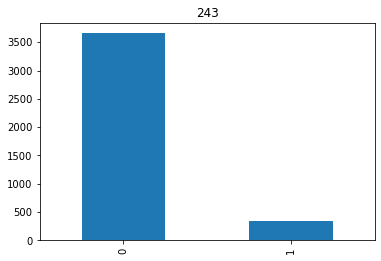

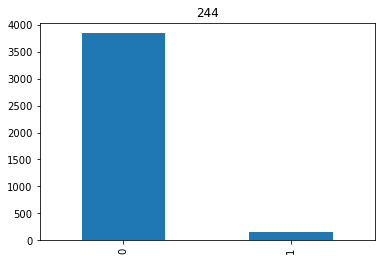

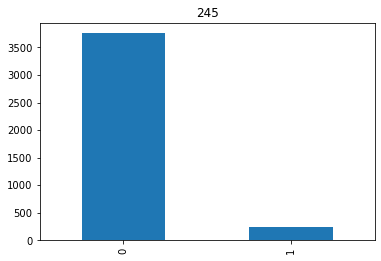

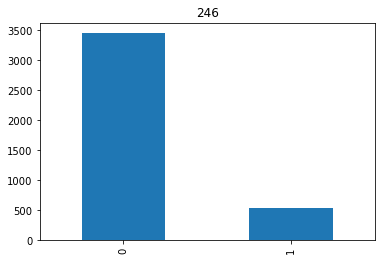

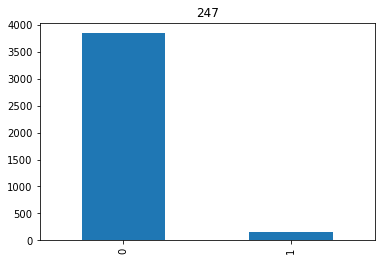

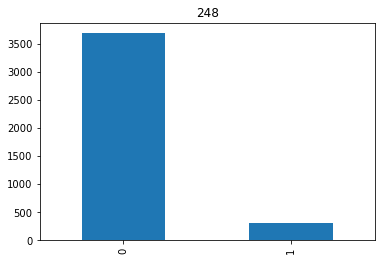

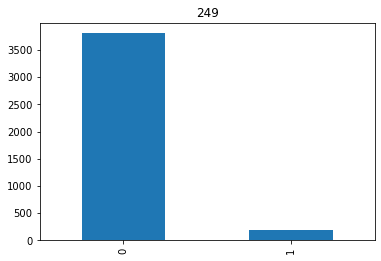

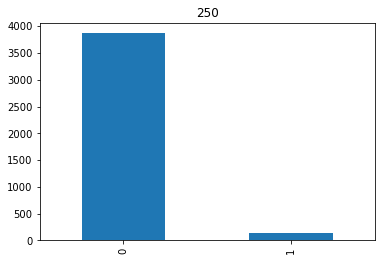

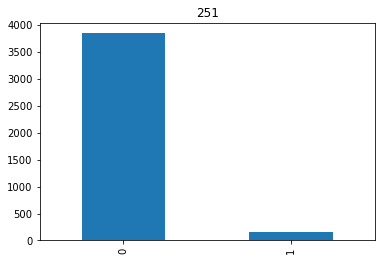

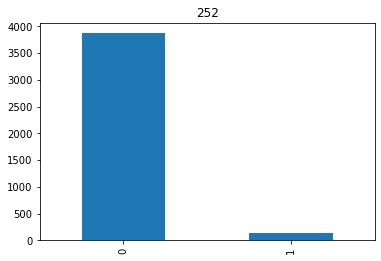

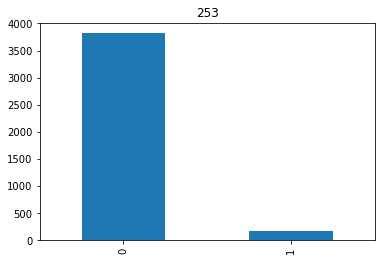

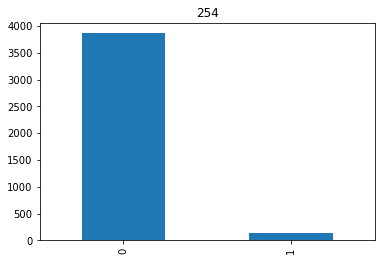

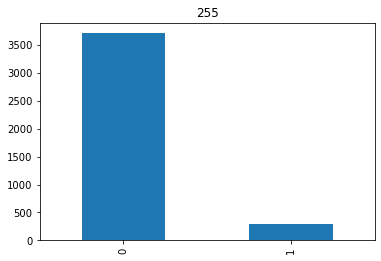

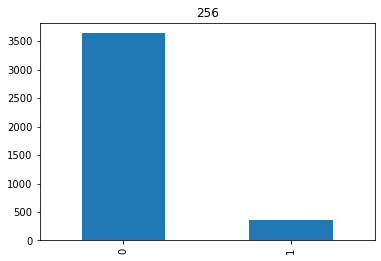

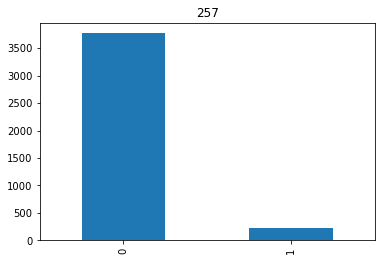

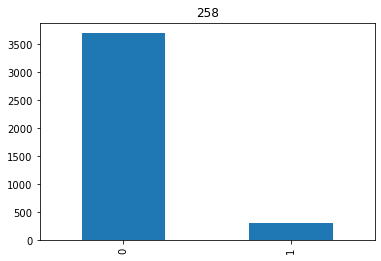

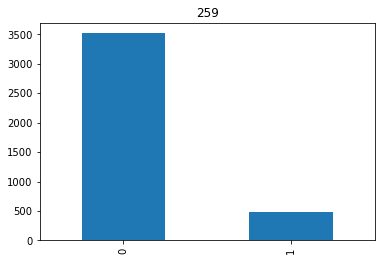

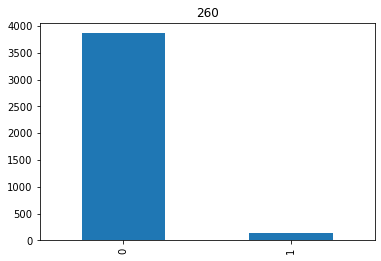

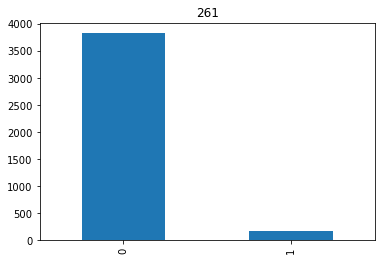

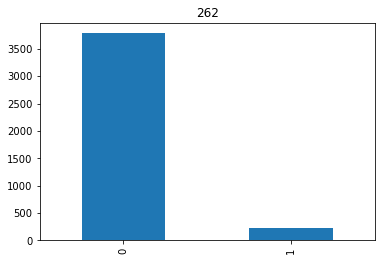

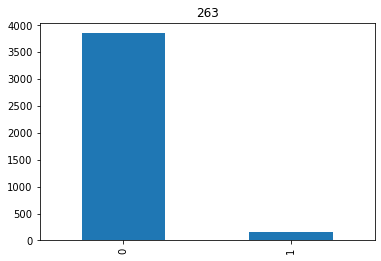

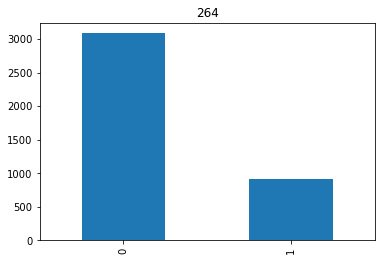

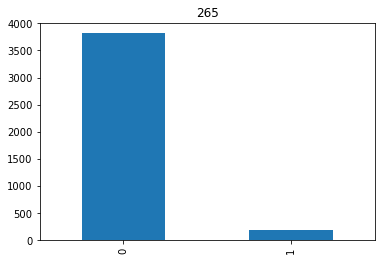

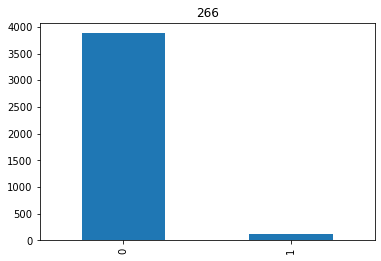

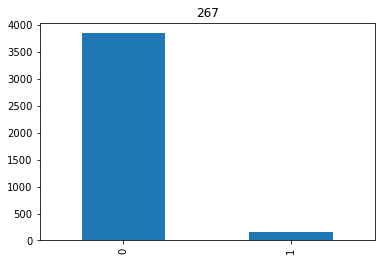

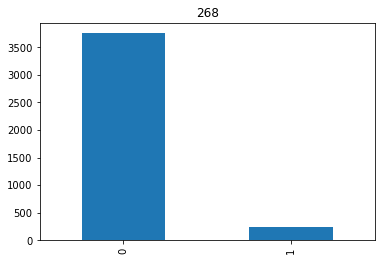

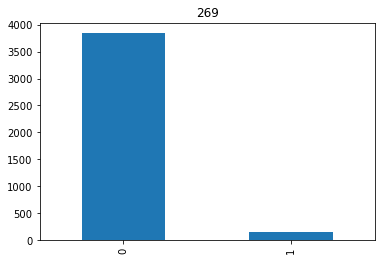

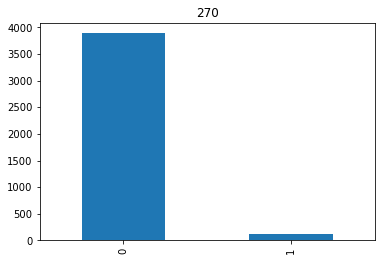

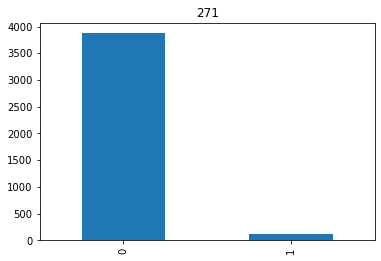

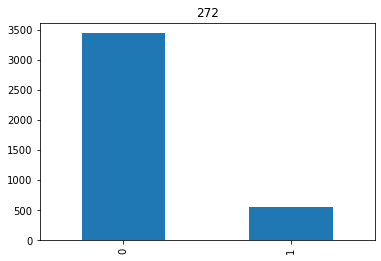

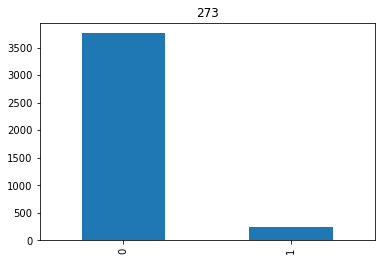

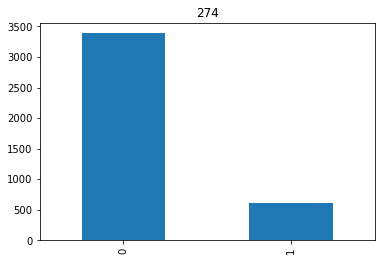

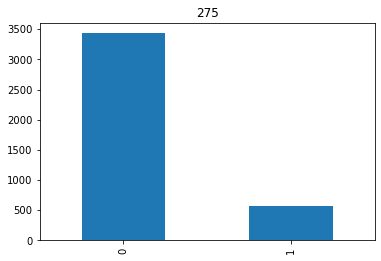

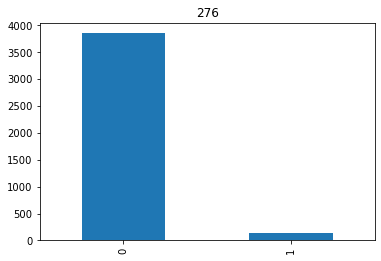

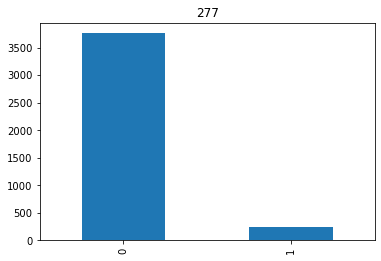

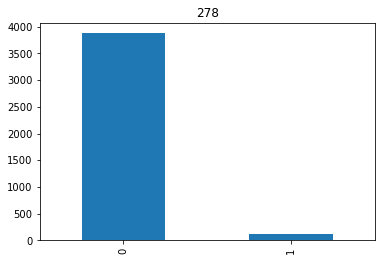

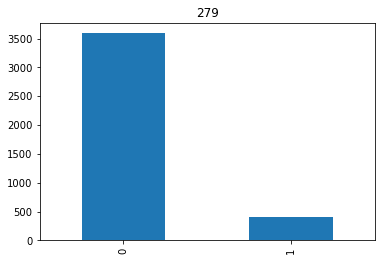

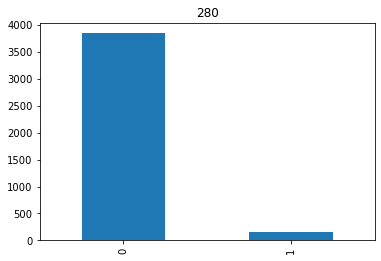

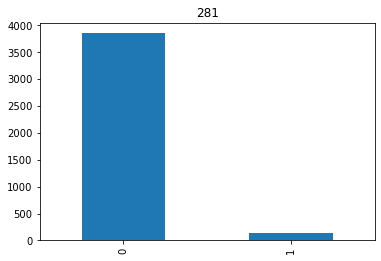

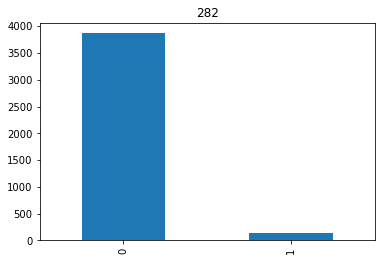

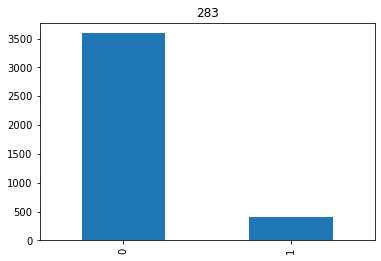

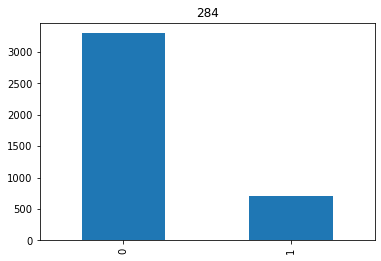

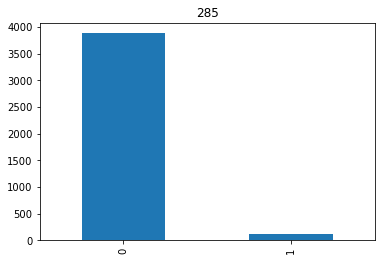

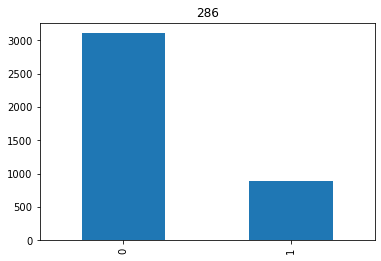

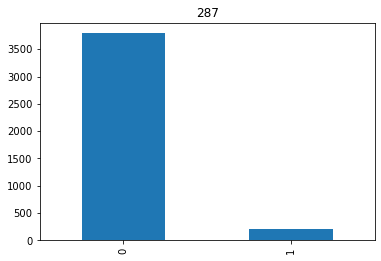

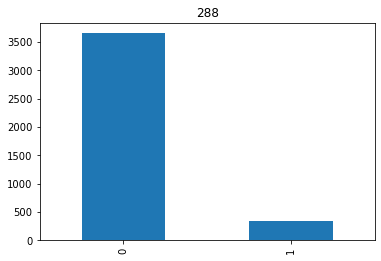

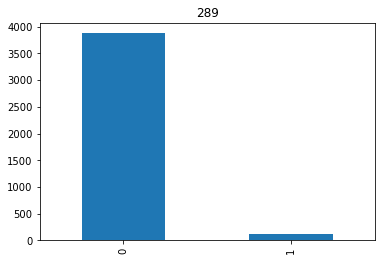

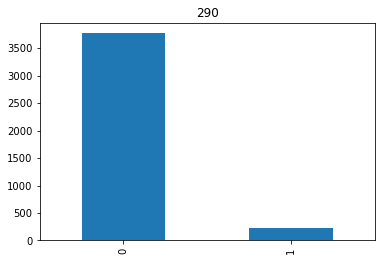

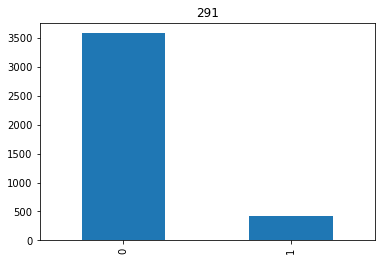

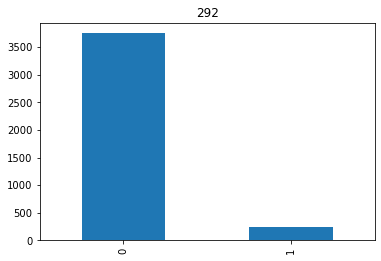

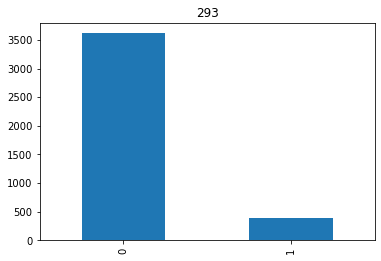

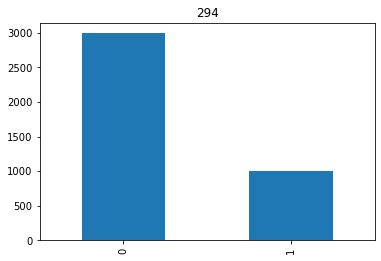

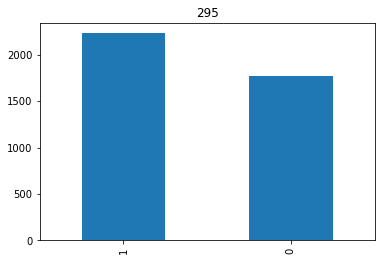

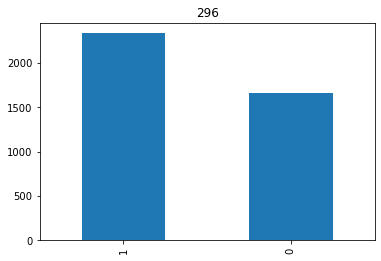

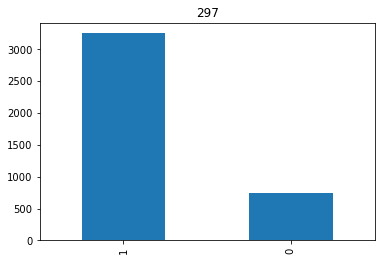

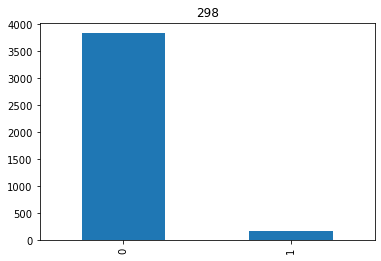

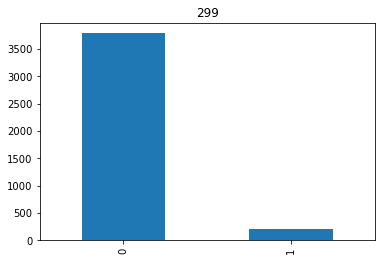

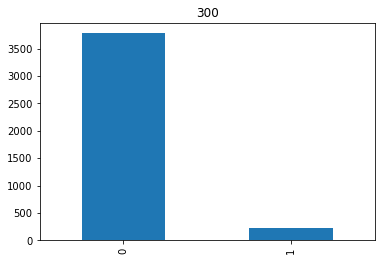

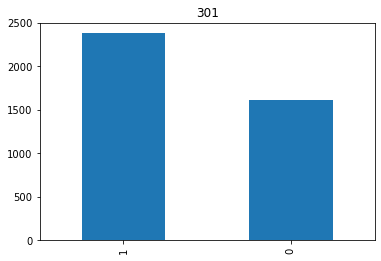

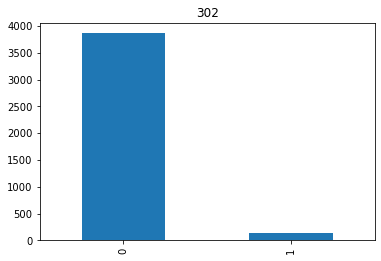

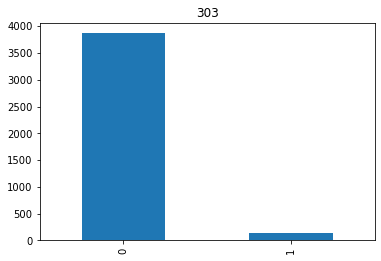

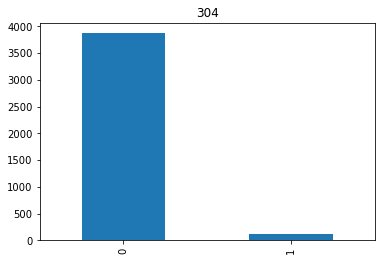

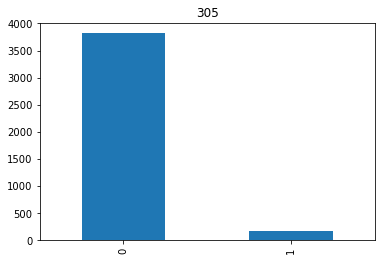

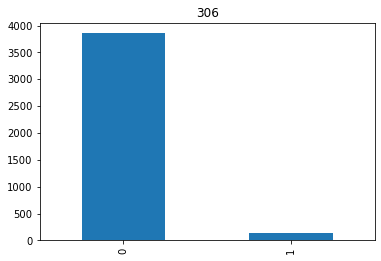

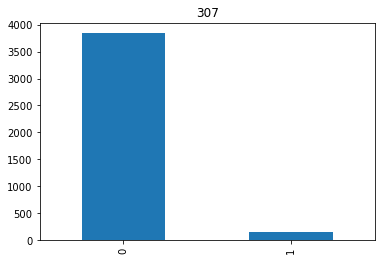

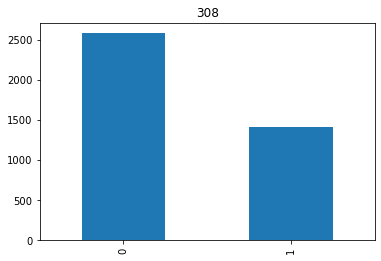

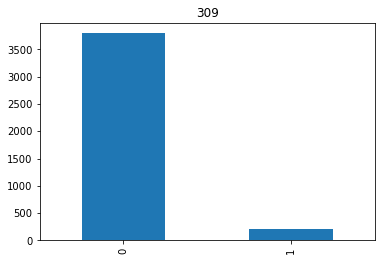

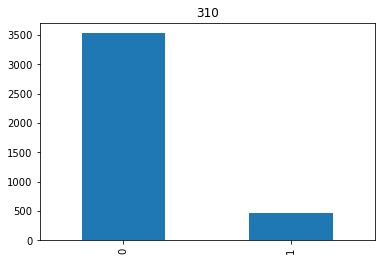

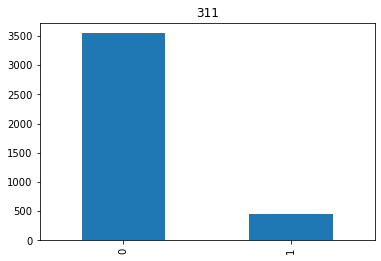

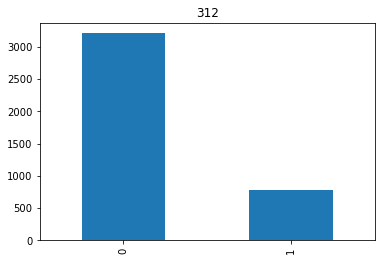

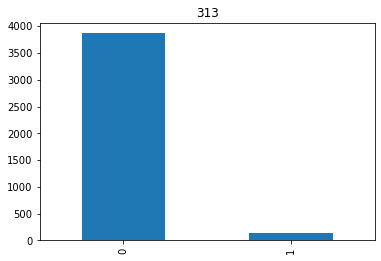

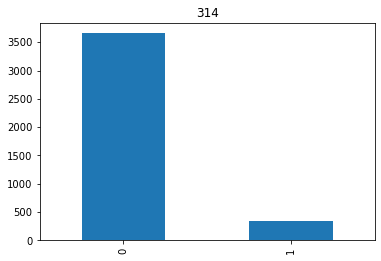

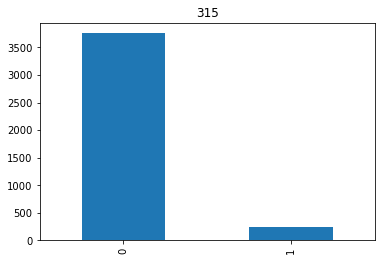

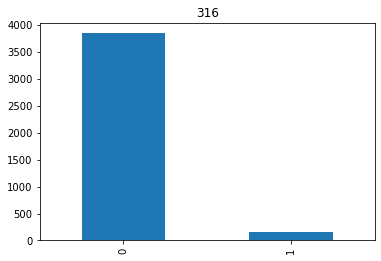

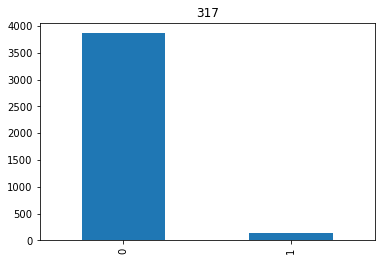

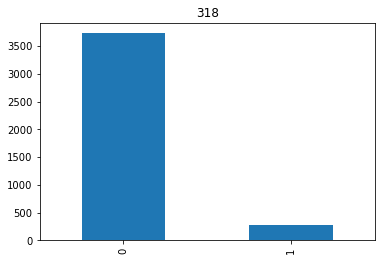

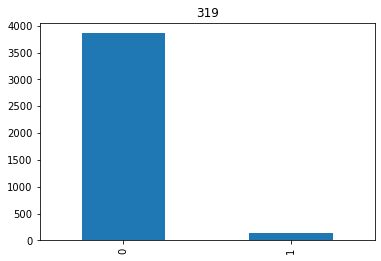

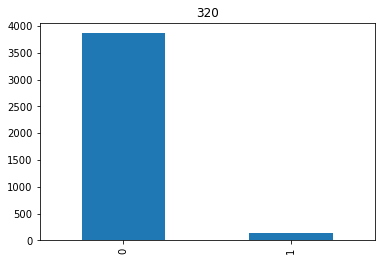

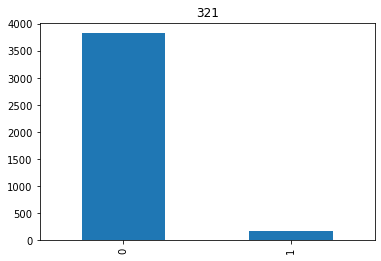

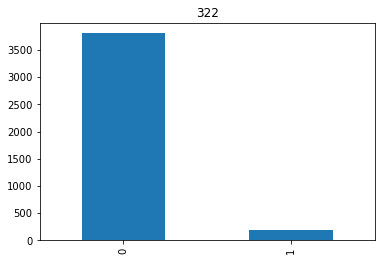

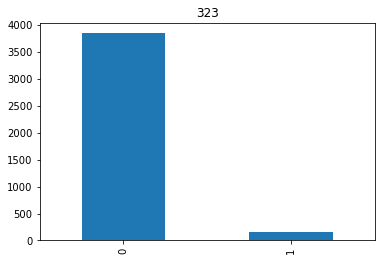

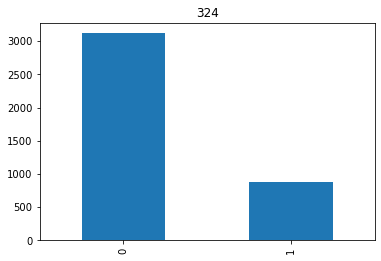

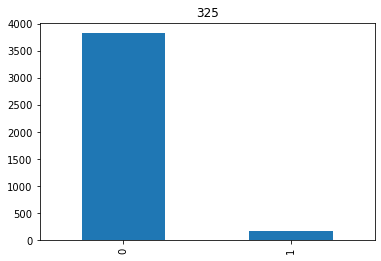

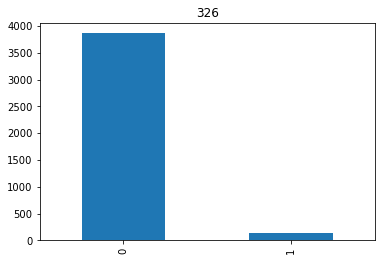

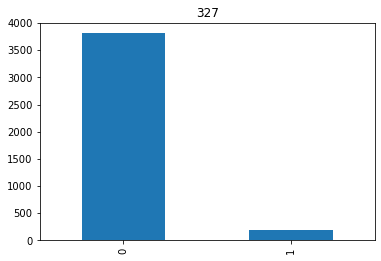

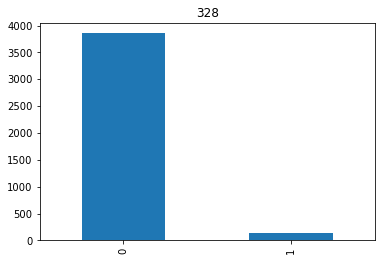

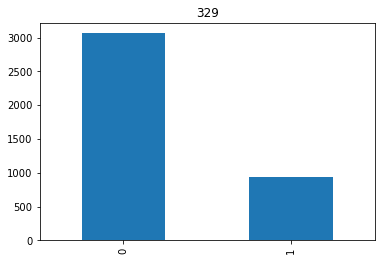

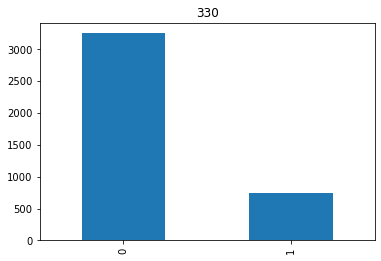

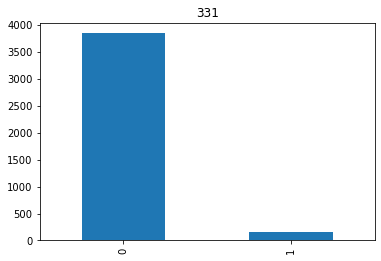

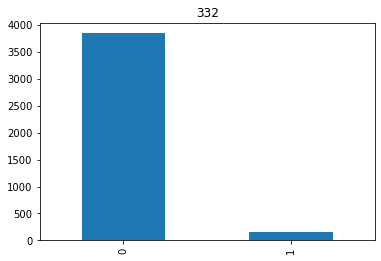

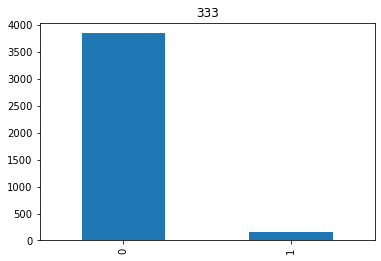

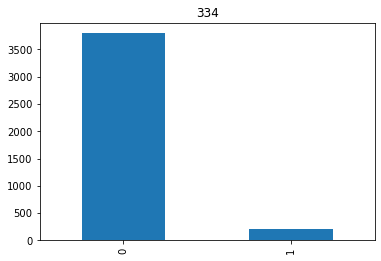

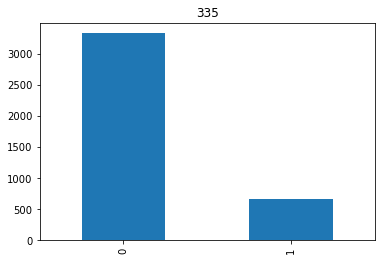

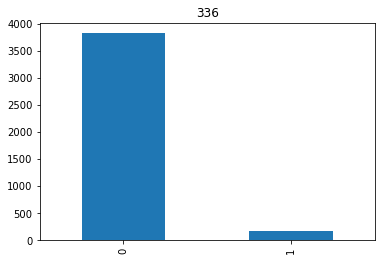

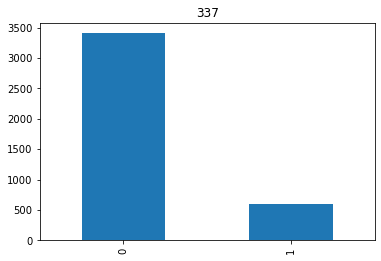

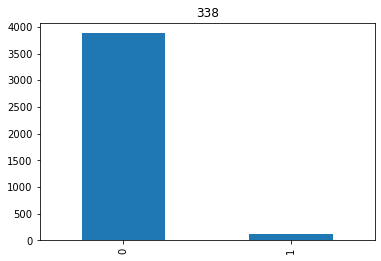

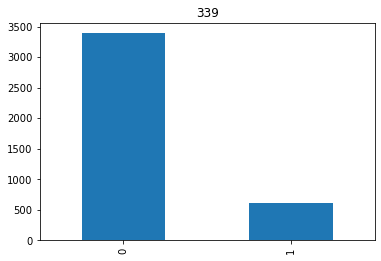

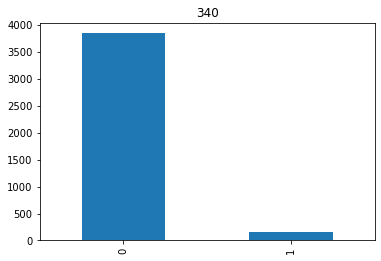

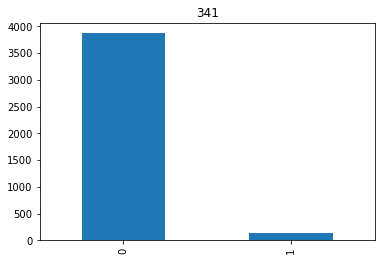

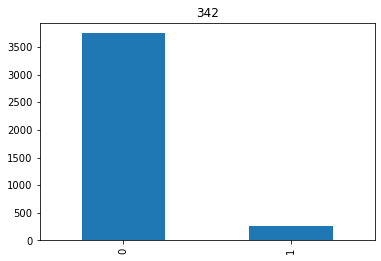

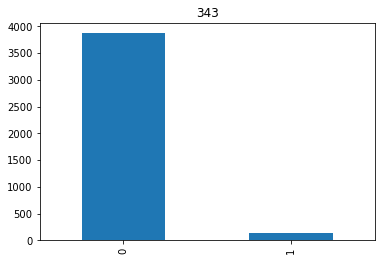

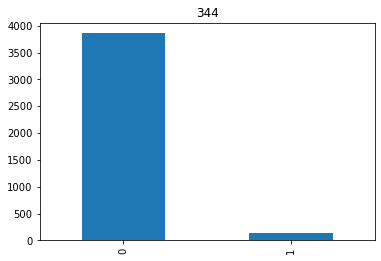

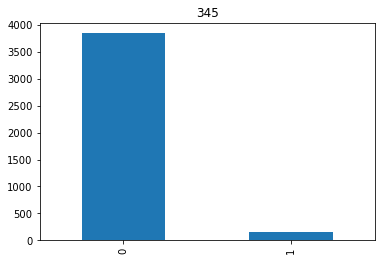

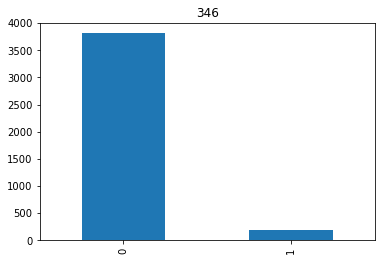

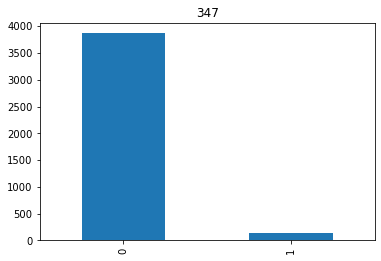

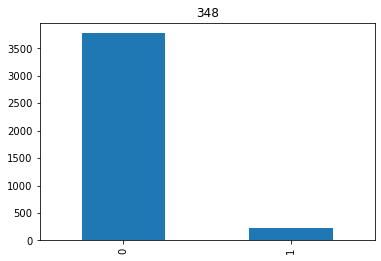

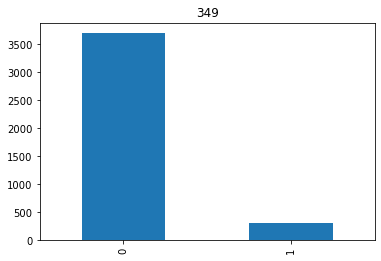

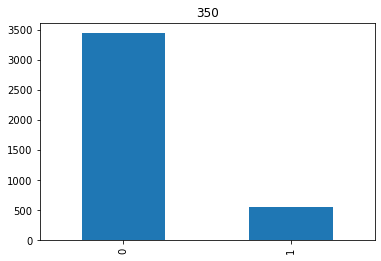

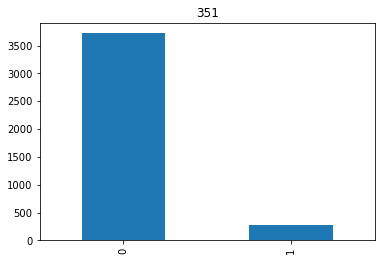

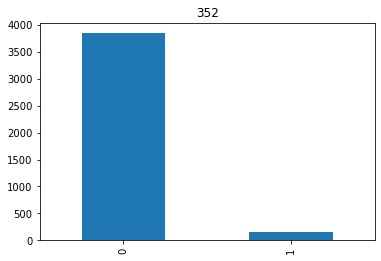

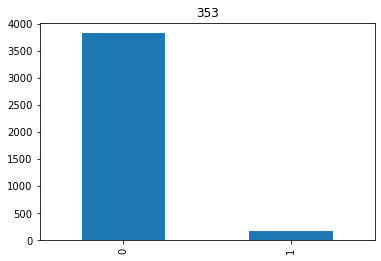

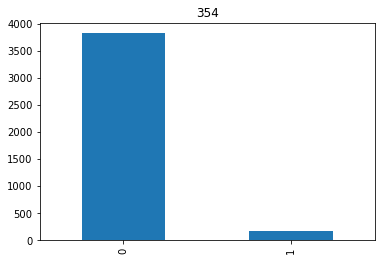

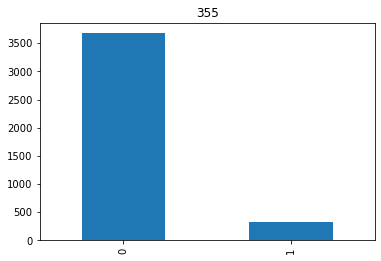

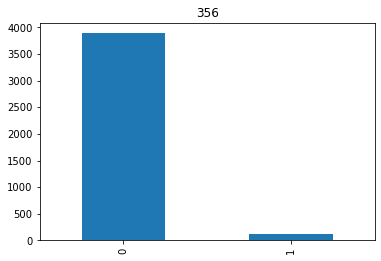

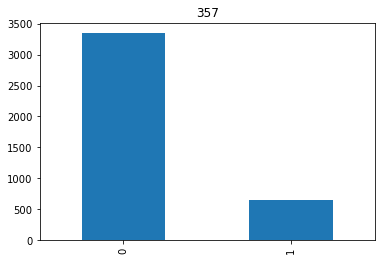

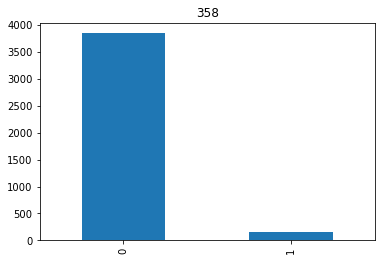

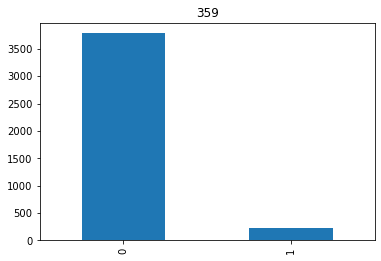

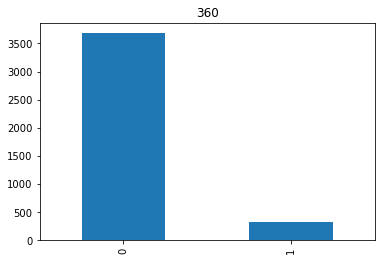

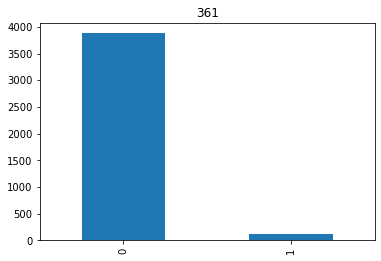

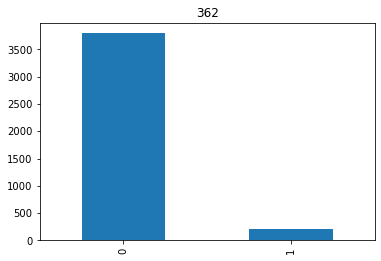

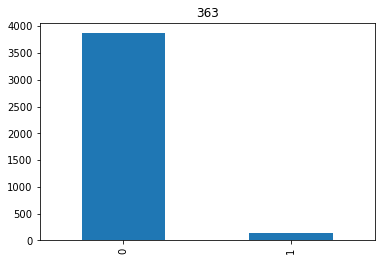

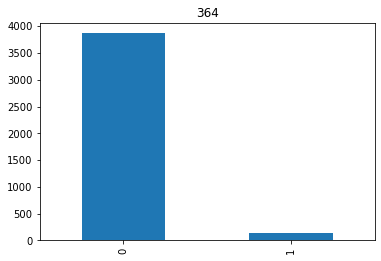

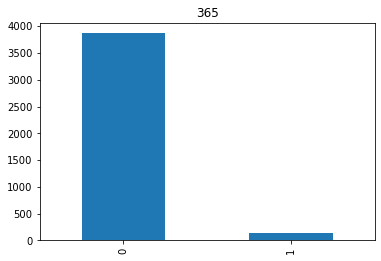

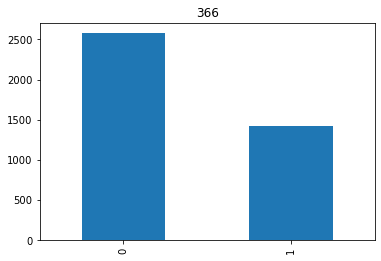

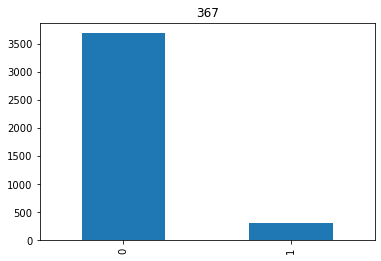

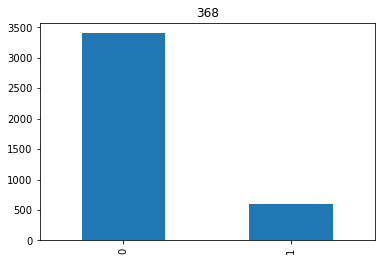

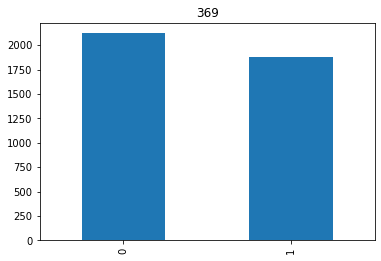

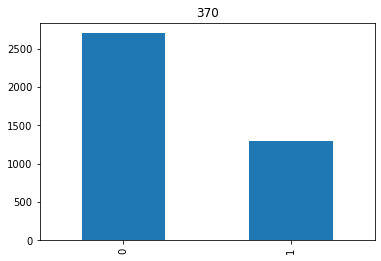

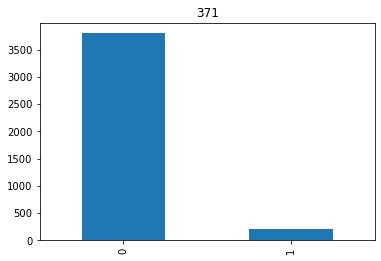

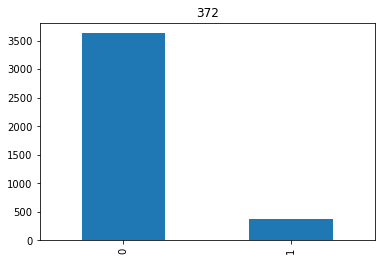

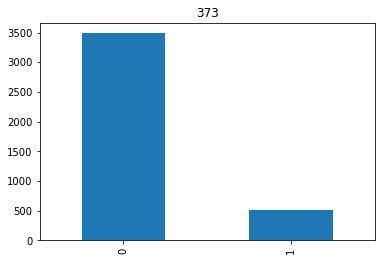

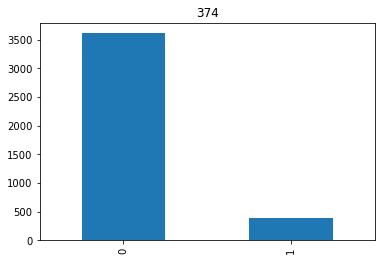

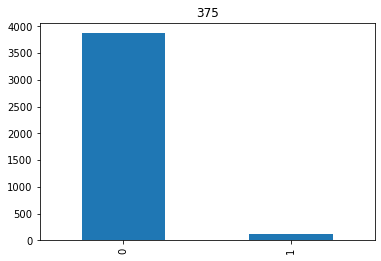

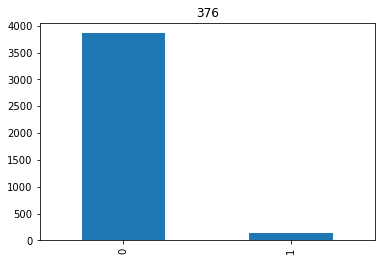

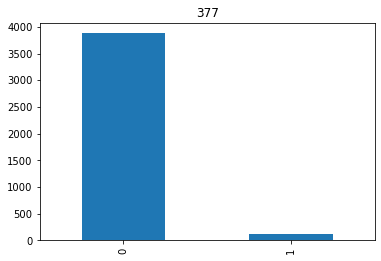

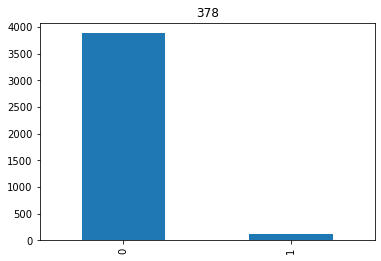

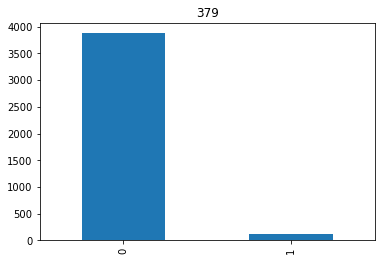

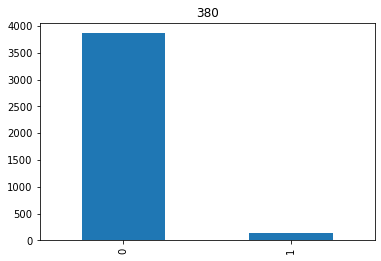

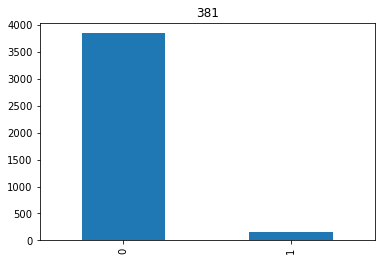

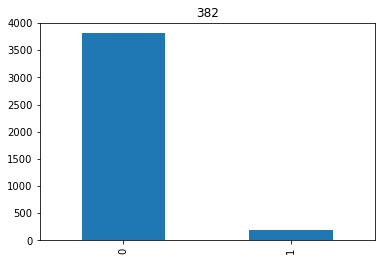

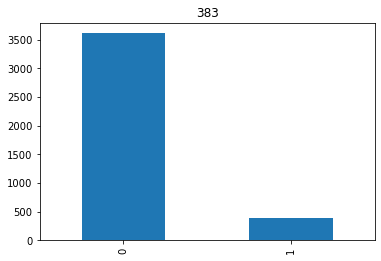

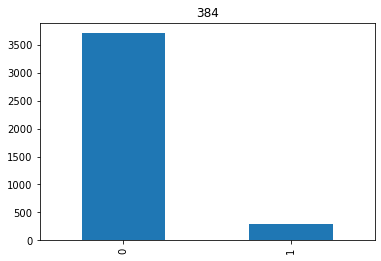

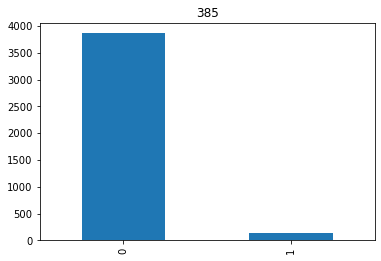

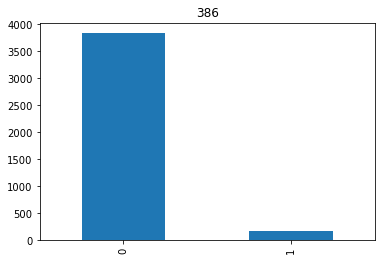

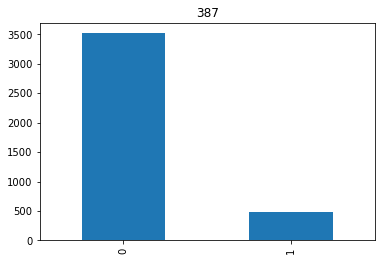

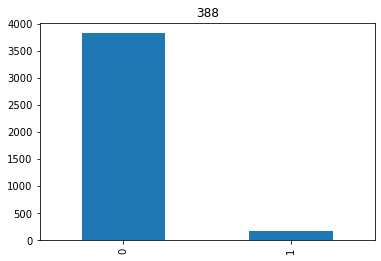

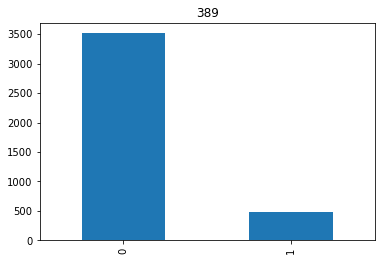

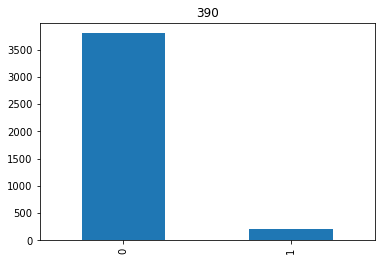

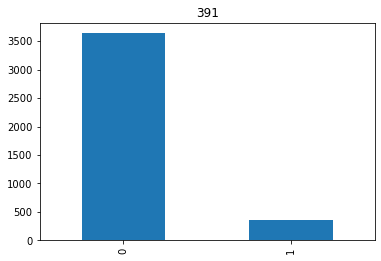

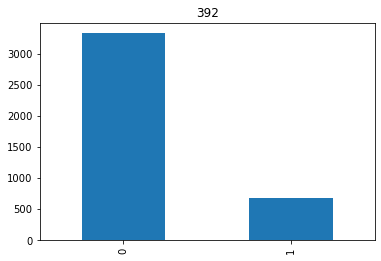

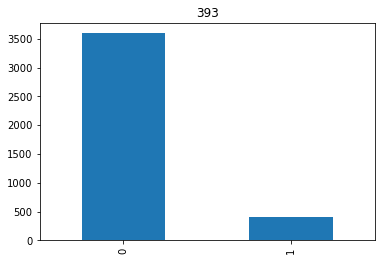

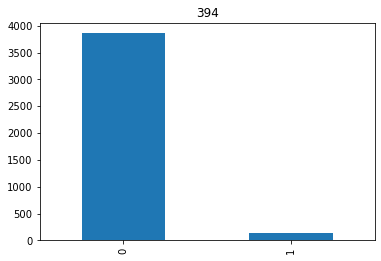

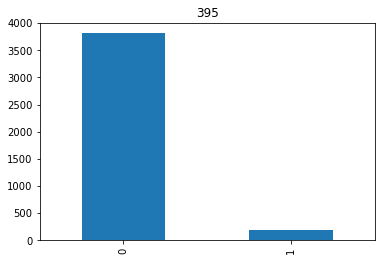

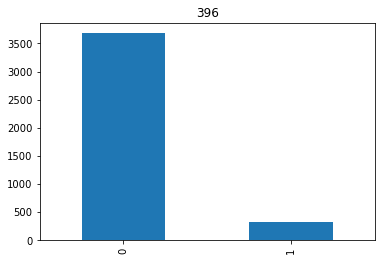

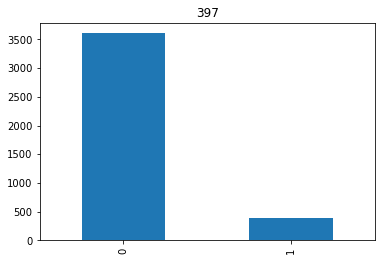

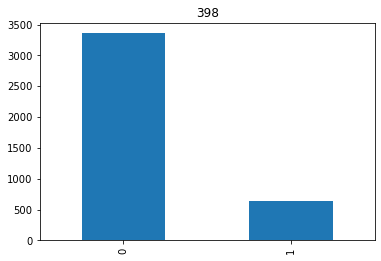

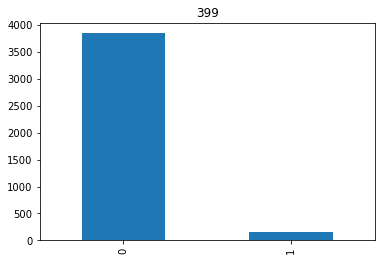

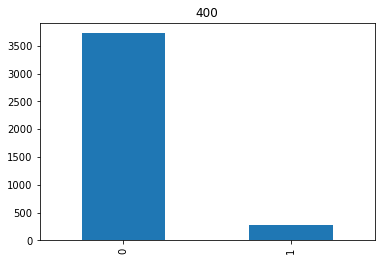

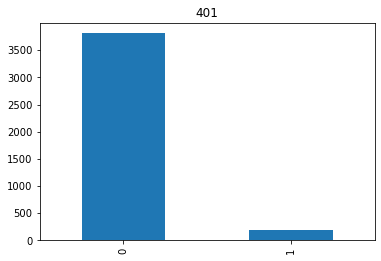

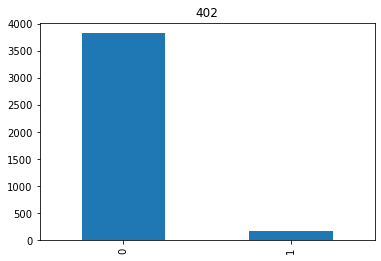

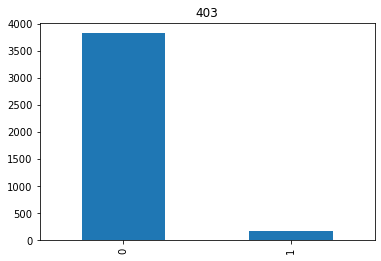

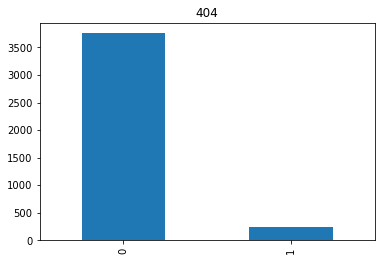

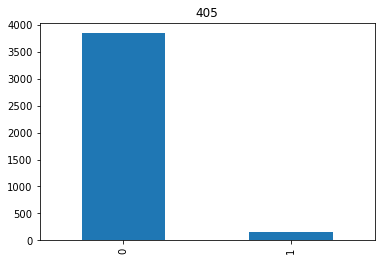

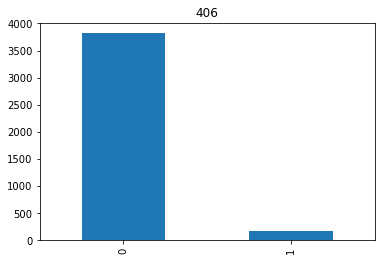

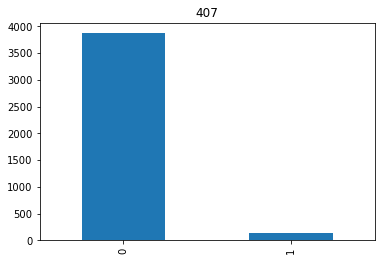

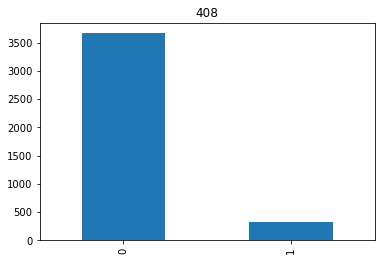

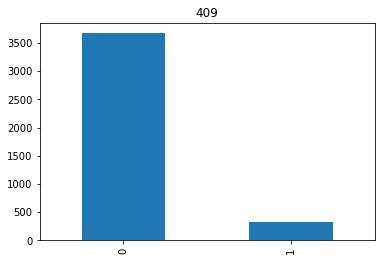

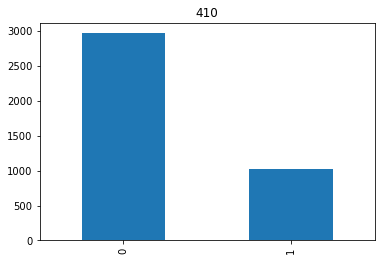

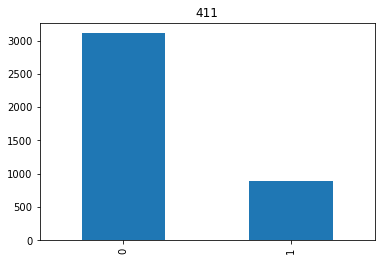

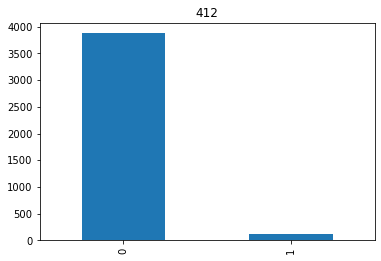

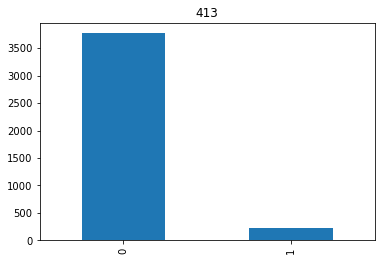

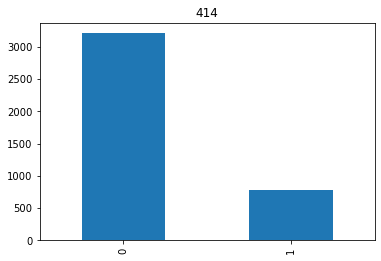

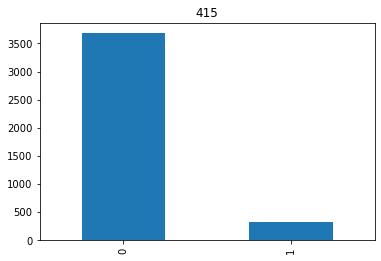

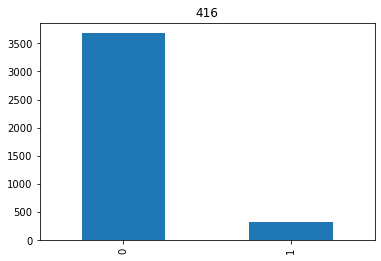

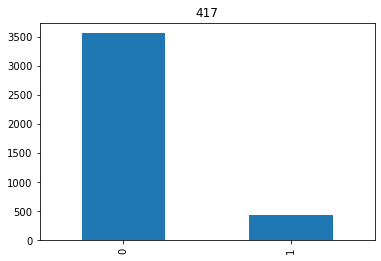

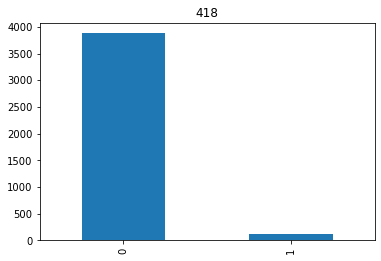

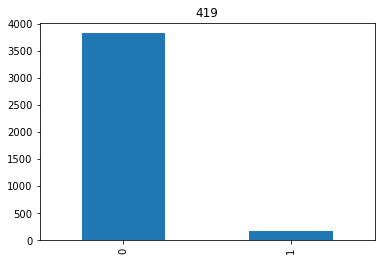

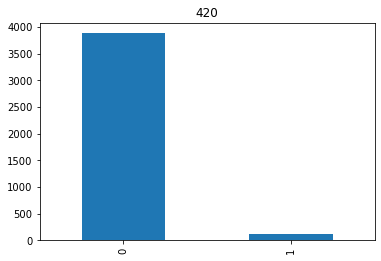

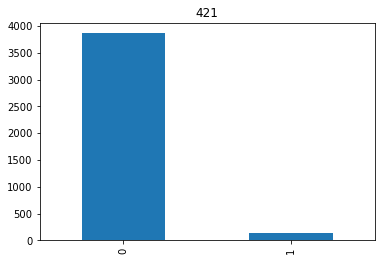

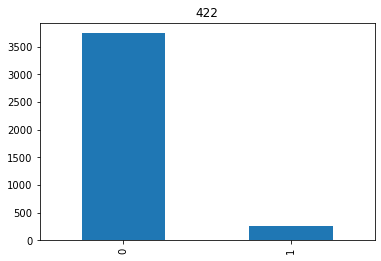

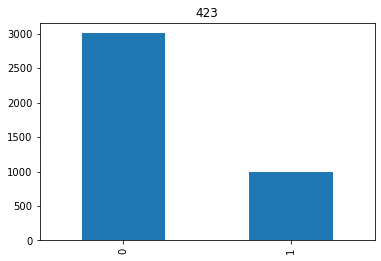

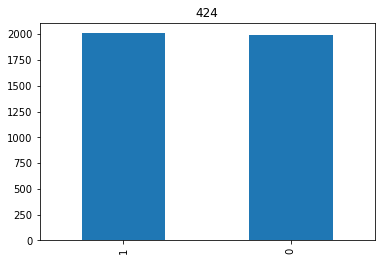

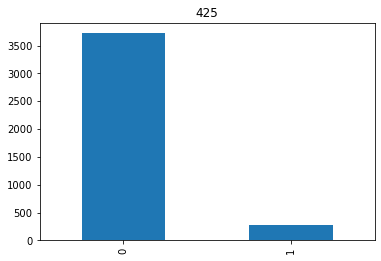

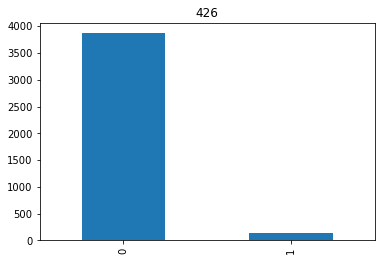

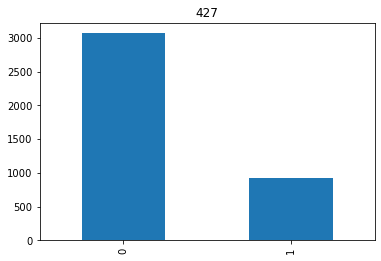

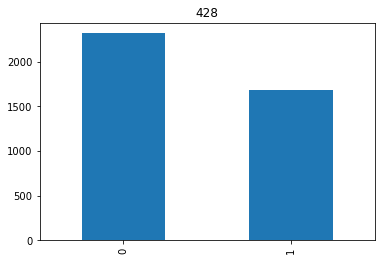

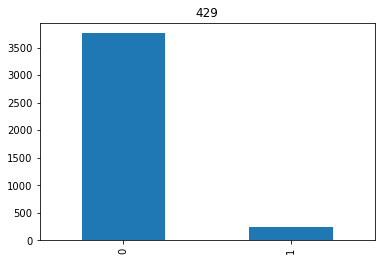

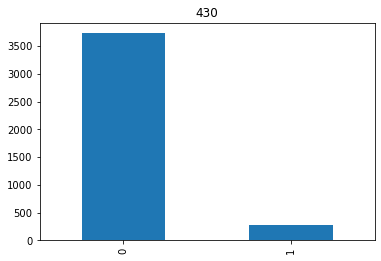

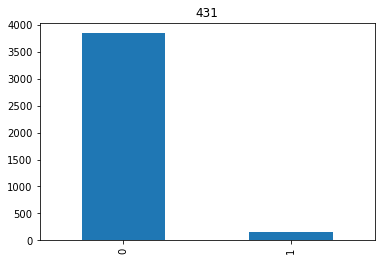

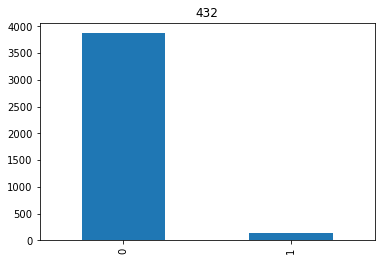

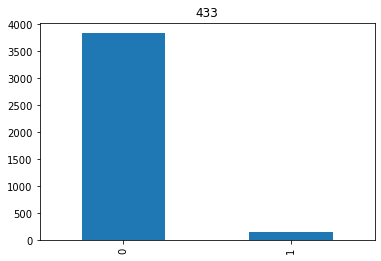

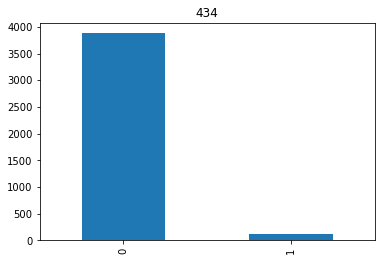

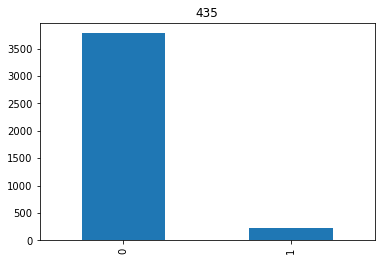

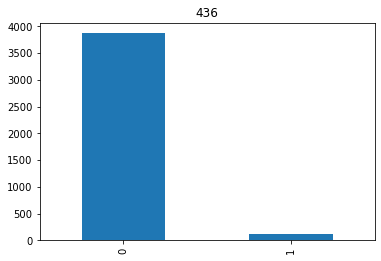

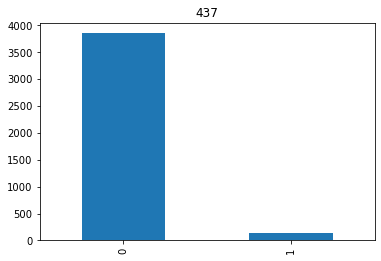

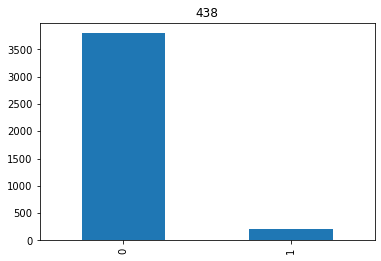

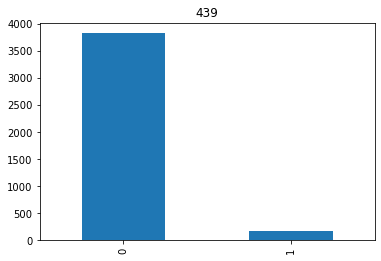

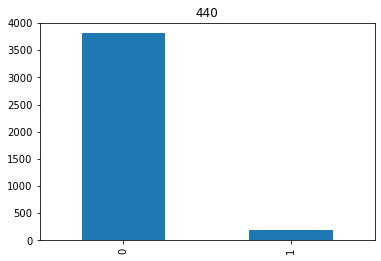

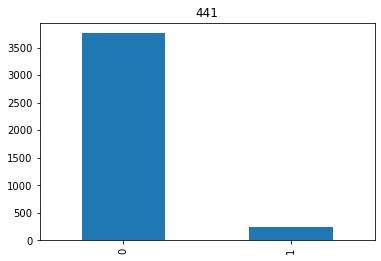

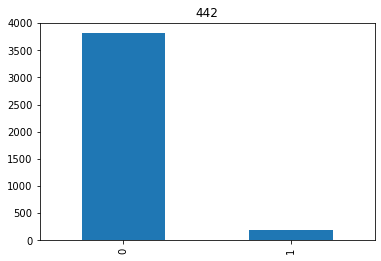

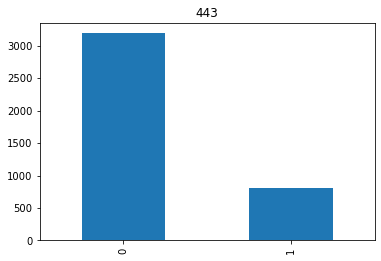

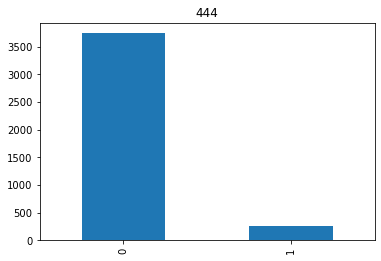

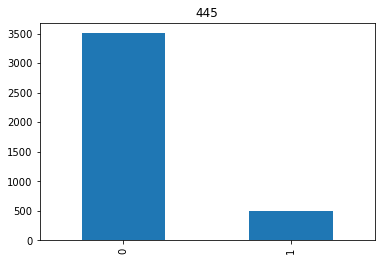

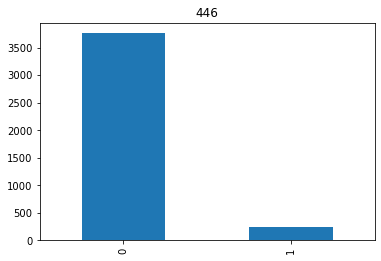

In [ ]:
for col in locationTrain.columns:
    locationTrain[col].value_counts().plot(kind="bar",title=col)
    plt.show()

In [ ]:
X= locationTrain.iloc[:,1:]
y=locationTrain["class"]
X_train,y_train,X_test,y_test,X_holdout,y_holdout = split_data(X,y)

### KNN

In [ ]:
start_time = time.time()
knn1 = KNeighborsClassifier(n_neighbors=5, metric="hamming")
knn1.fit(X_train,y_train)
pred1 = knn1.predict(X_test)
print("--- runtime ---" , (time.time() - start_time))

cv_holdout(knn1,X_holdout,y_holdout)
eval_metrics(y_test,pred1,type="multi")


--- runtime --- 3.2090232372283936
Cross validated scores: [0.23333333 0.23333333 0.23333333 0.28333333 0.28333333]
confusion matrix: [[15  0  0  0  1  0  0  5  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  1
   0  0  0  0  0  0]
 [ 0 20  0  0  0  1  0  0  0  0  0  0  1  1  0  0  0  0  1  0  0  0  0  0
   0  0  0  0  0  0]
 [ 0  1 18  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  1  0  0  0  0  0
   0  0  0  0  1  0]
 [ 0  0  1 20  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0
   0  0  0  0  1  0]
 [ 1  0  0  3  7  0  0  2  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  1  0]
 [ 6  3  0  0  1  5  0  4  0  3  0  1  1  0  1  0  0  0  1  0  0  0  0  0
   0  0  0  0  0  0]
 [ 0  0  0  1  1  0  7  3  0  1  0  1  0  1  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0]
 [ 3  0  3  1  0  2  1 32  0  1  0  0  0  0  0  0  0  0  0  0  1  0  0  0
   0  0  0  0  0  0]
 [ 0  0  0  1  0  1  0  2  1  3  1  3  1  1  2  0  0  1  0  1  1  0  0  1
   0  0  0  0  0  0]
 [ 7  1  1 

In [ ]:
start_time = time.time()
knn2 = KNeighborsClassifier(n_neighbors=10, metric="hamming")
knn2.fit(X_train,y_train)
pred2 = knn2.predict(X_test)
print("--- runtime ---" , (time.time() - start_time))

cv_holdout(knn2,X_holdout,y_holdout)
eval_metrics(y_test,pred2,type="multi")


--- runtime --- 3.735985040664673
Cross validated scores: [0.21666667 0.25       0.28333333 0.38333333 0.23333333]
confusion matrix: [[19  0  0  0  0  0  0  3  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0]
 [ 0 21  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  1  0  0  0  0  0
   0  1  0  0  0  0]
 [ 0  1 19  0  0  0  0  0  0  0  1  1  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0]
 [ 0  0  0 23  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0
   0  0  0  0  0  0]
 [ 0  0  0  7  3  0  0  3  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  1  0]
 [ 4  3  0  1  0  5  0  5  0  4  0  0  1  1  1  0  0  0  1  0  0  0  0  0
   0  0  0  0  0  0]
 [ 1  0  0  0  0  1 11  2  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0]
 [ 2  1  2  0  0  1  0 37  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0]
 [ 0  0  0  1  0  1  1  2  1  1  0  1  1  0  2  0  0  0  0  0  5  1  0  1
   0  0  0  0  1  1]
 [ 6  1  1  

C:\Users\Lini\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
start_time = time.time()
knn3 = KNeighborsClassifier(n_neighbors=30, metric="hamming")
knn3.fit(X_train,y_train)
pred3 = knn3.predict(X_test)
print("--- runtime ---" , (time.time() - start_time))

cv_holdout(knn3,X_holdout,y_holdout)
eval_metrics(y_test,pred3,type="multi")

--- runtime --- 3.7859904766082764
Cross validated scores: [0.28333333 0.21666667 0.26666667 0.28333333 0.33333333]
confusion matrix: [[18  0  0  0  0  0  0  5  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0]
 [ 0 20  0  0  0  0  0  0  0  0  1  0  2  0  0  0  0  0  1  0  0  0  0  0
   0  0  0  0  0  0]
 [ 0  0 18  0  0  0  0  1  0  0  1  1  0  0  0  0  0  0  1  0  0  0  0  0
   0  0  0  0  0  0]
 [ 0  0  0 21  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0
   0  0  0  0  2  0]
 [ 1  0  0  8  3  0  0  2  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0]
 [ 4  3  0  1  0  4  0  9  0  2  0  0  1  1  0  0  0  0  1  0  0  0  0  0
   0  0  0  0  0  0]
 [ 1  0  0  0  0  0 12  0  0  0  0  1  0  1  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0]
 [ 3  1  2  0  0  0  0 37  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1
   0  0  0  0  0  0]
 [ 0  0  0  0  0  0  1  1  1  4  0  1  0  0  1  0  0  0  0  1  4  1  2  1
   0  0  0  1  0  1]
 [ 5  1  1 

### Decision Tree

In [ ]:
start_time = time.time()
dtree = DecisionTreeClassifier()
dtree = dtree.fit(X_train,y_train)
prediction = dtree.predict(X_test) 
print("--- runtime ---" , (time.time() - start_time))

cv_holdout(dtree,X_holdout,y_holdout)
eval_metrics(y_test,prediction,type="multi")

--- runtime --- 0.4089994430541992
Cross validated scores: [0.11666667 0.16666667 0.18333333 0.15       0.16666667]
confusion matrix: [[ 9  0  0  0  0  1  0  0  0  3  0  2  0  0  1  1  3  0  0  0  0  0  0  1
   0  0  0  1  0  1]
 [ 0 13  1  0  0  1  0  0  0  0  1  0  2  0  0  0  1  0  1  0  0  0  0  0
   0  1  2  0  0  1]
 [ 0  1  7  0  0  1  0  2  0  1  1  1  0  0  2  0  0  0  0  1  0  1  0  0
   1  0  0  0  1  2]
 [ 0  0  0 12  4  1  0  0  0  0  0  0  1  0  1  0  0  2  0  0  0  1  1  0
   0  0  0  0  1  0]
 [ 0  0  0  1  2  0  0  3  0  0  0  0  0  0  1  0  0  4  0  1  0  0  0  1
   0  0  0  0  1  0]
 [ 2  2  1  1  1  3  0  1  0  5  0  0  0  0  0  0  3  0  1  0  1  0  0  0
   0  1  0  2  1  1]
 [ 2  0  0  0  0  0  5  2  0  0  0  2  0  0  1  0  0  0  0  0  0  1  0  1
   0  0  1  0  0  0]
 [ 1  1  0  0  0  4  0 22  0  3  1  2  0  0  3  1  0  0  2  0  0  1  1  1
   0  0  1  0  0  0]
 [ 0  0  0  1  0  0  0  0  3  2  1  2  0  0  1  0  0  0  1  2  1  0  1  1
   2  1  1  0  0  0]
 [ 2  0  1 

### Random forest

In [ ]:
start_time = time.time()
clf = RandomForestClassifier(n_estimators=100,random_state=0,criterion="gini",min_samples_split=5,min_samples_leaf=3)
clf.fit(X_train,y_train)
rf_prediction = clf.predict(X_test)
print("--- runtime ---" , (time.time() - start_time))

cv_holdout(clf,X_holdout,y_holdout)
eval_metrics(y_test,rf_prediction,type="multi")

--- runtime --- 2.199991226196289
Cross validated scores: [0.31666667 0.36666667 0.38333333 0.35       0.4       ]
confusion matrix: [[18  0  0  0  0  0  1  4  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0]
 [ 0 24  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0]
 [ 0  1 17  0  0  0  0  1  0  0  1  1  0  0  0  0  0  0  1  0  0  0  0  0
   0  0  0  0  0  0]
 [ 0  0  0 23  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0
   0  0  0  0  0  0]
 [ 0  0  0  1 10  1  0  0  0  0  0  0  0  0  0  0  0  2  0  0  0  0  0  0
   0  0  0  0  0  0]
 [ 2  3  0  1  0 11  0  3  0  0  1  2  0  0  1  0  0  1  1  0  0  0  0  0
   0  0  0  0  0  0]
 [ 1  0  0  0  0  0  7  2  0  0  1  3  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  1  0  0]
 [ 1  1  0  0  0  1  0 39  0  0  0  0  0  0  0  0  1  0  1  0  0  0  0  0
   0  0  0  0  0  0]
 [ 0  0  0  0  0  0  1  1  4  0  0  2  0  0  1  0  1  1  0  4  0  1  2  0
   0  0  1  1  0  0]
 [ 3  1  1  

Try balancing classes:

class_weight=balanced:  classes are automatically weighted inversely proportional to how frequently they appear in the data

In [ ]:
start_time = time.time()
clf = RandomForestClassifier(n_estimators=100,random_state=0,criterion="gini",min_samples_split=5,class_weight="balanced")
clf.fit(X_train,y_train)
rf_prediction = clf.predict(X_test)
print("--- runtime ---" , (time.time() - start_time))

cv_holdout(clf,X_holdout,y_holdout)
eval_metrics(y_test,rf_prediction,type="multi")

--- runtime --- 2.0901448726654053
Cross validated scores: [0.41666667 0.4        0.36666667 0.31666667 0.41666667]
confusion matrix: [[20  0  0  0  1  0  1  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0]
 [ 0 22  0  0  0  0  0  0  0  0  0  0  2  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0]
 [ 0  1 18  0  0  0  0  0  0  0  1  1  0  0  0  0  0  0  1  0  0  0  0  0
   0  0  0  0  0  0]
 [ 0  0  0 22  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  1  0
   0  0  0  0  0  0]
 [ 0  0  0  2 10  0  0  0  0  0  0  0  0  0  0  0  0  2  0  0  0  0  0  0
   0  0  0  0  0  0]
 [ 2  3  1  1  0 14  0  1  1  0  0  1  0  1  0  0  0  0  1  0  0  0  0  0
   0  0  0  0  0  0]
 [ 0  0  0  0  0  0 10  2  0  0  1  1  0  0  0  0  0  0  0  0  0  0  0  1
   0  0  0  0  0  0]
 [ 2  1  1  0  1  0  0 33  0  0  0  1  1  0  0  0  2  0  1  0  0  0  0  0
   0  0  0  1  0  0]
 [ 0  1  0  0  0  0  0  0  5  0  1  1  1  1  0  0  1  1  0  1  2  0  1  2
   0  0  1  1  0  0]
 [ 5  1  1 

In [ ]:
start_time = time.time()
clf = RandomForestClassifier(n_estimators=100,random_state=0,criterion="entropy",min_samples_split=10)
clf.fit(X_train,y_train)
rf_prediction = clf.predict(X_test)
print("--- runtime ---" , (time.time() - start_time))

cv_holdout(clf,X_holdout,y_holdout)
eval_metrics(y_test,rf_prediction,type="multi")

--- runtime --- 3.1650044918060303
Cross validated scores: [0.28333333 0.28333333 0.35       0.31666667 0.28333333]
confusion matrix: [[20  0  0  0  0  0  0  1  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0
   1  0  0  0  0  0]
 [ 0 23  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0]
 [ 0  0 17  0  0  0  0  1  0  0  1  1  0  0  1  0  0  0  1  0  0  0  0  0
   0  0  0  0  0  0]
 [ 0  0  0 23  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0
   0  0  0  0  0  0]
 [ 0  0  0  2 11  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0
   0  0  0  0  0  0]
 [ 2  3  0  1  0  4  0  9  0  0  1  2  0  0  1  0  0  0  2  1  0  0  0  0
   0  0  0  0  0  0]
 [ 2  0  0  0  0  1  4  3  0  0  0  2  0  0  0  0  0  0  0  0  0  0  1  1
   0  0  0  0  0  1]
 [ 1  1  0  0  0  0  0 41  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1
   0  0  0  0  0  0]
 [ 0  0  0  0  0  0  1  1  4  0  0  2  0  0  1  0  3  1  0  2  1  0  1  1
   0  0  0  1  0  1]
 [ 3  1  1 

Since there are so many column, let's try feature selection according to the most important ones in the random forest.

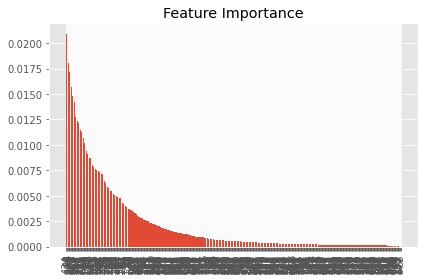

In [ ]:
importances = clf.feature_importances_
sorted_indices = np.argsort(importances)[::-1]

plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]), importances[sorted_indices], align='center')
plt.xticks(range(X_train.shape[1]), X_train.columns[sorted_indices], rotation=90)
plt.tight_layout()
plt.show()

Let's use only the top :

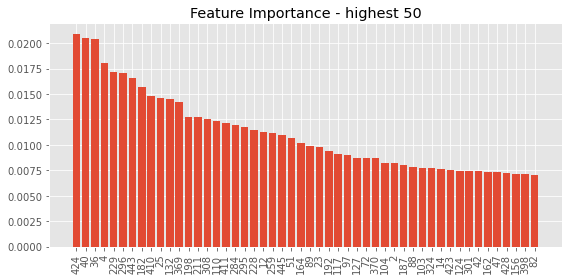

In [ ]:
# limit to only 50 most important ones
sorted_indices_50 = sorted_indices[:50]

plt.figure(figsize=(8,4))
plt.title('Feature Importance - highest 50')
plt.bar(range(50), importances[sorted_indices_50], align='center')
plt.xticks(range(50), X_train.columns[sorted_indices_50], rotation=90)
plt.tight_layout()
plt.show()

In [ ]:
X_train_50 = X_train[X_train.columns[sorted_indices_50]]
X_test_50 = X_test[X_train.columns[sorted_indices_50]]
X_hold_50 = X_holdout[X_train.columns[sorted_indices_50]]

In [ ]:
start_time = time.time()
clf = RandomForestClassifier(n_estimators=50,random_state=0,criterion="gini",min_samples_split=10,min_samples_leaf=3)
clf.fit(X_train_50,y_train)
rf_prediction = clf.predict(X_test_50)
print("--- runtime ---" , (time.time() - start_time))

cv_holdout(clf,X_hold_50,y_holdout)
eval_metrics(y_test,rf_prediction,type="multi")

--- runtime --- 0.4070017337799072
Cross validated scores: [0.31666667 0.3        0.36666667 0.23333333 0.3       ]
confusion matrix: [[17  0  0  1  0  0  0  3  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1
   0  0  0  1  0  0]
 [ 0 14  0  0  0  1  0  1  0  0  2  3  1  0  0  0  0  0  1  0  0  0  0  0
   0  0  1  0  0  0]
 [ 0  1 13  0  0  0  0  3  0  0  0  1  0  0  1  0  0  0  2  0  0  0  0  0
   0  0  0  0  1  0]
 [ 0  0  0 22  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0
   0  0  0  0  1  0]
 [ 0  0  0  2 11  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0
   0  0  0  0  0  0]
 [ 3  2  0  1  0  5  0  6  0  1  1  2  0  0  1  0  1  0  2  0  1  0  0  0
   0  0  0  0  0  0]
 [ 2  0  0  0  0  1  2  2  0  0  0  5  0  0  1  0  0  0  0  0  0  0  0  1
   0  0  0  1  0  0]
 [ 1  1  0  0  1  2  0 35  0  1  0  1  0  0  0  0  0  0  0  0  0  0  0  2
   0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  1  2  3  0  2  2  0  0  0  2  1  0  2  0  1  0  1
   0  0  0  3  0  0]
 [ 2  1  0 

Apparently feature selection does not help, since the results are even a bit worse.

### For kaggle

In [ ]:
clf = RandomForestClassifier(n_estimators=50,random_state=0,criterion="gini",min_samples_split=5,class_weight="balanced")
clf.fit(X,y)
rf_prediction = clf.predict(locationTest)

# predict
result = pd.DataFrame(rf_prediction,index= locationTest.index)

result.columns = ["class"]
print(result)
result.to_csv("location_test_result_RF2.csv")

      class
ID         
4000      4
4001     20
4002      6
4003     19
4004      2
...     ...
5004     11
5005     20
5006     10
5007     20
5008      4

[1009 rows x 1 columns]


In [ ]:
# model on all data
clf = RandomForestClassifier(n_estimators=100,random_state=0,criterion="entropy",min_samples_split=10)
clf.fit(X,y)
rf_prediction = clf.predict(locationTest)

# predict
result = pd.DataFrame(rf_prediction,index= locationTest.index)

result.columns = ["class"]
print(result)
result.to_csv("location_test_result_RF.csv")

      class
ID         
4000      4
4001     20
4002     15
4003     21
4004     19
...     ...
5004      8
5005     20
5006     10
5007     20
5008      4

[1009 rows x 1 columns]


Another test would be to remove highly correlated results. So let's exclude all features that have a correlation higher than 0.7 / -0.7.

In [ ]:
cors = locationTrain.corr()

def corrFilter(bound: float):
    xFiltered = cors[((cors >= bound) | (cors <= -bound)) & (cors !=1.000)]
    xFlattened = xFiltered.unstack().sort_values().drop_duplicates()
    return xFlattened

corrFilter(0.7)

58     404      0.735315
34     199      0.831994
4      132      0.856980
25     411      0.871586
65     154      0.947946
15     331      0.965611
116    176      0.982810
class  class         NaN
dtype: float64

In [ ]:
locationTrain_dr = locationTrain.drop(locationTrain.columns[[404,199,132,411,154,331,176]], axis=1)

In [ ]:
X= locationTrain_dr.iloc[:,1:]
y=locationTrain_dr["class"]
X_train,y_train,X_test,y_test,X_holdout,y_holdout = split_data(X,y)

In [ ]:
start_time = time.time()
clf = RandomForestClassifier(n_estimators=100,random_state=0,criterion="gini",min_samples_split=5,min_samples_leaf=3)
clf.fit(X_train,y_train)
rf_prediction = clf.predict(X_test)
print("--- runtime ---" , (time.time() - start_time))

cv_holdout(clf,X_holdout,y_holdout)
eval_metrics(y_test,rf_prediction,type="multi")

--- runtime --- 2.480994701385498
Cross validated scores: [0.33333333 0.33333333 0.4        0.36666667 0.4       ]
confusion matrix: [[20  0  0  0  0  0  1  2  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0]
 [ 0 24  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0]
 [ 0  1 16  0  0  0  0  2  0  0  1  1  0  0  0  0  0  0  1  0  0  0  0  0
   0  0  0  0  0  0]
 [ 0  0  0 23  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0
   0  0  0  0  0  0]
 [ 1  0  0  3  8  0  0  1  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0
   0  0  0  0  0  0]
 [ 2  3  0  1  0  6  0  7  0  1  2  2  0  0  1  0  0  0  1  0  0  0  0  0
   0  0  0  0  0  0]
 [ 1  0  0  0  0  0  6  2  0  0  1  3  0  0  0  0  0  0  0  0  0  0  0  2
   0  0  0  0  0  0]
 [ 0  1  0  0  0  0  0 42  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0]
 [ 0  0  0  0  0  0  1  0  6  0  0  1  1  0  1  0  0  1  0  3  0  0  3  3
   0  0  0  0  0  0]
 [ 4  1  1  

Unfortunately that also doesn't change anything.

## Census income data

(from ex0)

In [9]:
income = pd.read_csv("adult.data",index_col=False, names = ["age","workclass","fnlwgt","education","education_num","marital_status","occupation","relationship","race","sex","capital_gain","capital_loss","hours_per_week","native_country","income"])
#income = pd.read_csv("https://raw.githubusercontent.com/EmilDaub/Machine-Learning/main/Exercise1/adult.data",index_col=False, names = ["age","workclass","fnlwgt","education","education_num","marital_status","occupation","relationship","race","sex","capital_gain","capital_loss","hours_per_week","native_country","income"])
income.head()

age          workclass  fnlwgt   education  education_num  \
0   39          State-gov   77516   Bachelors             13   
1   50   Self-emp-not-inc   83311   Bachelors             13   
2   38            Private  215646     HS-grad              9   
3   53            Private  234721        11th              7   
4   28            Private  338409   Bachelors             13   

        marital_status          occupation    relationship    race      sex  \
0        Never-married        Adm-clerical   Not-in-family   White     Male   
1   Married-civ-spouse     Exec-managerial         Husband   White     Male   
2             Divorced   Handlers-cleaners   Not-in-family   White     Male   
3   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
4   Married-civ-spouse      Prof-specialty            Wife   Black   Female   

   capital_gain  capital_loss  hours_per_week  native_country  income  
0          2174             0              40   United-States   <=50K  
1             0             0              13   United-States   <=50K  
2             0             0              40   United-States   <=50K  
3             0             0              40   United-States   <=50K  
4             0             0              40            Cuba   <=50K

In [ ]:
income.shape

(32561, 15)

In [ ]:
income.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income'],
      dtype='object')

In [ ]:
income.describe()

age        fnlwgt  education_num  capital_gain  capital_loss  \
count  32561.000000  3.256100e+04   32561.000000  32561.000000  32561.000000   
mean      38.581647  1.897784e+05      10.080679   1077.648844     87.303830   
std       13.640433  1.055500e+05       2.572720   7385.292085    402.960219   
min       17.000000  1.228500e+04       1.000000      0.000000      0.000000   
25%       28.000000  1.178270e+05       9.000000      0.000000      0.000000   
50%       37.000000  1.783560e+05      10.000000      0.000000      0.000000   
75%       48.000000  2.370510e+05      12.000000      0.000000      0.000000   
max       90.000000  1.484705e+06      16.000000  99999.000000   4356.000000   

       hours_per_week  
count    32561.000000  
mean        40.437456  
std         12.347429  
min          1.000000  
25%         40.000000  
50%         40.000000  
75%         45.000000  
max         99.000000

<AxesSubplot:>

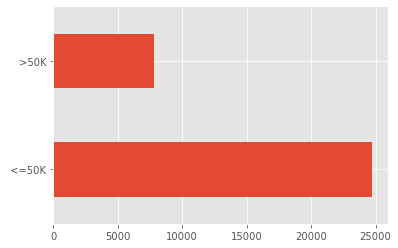

In [ ]:
income["income"].value_counts().plot(kind="barh")

In [ ]:
income.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

In [ ]:
for c in income[["workclass","marital_status","occupation","relationship","race","sex","native_country","income"]]:
    
    print( "---- %s ---" % c)
    print(income[c].value_counts(), "\n\n")

---- workclass ---
 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64 


---- marital_status ---
 Married-civ-spouse       14976
 Never-married            10683
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: marital_status, dtype: int64 


---- occupation ---
 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3770
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces        

In [ ]:
(income == " ?").sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education_num        0
marital_status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital_gain         0
capital_loss         0
hours_per_week       0
native_country     583
income               0
dtype: int64

In [10]:
income.workclass[income.workclass == " ?"] = "unknown"
income.occupation[income.occupation == " ?"] = "unknown"
income.native_country[income.native_country == " ?"] = "unknown"

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid 

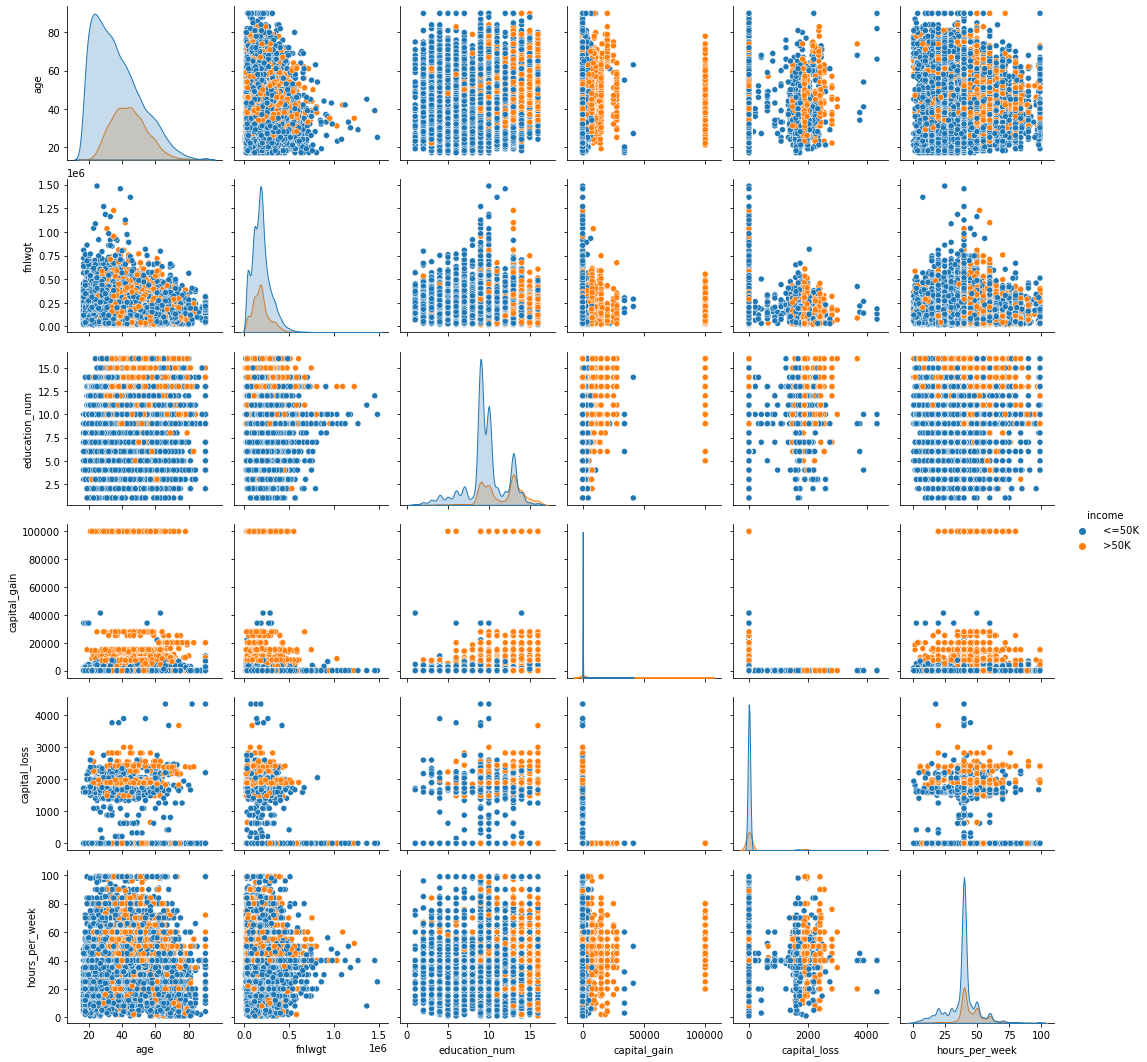

In [ ]:
pairplot(income,hue="income")
plt.show()

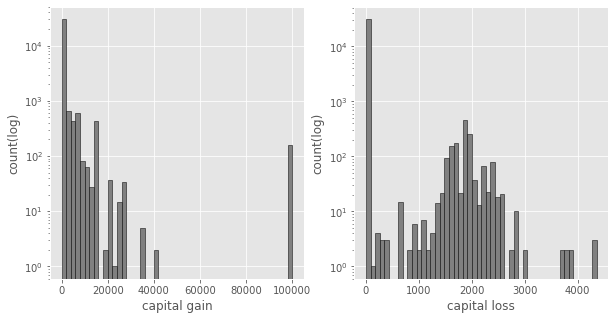

In [ ]:
plt.figure(figsize=(10,5))

plt.subplot(1, 2, 1) # row 1, col 2 index 1
income.capital_gain.hist(bins=50,color = "grey", edgecolor = "black")
plt.yscale('log')
plt.xlabel('capital gain')
plt.ylabel('count(log)')

plt.subplot(1, 2, 2) # row 1, col 2 index 2
income.capital_loss.hist(bins=50,color = "grey", edgecolor = "black")
plt.yscale('log')
plt.xlabel('capital loss')
plt.ylabel('count(log)')

plt.show()



In [11]:
# dummy encoding
income_dummy = pd.get_dummies(income, columns= ["workclass","education","marital_status","occupation","relationship","race","sex","native_country","income"],
drop_first=True)
income_dummy.drop("education_num",axis=1,inplace=True) # not needed anymore

C:\Users\Lini\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


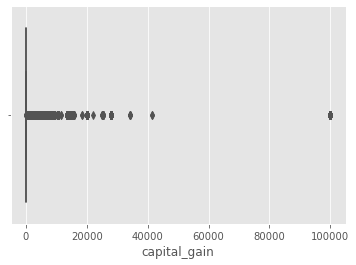

C:\Users\Lini\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


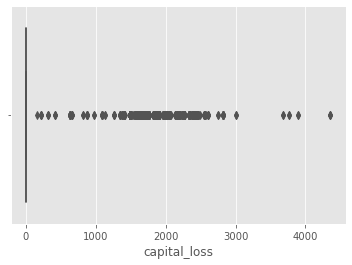

In [ ]:
sns.boxplot(income_dummy["capital_gain"])
plt.show()

sns.boxplot(income_dummy["capital_loss"])
plt.show()


There are obviously some values that hugely differ from the rest. So either the values at 99999 are encoded as missing values or they are outliers. But probably missing values since they are exactly the same.

In [ ]:
# count these high values
(income_dummy.capital_gain == 99999).sum()

159

In [12]:
# first set the values to missing
income_dummy.loc[income_dummy.capital_gain == 99999, "capital_gain"] = np.nan

In [ ]:
income_dummy.isna().sum().sum()

159

In [ ]:
income_dummy.head()

age  fnlwgt  capital_gain  capital_loss  hours_per_week  \
0   39   77516        2174.0             0              40   
1   50   83311           0.0             0              13   
2   38  215646           0.0             0              40   
3   53  234721           0.0             0              40   
4   28  338409           0.0             0              40   

   workclass_ Local-gov  workclass_ Never-worked  workclass_ Private  \
0                     0                        0                   0   
1                     0                        0                   0   
2                     0                        0                   1   
3                     0                        0                   1   
4                     0                        0                   1   

   workclass_ Self-emp-inc  workclass_ Self-emp-not-inc  ...  \
0                        0                            0  ...   
1                        0                            1  ...   
2                        0                            0  ...   
3                        0                            0  ...   
4                        0                            0  ...   

   native_country_ Scotland  native_country_ South  native_country_ Taiwan  \
0                         0                      0                       0   
1                         0                      0                       0   
2                         0                      0                       0   
3                         0                      0                       0   
4                         0                      0                       0   

   native_country_ Thailand  native_country_ Trinadad&Tobago  \
0                         0                                0   
1                         0                                0   
2                         0                                0   
3                         0                                0   
4                         0                                0   

   native_country_ United-States  native_country_ Vietnam  \
0                              1                        0   
1                              1                        0   
2                              1                        0   
3                              1                        0   
4                              0                        0   

   native_country_ Yugoslavia  native_country_unknown  income_ >50K  
0                           0                       0             0  
1                           0                       0             0  
2                           0                       0             0  
3                           0                       0             0  
4                           0                       0             0  

[5 rows x 100 columns]

Split data into training and test set for modelling:

In [13]:
y = income_dummy['income_ >50K']
X = income_dummy.drop('income_ >50K', axis=1)

X_train,y_train,X_test,y_test,X_holdout,y_holdout = split_data(X,y)

Inputation on training and test set separately.

In [14]:
# then impute them by nearest neighbours

imputer = KNNImputer(n_neighbors=3)
X_train_imp = imputer.fit_transform(X_train)
X_train_imp = pd.DataFrame(X_train_imp,columns= X_train.columns)

imputer = KNNImputer(n_neighbors=3)
X_test_imp = imputer.fit_transform(X_test)
X_test_imp = pd.DataFrame(X_test_imp,columns= X_test.columns)

imputer = KNNImputer(n_neighbors=3)
X_hold_imp = imputer.fit_transform(X_holdout)
X_hold_imp = pd.DataFrame(X_hold_imp,columns= X_holdout.columns)

Text(0, 0.5, 'count(log)')

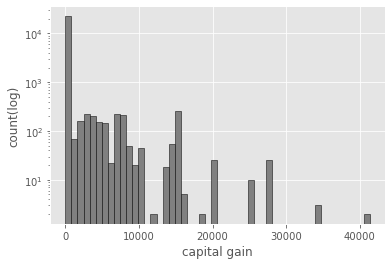

In [ ]:
X_train_imp.capital_gain.hist(bins=50,color = "grey", edgecolor = "black")
plt.yscale('log')
plt.xlabel('capital gain')
plt.ylabel('count(log)')

In [ ]:
y_train.value_counts()

0    18539
1     5881
Name: income_ >50K, dtype: int64

In [ ]:
y_test.value_counts()

0    4326
1    1372
Name: income_ >50K, dtype: int64

In [ ]:
y_holdout.value_counts()

0    1855
1     588
Name: income_ >50K, dtype: int64

### Decision Tree

In [ ]:
start_time = time.time()
clf = DecisionTreeClassifier(random_state=0) 
clf=clf.fit(X_train_imp,y_train) 
prediction = clf.predict(X_test_imp )
print("--- runtime ---" , (time.time() - start_time))

cv_holdout(clf,X_hold_imp,y_holdout)

eval_metrics(y_test, prediction)

--- runtime --- 0.9006679058074951
Cross validated scores: [0.80572597 0.80368098 0.79754601 0.78278689 0.80737705]
confusion matrix: [[3756  570]
 [ 521  851]]
accuracy: 0.8085293085293085
precision: 0.5988740323715693
recall: 0.6202623906705539
F1: 0.6093805943430003


In [ ]:
start_time = time.time()
clf = DecisionTreeClassifier(random_state=12,criterion="entropy",min_samples_leaf=5) 
clf=clf.fit(X_train_imp,y_train) 
prediction = clf.predict(X_test_imp )
print("--- runtime ---" , (time.time() - start_time))

cv_holdout(clf,X_hold_imp,y_holdout)

eval_metrics(y_test, prediction)


--- runtime --- 1.9058277606964111
Cross validated scores: [0.81799591 0.80572597 0.78323108 0.82172131 0.83606557]
confusion matrix: [[3898  428]
 [ 543  829]]
accuracy: 0.8295893295893296
precision: 0.6595067621320605
recall: 0.6042274052478134
F1: 0.6306580448839864


In [18]:
start_time = time.time()
clf = DecisionTreeClassifier(random_state=12,criterion="gini",min_samples_leaf=2,min_samples_split=5) 
clf=clf.fit(X_train_imp,y_train) 
prediction = clf.predict(X_test_imp )
print("--- runtime ---" , (time.time() - start_time))

cv_holdout(clf,X_hold_imp,y_holdout)

eval_metrics(y_test, prediction)

--- runtime --- 0.26465606689453125
Cross validated scores: [0.80368098 0.799591   0.78527607 0.80327869 0.80532787]
confusion matrix: [[3904  422]
 [ 566  806]]
accuracy: 0.8266058266058266
precision: 0.6563517915309446
recall: 0.5874635568513119
F1: 0.62


### Random forest

In [19]:
start_time = time.time()
clf = RandomForestClassifier(n_estimators=100,random_state=0)
clf.fit(X_train_imp,y_train)
rf_prediction = clf.predict(X_test_imp)
print("--- runtime ---" , (time.time() - start_time))

cv_holdout(clf,X_hold_imp,y_holdout)

eval_metrics(y_test, rf_prediction)


--- runtime --- 3.3105413913726807
Cross validated scores: [0.83640082 0.83435583 0.8609407  0.84221311 0.82581967]
confusion matrix: [[4012  314]
 [ 547  825]]
accuracy: 0.8488943488943489
precision: 0.7243195785776997
recall: 0.6013119533527697
F1: 0.6571087216248506


In [20]:
start_time = time.time()
clf = RandomForestClassifier(n_estimators=50,random_state=0,min_samples_leaf=5,criterion="entropy")
clf.fit(X_train_imp,y_train)
rf_prediction = clf.predict(X_test_imp)
print("--- runtime ---" , (time.time() - start_time))

cv_holdout(clf,X_hold_imp,y_holdout)

eval_metrics(y_test, rf_prediction)


--- runtime --- 1.2506835460662842
Cross validated scores: [0.83844581 0.84253579 0.85071575 0.84221311 0.82786885]
confusion matrix: [[4102  224]
 [ 594  778]]
accuracy: 0.8564408564408564
precision: 0.7764471057884231
recall: 0.5670553935860059
F1: 0.6554338668913228


### KNN

In [15]:
# scale data

column_transformer = make_column_transformer(
    (StandardScaler(), ['age', 'fnlwgt','capital_gain', 'capital_loss', 'hours_per_week']),
    remainder='passthrough')

X_train_sc = column_transformer.fit_transform(X_train_imp)
X_test_sc = column_transformer.fit_transform(X_test_imp)
X_hold_sc = column_transformer.fit_transform(X_hold_imp)

In [17]:
knn = KNeighborsClassifier(n_neighbors=10)

start_time = time.time()
knn.fit(X_train_sc,y_train)
knn_prediction= knn.predict(X_test_sc) 
print("--- runtime ---" , (time.time() - start_time))

cv_holdout(knn,X_hold_sc,y_holdout)

eval_metrics(y_test, knn_prediction)


--- runtime --- 4.649707078933716
Cross validated scores: [0.82413088 0.81390593 0.84458078 0.82377049 0.82377049]
confusion matrix: [[4023  303]
 [ 598  774]]
accuracy: 0.8418743418743418
precision: 0.7186629526462396
recall: 0.5641399416909622
F1: 0.6320947325438955


### NB

In [21]:
start_time = time.time()
nb = GaussianNB()
nb.fit(X_train_imp,y_train)
nb_pred = nb.predict(X_test_imp)
print("--- runtime ---" , (time.time() - start_time))

cv_holdout(nb,X_hold_imp,y_holdout)

eval_metrics(y_test, nb_pred)


--- runtime --- 0.05394864082336426
Cross validated scores: [0.77505112 0.77300613 0.799591   0.79918033 0.78278689]
confusion matrix: [[4092  234]
 [ 970  402]]
accuracy: 0.7886977886977887
precision: 0.6320754716981132
recall: 0.29300291545189505
F1: 0.40039840637450197


## Try the same using label encoding:

In [22]:
income_label = income.copy()
income_label.drop("education",axis=1,inplace=True) # not needed anymore

for col in ["workclass","marital_status","occupation","relationship","race","sex","native_country","income"]:
    le = LabelEncoder()
    le.fit(income_label[col])
    income_label[col] = le.transform(income_label[col])


income_label

age  workclass  fnlwgt  education_num  marital_status  occupation  \
0       39          6   77516             13               4           0   
1       50          5   83311             13               2           3   
2       38          3  215646              9               0           5   
3       53          3  234721              7               2           5   
4       28          3  338409             13               2           9   
...    ...        ...     ...            ...             ...         ...   
32556   27          3  257302             12               2          12   
32557   40          3  154374              9               2           6   
32558   58          3  151910              9               6           0   
32559   22          3  201490              9               4           0   
32560   52          4  287927              9               2           3   

       relationship  race  sex  capital_gain  capital_loss  hours_per_week  \
0                 1     4    1          2174             0              40   
1                 0     4    1             0             0              13   
2                 1     4    1             0             0              40   
3                 0     2    1             0             0              40   
4                 5     2    0             0             0              40   
...             ...   ...  ...           ...           ...             ...   
32556             5     4    0             0             0              38   
32557             0     4    1             0             0              40   
32558             4     4    0             0             0              40   
32559             3     4    1             0             0              20   
32560             5     4    0         15024             0              40   

       native_country  income  
0                  38       0  
1                  38       0  
2                  38       0  
3                  38       0  
4                   4       0  
...               ...     ...  
32556              38       0  
32557              38       1  
32558              38       0  
32559              38       0  
32560              38       1  

[32561 rows x 14 columns]

In [23]:
y = income_label['income']
X = income_label.drop('income', axis=1)

X_train,y_train,X_test,y_test,X_holdout,y_holdout = split_data(X,y)

In [24]:
imputer = KNNImputer(n_neighbors=3)
X_train_imp = imputer.fit_transform(X_train)
X_train_imp = pd.DataFrame(X_train_imp,columns= X_train.columns)

imputer = KNNImputer(n_neighbors=3)
X_test_imp = imputer.fit_transform(X_test)
X_test_imp = pd.DataFrame(X_test_imp,columns= X_test.columns)

imputer = KNNImputer(n_neighbors=3)
X_hold_imp = imputer.fit_transform(X_holdout)
X_hold_imp = pd.DataFrame(X_hold_imp,columns= X_holdout.columns)

In [25]:
start_time = time.time()
clf = DecisionTreeClassifier(random_state=0,criterion="entropy",max_features=5) 
clf=clf.fit(X_train_imp,y_train) 
prediction = clf.predict(X_test_imp )
print("--- runtime ---" , (time.time() - start_time))

cv_holdout(clf,X_hold_imp,y_holdout)

eval_metrics(y_test, prediction)


--- runtime --- 0.07525205612182617
Cross validated scores: [0.78527607 0.78323108 0.80777096 0.79713115 0.79918033]
confusion matrix: [[3784  542]
 [ 525  847]]
accuracy: 0.8127413127413128
precision: 0.6097912167026638
recall: 0.6173469387755102
F1: 0.6135458167330677


In [26]:
start_time = time.time()
clf = RandomForestClassifier(n_estimators=50,random_state=0,min_samples_leaf=5,criterion="entropy")
clf.fit(X_train_imp,y_train)
rf_prediction = clf.predict(X_test_imp)
print("--- runtime ---" , (time.time() - start_time))

cv_holdout(clf,X_hold_imp,y_holdout)

eval_metrics(y_test, rf_prediction)


--- runtime --- 1.334444284439087
Cross validated scores: [0.85889571 0.8609407  0.8609407  0.83606557 0.83196721]
confusion matrix: [[4100  226]
 [ 562  810]]
accuracy: 0.8617058617058617
precision: 0.7818532818532818
recall: 0.5903790087463557
F1: 0.6727574750830565


In [27]:
# scale data

column_transformer = make_column_transformer(
    (StandardScaler(), ['age', 'fnlwgt','capital_gain', 'capital_loss', 'hours_per_week']),
    remainder='passthrough')

X_train_sc = column_transformer.fit_transform(X_train_imp)
X_test_sc = column_transformer.fit_transform(X_test_imp)
X_hold_sc = column_transformer.fit_transform(X_hold_imp)

In [28]:
knn = KNeighborsClassifier(n_neighbors=5)

start_time = time.time()
knn.fit(X_train_sc,y_train)
knn_prediction= knn.predict(X_test_sc) 
print("--- runtime ---" , (time.time() - start_time))

cv_holdout(knn,X_hold_sc,y_holdout)

eval_metrics(y_test, knn_prediction)

--- runtime --- 1.2414584159851074
Cross validated scores: [0.81595092 0.81799591 0.78323108 0.80122951 0.79713115]
confusion matrix: [[3924  402]
 [ 587  785]]
accuracy: 0.8264303264303264
precision: 0.6613310867733783
recall: 0.5721574344023324
F1: 0.6135209066041423


In [29]:
start_time = time.time()
nb = GaussianNB()
nb.fit(X_train_imp,y_train)
nb_pred = nb.predict(X_test_imp)
print("--- runtime ---" , (time.time() - start_time))

cv_holdout(nb,X_hold_imp,y_holdout)

eval_metrics(y_test, nb_pred)

--- runtime --- 0.017536163330078125
Cross validated scores: [0.78936605 0.78527607 0.80368098 0.80737705 0.79713115]
confusion matrix: [[4106  220]
 [ 949  423]]
accuracy: 0.7948402948402948
precision: 0.6578538102643857
recall: 0.30830903790087466
F1: 0.4198511166253102


## Eucalyptus

In [ ]:
columnames=["Abbrev", "Rep", "Locality", "Map_Ref", "Latitude", "Altitude", "Rainfall", "Frosts", "Year", "Sp", "PMCno", "DBH", "Ht", "Surv", "Vig", "Ins_res", "Stem_Fm", "Crown_Fm", "Brnch_Fm", "Utility"]
eucalyptus = pd.read_csv("eucalyptus.csv", names=columnames, header=None)
eucalyptus.head()

Abbrev  Rep            Locality       Map_Ref Latitude  Altitude  Rainfall  \
0    Cra    1  Central_Hawkes_Bay  N135_382/137   39__38       100       850   
1    Cra    1  Central_Hawkes_Bay  N135_382/137   39__38       100       850   
2    Cra    1  Central_Hawkes_Bay  N135_382/137   39__38       100       850   
3    Cra    1  Central_Hawkes_Bay  N135_382/137   39__38       100       850   
4    Cra    1  Central_Hawkes_Bay  N135_382/137   39__38       100       850   

   Frosts  Year  Sp PMCno    DBH     Ht Surv  Vig Ins_res Stem_Fm Crown_Fm  \
0      -2  1980  co  1520  18.45   9.96   40    4       3     3.5        4   
1      -2  1980  fr  1487  13.15   9.65   90  4.5       4     3.5      3.5   
2      -2  1980  ma  1362  10.32    6.5   50  2.3     2.5       3      3.5   
3      -2  1980  nd  1596   14.8   9.48   70  3.7       3     3.3        4   
4      -2  1980  ni  2088   14.5  10.78   90    4     2.7     3.3        3   

  Brnch_Fm Utility  
0      3.5    good  
1        3    best  
2        3     low  
3      3.5    good  
4        3    good

In [ ]:
eucalyptus = eucalyptus.drop(["Abbrev",  "Locality", "Map_Ref" ], axis=1)

In [ ]:
eucalyptus.shape

(736, 17)

In [ ]:
eucalyptus.groupby("Utility").size()

Utility
average    130
best       105
good       214
low        107
none       180
dtype: int64

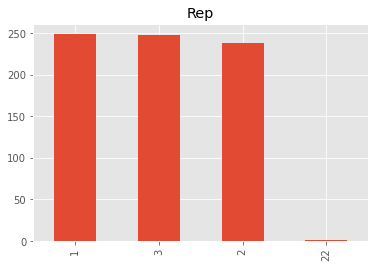

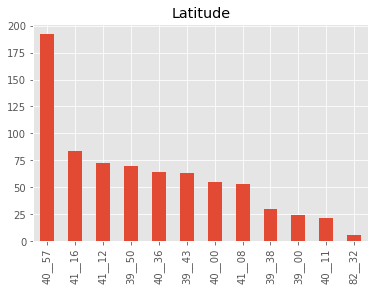

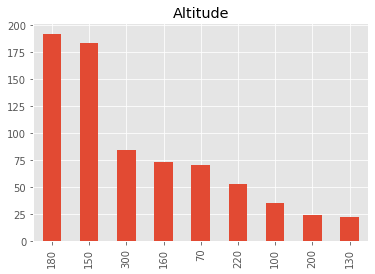

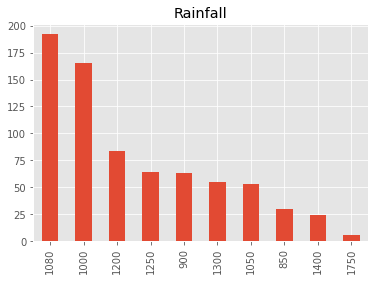

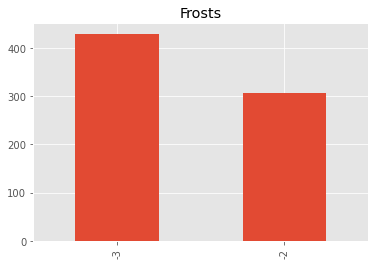

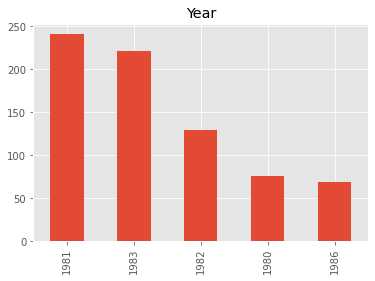

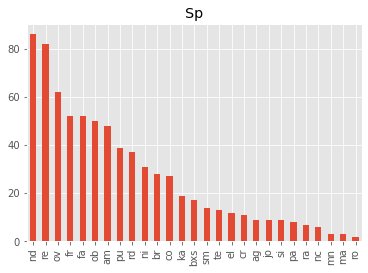

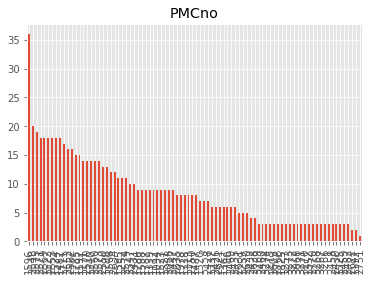

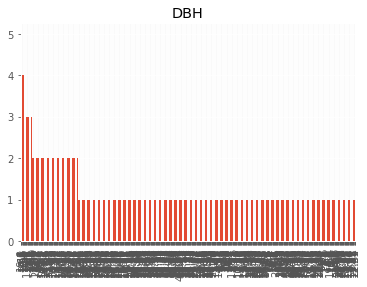

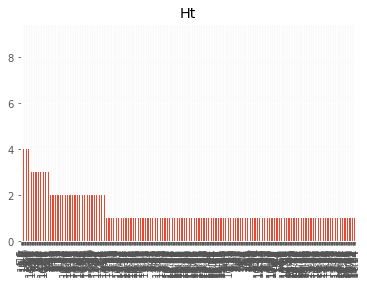

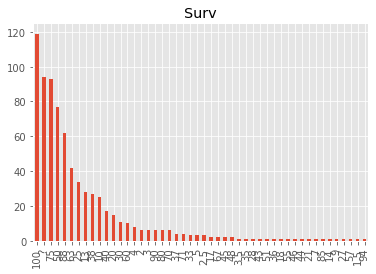

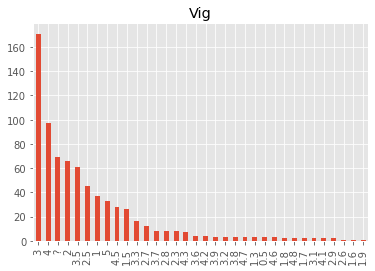

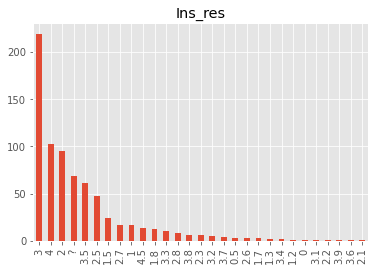

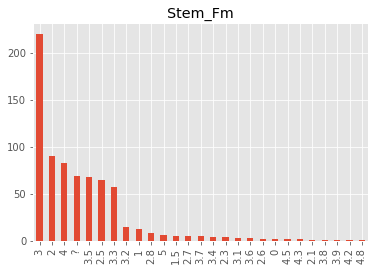

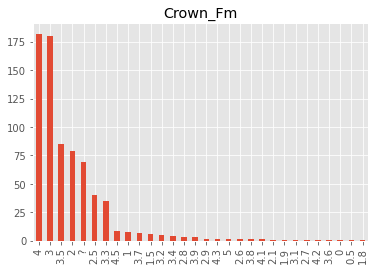

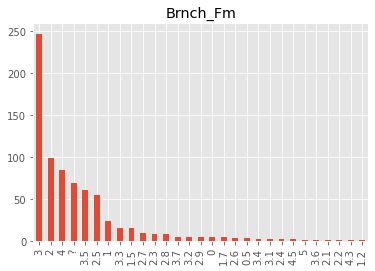

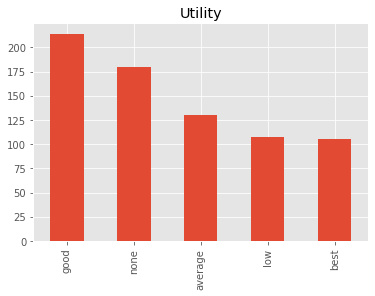

In [ ]:
for col in eucalyptus.columns:
    eucalyptus[col].value_counts().plot(kind="bar",title=col)
    plt.show()

In [ ]:
missing_by_id = (eucalyptus == "?").sum(axis=1)

missing_by_id[missing_by_id >= 6]

for i, v in missing_by_id.items():
  if v >= 6:
    eucalyptus = eucalyptus.drop(axis=0,index=i)

In [ ]:
le = LabelEncoder()
le.fit(eucalyptus["Latitude"])
list(le.classes_)
eucalyptus["Latitude"] = le.transform(eucalyptus["Latitude"])
le.fit(eucalyptus["Sp"])
list(le.classes_)
eucalyptus["Sp"] = le.transform(eucalyptus["Sp"])
le.fit(eucalyptus["Utility"])
list(le.classes_)
eucalyptus["Utility"] = le.transform(eucalyptus["Utility"])

In [ ]:
eucalyptus = eucalyptus.replace("?", -1)

eucalyptus = eucalyptus.astype({"Surv": int}, errors='ignore') 
eucalyptus = eucalyptus.astype({"Vig": float}, errors='ignore') 
#eucalyptus = eucalyptus.astype({"Brnch_Fm": float}, errors='ignore')
#eucalyptus = eucalyptus.astype({"Crown_Fm": float}, errors='ignore')
#eucalyptus = eucalyptus.astype({"Stem_Fm": float}, errors='ignore')
#eucalyptus = eucalyptus.astype({"Ins_res": float}, errors='ignore')
eucalyptus = eucalyptus.astype({"Surv": float}, errors='ignore')
eucalyptus = eucalyptus.astype({"Ht": float}, errors='ignore')
eucalyptus = eucalyptus.astype({"DBH": float}, errors='ignore')
eucalyptus = eucalyptus.astype({"PMCno": int}, errors='ignore')
eucalyptus.dtypes

Rep           int64
Latitude      int32
Altitude      int64
Rainfall      int64
Frosts        int64
Year          int64
Sp            int32
PMCno         int32
DBH         float64
Ht          float64
Surv        float64
Vig         float64
Ins_res      object
Stem_Fm      object
Crown_Fm     object
Brnch_Fm     object
Utility       int32
dtype: object

In [ ]:
X= eucalyptus.iloc[:,1:]
y=eucalyptus["Utility"]
X_train,y_train,X_test,y_test,X_holdout,y_holdout = split_data(X,y)

In [ ]:
y_train.value_counts()

2    160
0     98
4     83
3     80
1     79
Name: Utility, dtype: int64

In [ ]:
y_test.value_counts()

2    38
0    22
3    19
4    19
1    18
Name: Utility, dtype: int64

In [ ]:
y_holdout.value_counts()

2    16
0    10
4     9
3     8
1     8
Name: Utility, dtype: int64

### Decision Tree

In [ ]:
clf = DecisionTreeClassifier() 
clf=clf.fit(X_train,y_train) # train 
prediction = clf.predict(X_test) 

cv_holdout(clf,X_holdout,y_holdout)
eval_metrics(y_test,prediction, "multi")

Cross validated scores: [1.  1.  0.9 1.  1. ]
confusion matrix: [[22  0  0  0  0]
 [ 0 18  0  0  0]
 [ 0  0 38  0  0]
 [ 0  0  0 19  0]
 [ 0  0  0  0 19]]
accuracy: 1.0
precision: 1.0
recall: 1.0
F1: 1.0


[Text(125.55000000000001, 190.26, 'X[15] <= 0.5\ngini = 0.781\nsamples = 500\nvalue = [98, 79, 160, 80, 83]'),
 Text(83.7, 135.9, 'gini = 0.0\nsamples = 98\nvalue = [98, 0, 0, 0, 0]'),
 Text(167.4, 135.9, 'X[15] <= 2.5\ngini = 0.721\nsamples = 402\nvalue = [0, 79, 160, 80, 83]'),
 Text(83.7, 81.53999999999999, 'X[15] <= 1.5\ngini = 0.443\nsamples = 239\nvalue = [0, 79, 160, 0, 0]'),
 Text(41.85, 27.180000000000007, 'gini = 0.0\nsamples = 79\nvalue = [0, 79, 0, 0, 0]'),
 Text(125.55000000000001, 27.180000000000007, 'gini = 0.0\nsamples = 160\nvalue = [0, 0, 160, 0, 0]'),
 Text(251.10000000000002, 81.53999999999999, 'X[15] <= 3.5\ngini = 0.5\nsamples = 163\nvalue = [0, 0, 0, 80, 83]'),
 Text(209.25, 27.180000000000007, 'gini = 0.0\nsamples = 80\nvalue = [0, 0, 0, 80, 0]'),
 Text(292.95, 27.180000000000007, 'gini = 0.0\nsamples = 83\nvalue = [0, 0, 0, 0, 83]')]

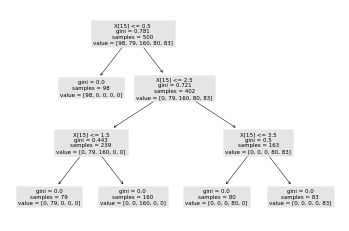

In [ ]:
plot_tree(clf)

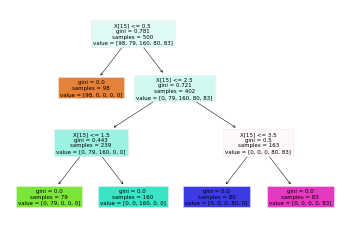

In [ ]:
plt.figure()
plot_tree(clf,filled=True)  
plt.savefig('tree.png',format='eps',bbox_inches = "tight")

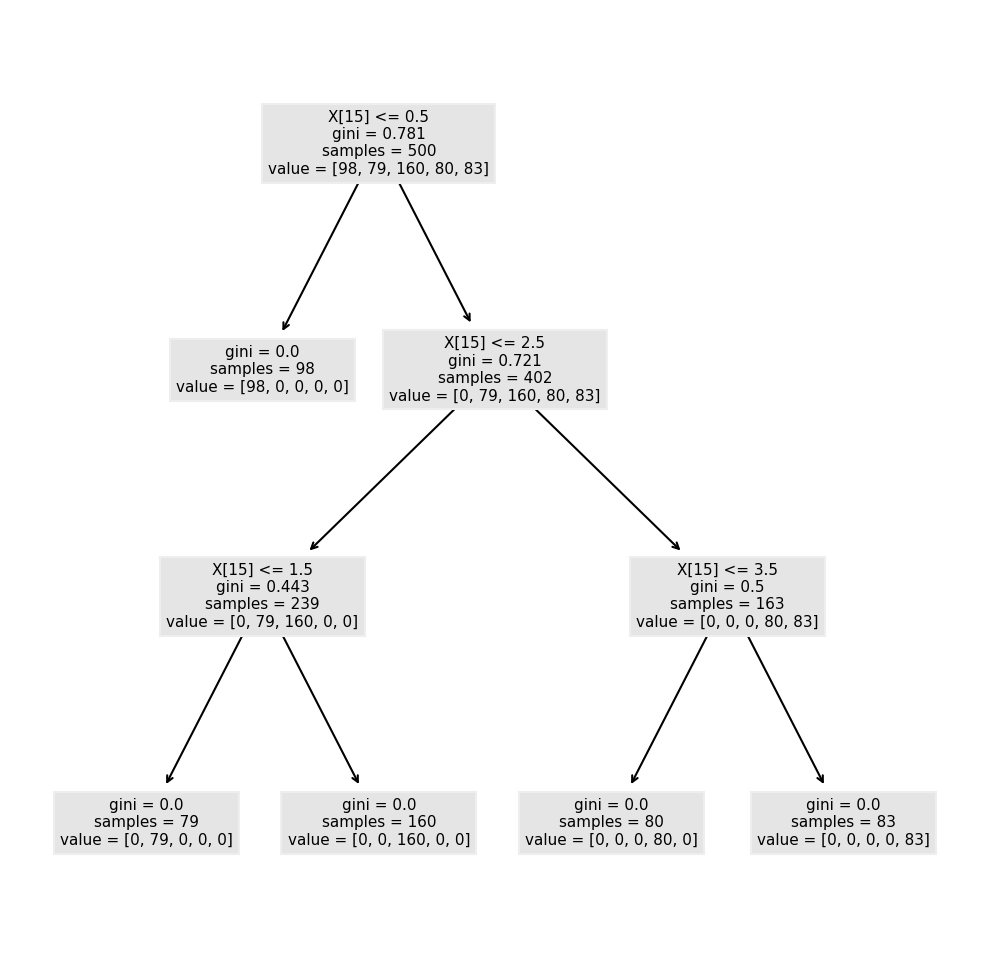

In [ ]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
plot_tree(clf)
fig.savefig('imagename.png')

### Random forest

In [ ]:
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train,y_train)
rf_prediction = clf.predict(X_test)

cv_holdout(clf,X_holdout,y_holdout)
eval_metrics(y_test,rf_prediction, "multi")

Cross validated scores: [1.  1.  0.8 0.7 0.8]
confusion matrix: [[22  0  0  0  0]
 [ 0 18  0  0  0]
 [ 0  0 38  0  0]
 [ 0  0  0 19  0]
 [ 0  0  0  0 19]]
accuracy: 1.0
precision: 1.0
recall: 1.0
F1: 1.0


### KNN

In [ ]:
# scale data

column_transformer = make_column_transformer(
    (StandardScaler(), [ 'Altitude', 'Rainfall', 'Frosts', 'Year',  'PMCno',
       'DBH', 'Ht', 'Surv', 'Vig', 'Ins_res', 'Stem_Fm', 'Crown_Fm','Brnch_Fm']),
    remainder='passthrough')

X_train_sc = column_transformer.fit_transform(X_train)
X_test_sc = column_transformer.fit_transform(X_test)
X_hold_sc = column_transformer.fit_transform(X_holdout)

In [ ]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_sc,y_train)
knn_prediction= knn.predict(X_test_sc) 

cv_holdout(knn,X_hold_sc,y_holdout)
eval_metrics(y_test,knn_prediction, "multi")

Cross validated scores: [0.36363636 0.4        0.2        0.4        0.4       ]
confusion matrix: [[18  0  4  0  0]
 [ 2  9  7  0  0]
 [ 3  7 28  0  0]
 [ 2  0  2  8  7]
 [ 0  0  1  8 10]]
accuracy: 0.6293103448275862
precision: 0.6074803921568628
recall: 0.6004784688995215
F1: 0.6016135248425611


In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_sc,y_train)
knn_prediction= knn.predict(X_test_sc) 

cv_holdout(knn,X_hold_sc,y_holdout)
eval_metrics(y_test,knn_prediction, "multi")

Cross validated scores: [0.27272727 0.4        0.5        0.3        0.4       ]
confusion matrix: [[18  1  3  0  0]
 [ 3 10  5  0  0]
 [ 3  6 29  0  0]
 [ 0  0  3 12  4]
 [ 0  0  1  8 10]]
accuracy: 0.6810344827586207
precision: 0.6719676163148187
recall: 0.6589580010632641
F1: 0.6619319407431681


In [ ]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train_sc,y_train)
knn_prediction= knn.predict(X_test_sc) 

cv_holdout(knn,X_hold_sc,y_holdout)
eval_metrics(y_test,knn_prediction, "multi")

Cross validated scores: [0.45454545 0.3        0.5        0.4        0.4       ]
confusion matrix: [[16  3  3  0  0]
 [ 1  8  9  0  0]
 [ 2  3 32  1  0]
 [ 1  0  5 11  2]
 [ 0  0  4  8  7]]
accuracy: 0.6379310344827587
precision: 0.660595986822402
recall: 0.5922381711855396
F1: 0.6058608058608058
